In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
## Global output settings

plt.rcParams['figure.dpi'] = 300  # Change to your desired DPI
sns.set(context="paper", font_scale=1.2)
sns.set_style("white")

In [3]:
school_year='24-25'

## Clean student behavior data

In [4]:
# Import behavior data from dashboard
behavior_df=pd.read_excel('Resources/student_incidents_022725.xlsx')
behavior_df

C:\Users\mcyang\AppData\Local\miniconda3\envs\dev\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Student,District287 Id,Reported Race,Grade,Referrals,CIs,RPs,Location,Program,Earliest,Latest
0,"Howe, Mason Steven",3665809.0,White,06,145.0,58.0,58.0,NEC,302N,2024-09-03,2025-02-26
1,"Longsdorf, Robert Colt Jr",3664183.0,Black or African American,07,55.0,26.0,26.0,NEC,302N,2024-09-10,2025-02-26
2,"McCarty, Andre' Jeremy",124709.0,Black or African American,08,56.0,26.0,26.0,NEC,303N,2024-09-04,2025-02-26
3,"Kamara, Lonceny Mariam",3665814.0,Black or African American,02,28.0,22.0,22.0,NEC,303N,2024-10-01,2025-02-11
4,"Hatchett, Xzavier Deanthony",3666728.0,Black or African American,06,44.0,19.0,19.0,NEC,302N,2024-09-06,2025-02-26
...,...,...,...,...,...,...,...,...,...,...,...
556,"Yuquilima, Devin Leanardo",3645145.0,Hispanic,12,1.0,NaN,NaN,SEC,0622,2024-09-23,2024-09-23
557,"Yusuf, Salmaan Mohamed",3665097.0,Black or African American,04,6.0,NaN,NaN,SEC,303S,2025-01-28,2025-02-04
558,Total,NaN,NaN,NaN,5428.0,891.0,837.0,NaN,NaN,2024-06-17,2025-12-19
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [5]:
# Drop unncessary rows
behavior_df=behavior_df.drop(index=[558,559,560]).reset_index(drop=True)
behavior_df

,Student,District287 Id,Reported Race,Grade,Referrals,CIs,RPs,Location,Program,Earliest,Latest
0,"Howe, Mason Steven",3665809.0,White,06,145.0,58.0,58.0,NEC,302N,2024-09-03,2025-02-26
1,"Longsdorf, Robert Colt Jr",3664183.0,Black or African American,07,55.0,26.0,26.0,NEC,302N,2024-09-10,2025-02-26
2,"McCarty, Andre' Jeremy",124709.0,Black or African American,08,56.0,26.0,26.0,NEC,303N,2024-09-04,2025-02-26
3,"Kamara, Lonceny Mariam",3665814.0,Black or African American,02,28.0,22.0,22.0,NEC,303N,2024-10-01,2025-02-11
4,"Hatchett, Xzavier Deanthony",3666728.0,Black or African American,06,44.0,19.0,19.0,NEC,302N,2024-09-06,2025-02-26
...,...,...,...,...,...,...,...,...,...,...,...
553,"Yazdanpanah, Cyra Hannah",74038.0,White,12,1.0,NaN,NaN,ABEC,303A,2024-09-11,2024-11-13
554,"Young, Mark David",3677588.0,White,09,2.0,NaN,NaN,WEC,302W,2025-02-11,2025-02-25
555,"Yupa Gomez, Justin Ismael",3642220.0,Hispanic,09,4.0,NaN,NaN,SEC,302S,2025-02-04,2025-02-24
556,"Yuquilima, Devin Leanardo",3645145.0,Hispanic,12,1.0,NaN,NaN,SEC,0622,2024-09-23,2024-09-23


In [6]:
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student         558 non-null    object        
 1   District287 Id  558 non-null    float64       
 2   Reported Race   558 non-null    object        
 3   Grade           558 non-null    object        
 4   Referrals       539 non-null    float64       
 5   CIs             209 non-null    float64       
 6   RPs             186 non-null    float64       
 7   Location        558 non-null    object        
 8   Program         558 non-null    object        
 9   Earliest        558 non-null    datetime64[ns]
 10  Latest          558 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 48.1+ KB


In [7]:
# Get program counts by location
behavior_df.groupby('Location')['Program'].value_counts()

Location  Program
ABEC      302A       29
          303A       20
          303AT      17
          302AT      15
          409A        2
C&T       0527        1
CTC       0801       40
          0032        7
          301CT       6
NEC       302N       94
          303N       55
          0772       10
          409N        2
SEC       302S       70
          0622       45
          303S       43
          303ST      20
          409S        7
WEC       302W       22
          0800       21
          303W       18
          302WT       5
          303WT       5
          0810        2
          406W        2
Name: count, dtype: int64

In [8]:
# Classify by school
nec=['302N', '303N']
neca=['0772']
sec=['302S', '303S', '303ST']
seca=['0622']
wec=['302W', '303W', '303WT', '302WT']
walt=['0800']
ctc=['0032', '301CT']

behavior_df.loc[behavior_df['Program'].isin(nec), 'School']='NEC SPED'
behavior_df.loc[behavior_df['Program'].isin(neca), 'School']='NECA'
behavior_df.loc[behavior_df['Program'].isin(sec), 'School']='SEC SPED'
behavior_df.loc[behavior_df['Program'].isin(seca), 'School']='SECA'
behavior_df.loc[behavior_df['Program'].isin(wec), 'School']='WEC SPED'
behavior_df.loc[behavior_df['Program'].isin(walt), 'School']='W-ALT'
behavior_df.loc[behavior_df['Program'].isin(ctc), 'School']='CTC SPED'
behavior_df.loc[behavior_df['Program']=='0801', 'School']='Gateway'
behavior_df.loc[behavior_df['Location']=='ABEC', 'School']='ABEC'
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student         558 non-null    object        
 1   District287 Id  558 non-null    float64       
 2   Reported Race   558 non-null    object        
 3   Grade           558 non-null    object        
 4   Referrals       539 non-null    float64       
 5   CIs             209 non-null    float64       
 6   RPs             186 non-null    float64       
 7   Location        558 non-null    object        
 8   Program         558 non-null    object        
 9   Earliest        558 non-null    datetime64[ns]
 10  Latest          558 non-null    datetime64[ns]
 11  School          544 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 52.4+ KB


In [9]:
# Drop students that are not in the schools defined above
behavior_df=behavior_df.dropna(subset=['School'])
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544 entries, 0 to 557
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student         544 non-null    object        
 1   District287 Id  544 non-null    float64       
 2   Reported Race   544 non-null    object        
 3   Grade           544 non-null    object        
 4   Referrals       526 non-null    float64       
 5   CIs             206 non-null    float64       
 6   RPs             184 non-null    float64       
 7   Location        544 non-null    object        
 8   Program         544 non-null    object        
 9   Earliest        544 non-null    datetime64[ns]
 10  Latest          544 non-null    datetime64[ns]
 11  School          544 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 55.2+ KB


In [10]:
# Get school counts
behavior_df['School'].value_counts()

School
NEC SPED    149
SEC SPED    133
ABEC         83
WEC SPED     50
SECA         45
Gateway      40
W-ALT        21
CTC SPED     13
NECA         10
Name: count, dtype: int64

In [11]:
# For students who transferred schools, keep data for each school.
# Check for students who transferred programs within a school. Only keep data for most recent program within a school.
behavior_df[behavior_df.duplicated(subset=['School', 'District287 Id'], keep=False)].sort_values('District287 Id').head()

,Student,District287 Id,Reported Race,Grade,Referrals,CIs,RPs,Location,Program,Earliest,Latest,School
50,"Benford, Tae Travon",118896.0,Black or African American,11,42.0,5.0,5.0,WEC,302W,2024-10-10,2025-02-14,WEC SPED
229,"Benford, Tae Travon",118896.0,Black or African American,11,1.0,NaN,NaN,WEC,303W,2025-02-25,2025-02-25,WEC SPED
54,"Blacker, Mathew David",123240.0,White,10,5.0,4.0,4.0,WEC,302W,2024-09-16,2024-11-12,WEC SPED
132,"Blacker, Mathew David",123240.0,White,10,5.0,1.0,1.0,WEC,303W,2024-12-05,2025-02-20,WEC SPED
429,"Montes De Oca, William E",130758.0,Hispanic,12,1.0,NaN,NaN,ABEC,409A,2024-07-12,2024-07-12,ABEC


In [12]:
# Skip if no transfer students found in previous step

# Sort each school by student and "Earliest" column, the earliest date that the student has behavior data for each program
behavior_df=behavior_df.sort_values(['School', 'District287 Id', 'Earliest'], ascending=False)

# Drop duplicate students at each school and only keep first entry (most recent program that student has behavior data for)
behavior_df=behavior_df.drop_duplicates(subset=['School', 'District287 Id'], keep='first')
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 145 to 231
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student         532 non-null    object        
 1   District287 Id  532 non-null    float64       
 2   Reported Race   532 non-null    object        
 3   Grade           532 non-null    object        
 4   Referrals       514 non-null    float64       
 5   CIs             201 non-null    float64       
 6   RPs             179 non-null    float64       
 7   Location        532 non-null    object        
 8   Program         532 non-null    object        
 9   Earliest        532 non-null    datetime64[ns]
 10  Latest          532 non-null    datetime64[ns]
 11  School          532 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 54.0+ KB


In [13]:
# Fill in na values with 0
behavior_df[['Referrals', 'CIs', 'RPs']]=behavior_df[['Referrals', 'CIs', 'RPs']].fillna(0)
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 145 to 231
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student         532 non-null    object        
 1   District287 Id  532 non-null    float64       
 2   Reported Race   532 non-null    object        
 3   Grade           532 non-null    object        
 4   Referrals       532 non-null    float64       
 5   CIs             532 non-null    float64       
 6   RPs             532 non-null    float64       
 7   Location        532 non-null    object        
 8   Program         532 non-null    object        
 9   Earliest        532 non-null    datetime64[ns]
 10  Latest          532 non-null    datetime64[ns]
 11  School          532 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 54.0+ KB


In [14]:
# Change columns to integer dtypes
behavior_df[['District287 Id', 'Referrals', 'CIs', 'RPs']]=behavior_df[['District287 Id', 'Referrals', 'CIs', 'RPs']].astype('int')
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 145 to 231
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student         532 non-null    object        
 1   District287 Id  532 non-null    int32         
 2   Reported Race   532 non-null    object        
 3   Grade           532 non-null    object        
 4   Referrals       532 non-null    int32         
 5   CIs             532 non-null    int32         
 6   RPs             532 non-null    int32         
 7   Location        532 non-null    object        
 8   Program         532 non-null    object        
 9   Earliest        532 non-null    datetime64[ns]
 10  Latest          532 non-null    datetime64[ns]
 11  School          532 non-null    object        
dtypes: datetime64[ns](2), int32(4), object(6)
memory usage: 45.7+ KB


In [15]:
# Export cleaned data
behavior_df.to_csv('Outputs/student_incidents_cleaned_022725.csv', index=False)

In [16]:
behavior_df=behavior_df[['District287 Id', 'Referrals', 'CIs', 'RPs', 'Program']]
behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 145 to 231
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District287 Id  532 non-null    int32 
 1   Referrals       532 non-null    int32 
 2   CIs             532 non-null    int32 
 3   RPs             532 non-null    int32 
 4   Program         532 non-null    object
dtypes: int32(4), object(1)
memory usage: 16.6+ KB


## Import student body data

In [17]:
# Import merged student body table with current homeroom teacher and current school
student_df=pd.read_csv('Resources/student_data_cleaned_120424.csv')
student_df.head()

,Site/Program,Student Name,District287 Id,Grade,Student Race,Student Gender,Student Age,Language Spoken In the Home,Original Enter Date,District Of Residence,Staff Name,Classroom Enter Date,Classroom Leave Date,Employee Number,Years Enrolled,Student Age_Years,School
0,302AT ABEC Tier 2 Tr,"Miller, Rudy O. (He/Him)",36286,15,White,Male,21 yrs 1 mths,English (011),2022-01-19,0286 Brooklyn Center,"Ressen, Teresa M.",2024-11-11,NaN,20392.0,2.88,21,ABEC
1,303ST SEC Tier 3 Trn,"Gorski, Kiley R.",37528,15,White,Female,21 yrs 0 mths,English (011),2018-09-07,0273 Edina,"Lindner, Maren",2024-11-11,NaN,20064.0,6.25,21,SEC SPED
2,301CT CTC Tier 1 Trn,"Sanchez, Citlalli S.",40299,15,Hispanic,Female,20 yrs 6 mths,Spanish (045),2018-09-04,0280 Richfield,"Rask, Kendra M.",2024-11-11,NaN,17004.0,6.25,20,CTC
3,303ST SEC Tier 3 Trn,"(Harris, Nicklaus W.)",40399,15,White,Male,22 yrs 0 mths,English (011),2017-09-05,0273 Edina,"Tutor, Catherine",2024-11-11,11/21/2024,22602.0,7.25,22,SEC SPED
4,303AT ABEC Tier 3 Tr,"Benson, Matthew J.",42767,15,Black or African American,Male,20 yrs 9 mths,English (011),2020-01-06,0279 Osseo,"Indgjer, Madonna H.",2024-11-11,NaN,20842.0,4.92,20,ABEC


In [18]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 962 non-null    object 
 1   Student Name                 962 non-null    object 
 2   District287 Id               962 non-null    int64  
 3   Grade                        962 non-null    object 
 4   Student Race                 962 non-null    object 
 5   Student Gender               962 non-null    object 
 6   Student Age                  962 non-null    object 
 7   Language Spoken In the Home  962 non-null    object 
 8   Original Enter Date          962 non-null    object 
 9   District Of Residence        962 non-null    object 
 10  Staff Name                   962 non-null    object 
 11  Classroom Enter Date         962 non-null    object 
 12  Classroom Leave Date         119 non-null    object 
 13  Employee Number     

In [19]:
# Get school counts
student_df['School'].value_counts()

School
NEC SPED    192
SEC SPED    154
ABEC        124
CTC         120
W-ALT       114
SECA         63
WEC SPED     57
NECA         48
Name: count, dtype: int64

In [20]:
# Drop students who are not at one of the school sites (ABEC, NEC, SEC, WEC, CTC)
student_df=student_df.dropna(subset=['School'])
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 960
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 872 non-null    object 
 1   Student Name                 872 non-null    object 
 2   District287 Id               872 non-null    int64  
 3   Grade                        872 non-null    object 
 4   Student Race                 872 non-null    object 
 5   Student Gender               872 non-null    object 
 6   Student Age                  872 non-null    object 
 7   Language Spoken In the Home  872 non-null    object 
 8   Original Enter Date          872 non-null    object 
 9   District Of Residence        872 non-null    object 
 10  Staff Name                   872 non-null    object 
 11  Classroom Enter Date         872 non-null    object 
 12  Classroom Leave Date         91 non-null     object 
 13  Employee Number          

In [21]:
# Check if any duplicated students
student_df[student_df.duplicated(subset='District287 Id', keep=False)]

,Site/Program,Student Name,District287 Id,Grade,Student Race,Student Gender,Student Age,Language Spoken In the Home,Original Enter Date,District Of Residence,Staff Name,Classroom Enter Date,Classroom Leave Date,Employee Number,Years Enrolled,Student Age_Years,School


## Merge Tables

In [22]:
combined_df=pd.merge(student_df, behavior_df, how='left', on='District287 Id')
combined_df.head()

,Site/Program,Student Name,District287 Id,Grade,Student Race,Student Gender,Student Age,Language Spoken In the Home,Original Enter Date,District Of Residence,Staff Name,Classroom Enter Date,Classroom Leave Date,Employee Number,Years Enrolled,Student Age_Years,School,Referrals,CIs,RPs,Program
0,302AT ABEC Tier 2 Tr,"Miller, Rudy O. (He/Him)",36286,15,White,Male,21 yrs 1 mths,English (011),2022-01-19,0286 Brooklyn Center,"Ressen, Teresa M.",2024-11-11,NaN,20392.0,2.88,21,ABEC,NaN,NaN,NaN,NaN
1,303ST SEC Tier 3 Trn,"Gorski, Kiley R.",37528,15,White,Female,21 yrs 0 mths,English (011),2018-09-07,0273 Edina,"Lindner, Maren",2024-11-11,NaN,20064.0,6.25,21,SEC SPED,NaN,NaN,NaN,NaN
2,301CT CTC Tier 1 Trn,"Sanchez, Citlalli S.",40299,15,Hispanic,Female,20 yrs 6 mths,Spanish (045),2018-09-04,0280 Richfield,"Rask, Kendra M.",2024-11-11,NaN,17004.0,6.25,20,CTC,NaN,NaN,NaN,NaN
3,303ST SEC Tier 3 Trn,"(Harris, Nicklaus W.)",40399,15,White,Male,22 yrs 0 mths,English (011),2017-09-05,0273 Edina,"Tutor, Catherine",2024-11-11,11/21/2024,22602.0,7.25,22,SEC SPED,NaN,NaN,NaN,NaN
4,303AT ABEC Tier 3 Tr,"Benson, Matthew J.",42767,15,Black or African American,Male,20 yrs 9 mths,English (011),2020-01-06,0279 Osseo,"Indgjer, Madonna H.",2024-11-11,NaN,20842.0,4.92,20,ABEC,33.0,1.0,0.0,303AT


In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 876 non-null    object 
 1   Student Name                 876 non-null    object 
 2   District287 Id               876 non-null    int64  
 3   Grade                        876 non-null    object 
 4   Student Race                 876 non-null    object 
 5   Student Gender               876 non-null    object 
 6   Student Age                  876 non-null    object 
 7   Language Spoken In the Home  876 non-null    object 
 8   Original Enter Date          876 non-null    object 
 9   District Of Residence        876 non-null    object 
 10  Staff Name                   876 non-null    object 
 11  Classroom Enter Date         876 non-null    object 
 12  Classroom Leave Date         91 non-null     object 
 13  Employee Number     

In [24]:
# Make sure there are no duplicate students
combined_df[combined_df['District287 Id'].duplicated(keep=False)]

,Site/Program,Student Name,District287 Id,Grade,Student Race,Student Gender,Student Age,Language Spoken In the Home,Original Enter Date,District Of Residence,Staff Name,Classroom Enter Date,Classroom Leave Date,Employee Number,Years Enrolled,Student Age_Years,School,Referrals,CIs,RPs,Program
251,302S SEC Tier 2,"Williams, Aleaha R.",3646395,10,Black or African American,Female,16 yrs 3 mths,English (011),2018-07-10,0277 Westonka,"Lampert, Iric E.",2024-11-20,NaN,17444.0,6.41,16,SEC SPED,5.0,0.0,0.0,302W
252,302S SEC Tier 2,"Williams, Aleaha R.",3646395,10,Black or African American,Female,16 yrs 3 mths,English (011),2018-07-10,0277 Westonka,"Lampert, Iric E.",2024-11-20,NaN,17444.0,6.41,16,SEC SPED,18.0,0.0,0.0,302S
328,302S SEC Tier 2,"Tombers, Connor J.",3658009,09,Two or More,Male,14 yrs 3 mths,English (011),2022-06-20,0270 Hopkins,"Mueller, John F.",2024-11-11,NaN,21809.0,2.46,14,SEC SPED,67.0,0.0,0.0,302S
329,302S SEC Tier 2,"Tombers, Connor J.",3658009,09,Two or More,Male,14 yrs 3 mths,English (011),2022-06-20,0270 Hopkins,"Mueller, John F.",2024-11-11,NaN,21809.0,2.46,14,SEC SPED,1.0,0.0,0.0,303N
487,W-Alt 800,"Marszalek, Isaiah T.",3665587,14,Two or More,Male,18 yrs 9 mths,English (011),2022-06-13,0001 Minneapolis,"Pavlak, Amanda",2024-11-11,NaN,22650.0,2.48,18,W-ALT,2.0,0.0,0.0,0800
488,W-Alt 800,"Marszalek, Isaiah T.",3665587,14,Two or More,Male,18 yrs 9 mths,English (011),2022-06-13,0001 Minneapolis,"Pavlak, Amanda",2024-11-11,NaN,22650.0,2.48,18,W-ALT,1.0,0.0,0.0,0032
816,302S SEC Tier 2,"James, Arkell D.",3680161,10,Two or More,Male,15 yrs 10 mths,English (011),2024-09-11,0284 Wayzata,"Lampert, Iric E.",2024-11-11,NaN,17444.0,0.23,15,SEC SPED,1.0,0.0,0.0,302W
817,302S SEC Tier 2,"James, Arkell D.",3680161,10,Two or More,Male,15 yrs 10 mths,English (011),2024-09-11,0284 Wayzata,"Lampert, Iric E.",2024-11-11,NaN,17444.0,0.23,15,SEC SPED,39.0,0.0,0.0,302S


In [25]:
# Fill in instances of NA with 0 in behavior columns
combined_df[['Referrals', 'CIs', 'RPs']]=combined_df[['Referrals', 'CIs', 'RPs']].fillna(0).astype('int')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 876 non-null    object 
 1   Student Name                 876 non-null    object 
 2   District287 Id               876 non-null    int64  
 3   Grade                        876 non-null    object 
 4   Student Race                 876 non-null    object 
 5   Student Gender               876 non-null    object 
 6   Student Age                  876 non-null    object 
 7   Language Spoken In the Home  876 non-null    object 
 8   Original Enter Date          876 non-null    object 
 9   District Of Residence        876 non-null    object 
 10  Staff Name                   876 non-null    object 
 11  Classroom Enter Date         876 non-null    object 
 12  Classroom Leave Date         91 non-null     object 
 13  Employee Number     

## RPs Analysis

In [26]:
# Create columns indicating if students had at least one RP and whether they had a "high" number of RPs
combined_df.loc[combined_df['RPs']>=1, 'RP']='Yes'
combined_df.loc[combined_df['RPs']==0, 'RP']='No'
combined_df.loc[combined_df['RPs']>=4, 'High RPs']='Yes'
combined_df.loc[combined_df['RPs']<4, 'High RPs']='No'

In [27]:
# Create column indicating if students had at least one referral
combined_df.loc[combined_df['Referrals']>=1, 'Referral']='Yes'
combined_df.loc[combined_df['Referrals']==0, 'Referral']='No'

In [28]:
# Count of students with RPs by school
rp_rate_by_school=combined_df.groupby('School')['RP'].value_counts(normalize=True).to_frame().reset_index()
rp_rate_by_school=rp_rate_by_school[rp_rate_by_school['RP']=='Yes'].rename(columns={'proportion':'Proportion'}).sort_values('Proportion')
rp_rate_by_school

,School,RP,Proportion
1,ABEC,Yes,0.096774
11,WEC SPED,Yes,0.245614
7,SEC SPED,Yes,0.369427
4,NEC SPED,Yes,0.406250


C:\Users\mcyang\AppData\Local\Temp\ipykernel_19300\898284106.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


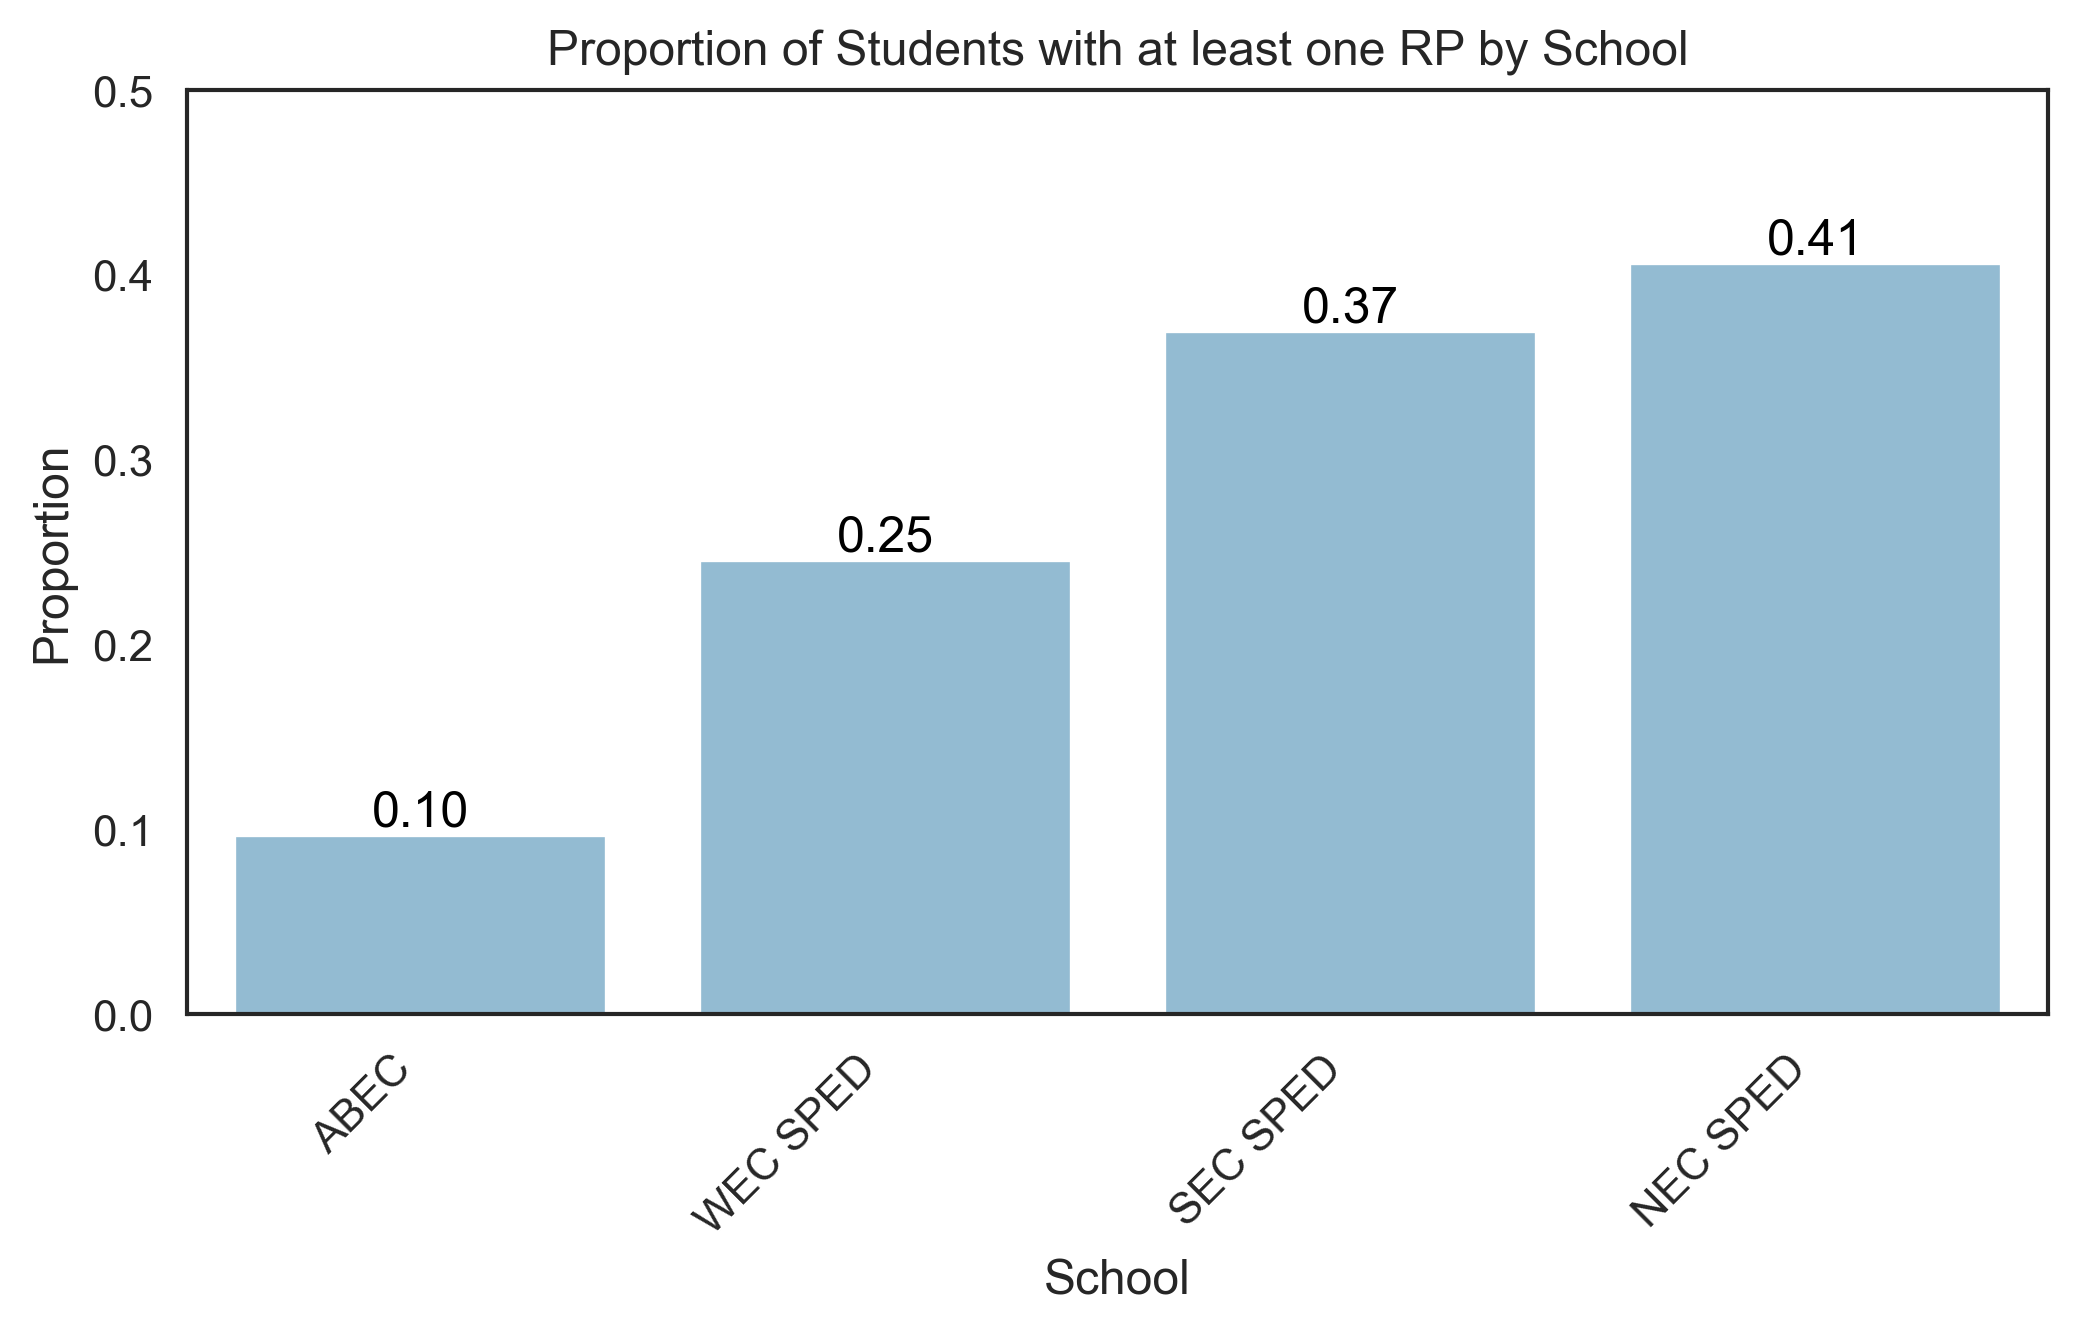

In [29]:
fig = plt.figure(figsize=(8,4))

ax = sns.barplot(x='School', 
            y='Proportion',  
            data=rp_rate_by_school, 
            color='#89bedc', 
            errorbar=None
            )

# Display proportion on top of bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0,.5)

# Title of chart and file name
plt.title(f'Proportion of Students with at least one RP by School')
plt.savefig('Outputs/rp_by_school', bbox_inches='tight')

plt.show()

## NEC

In [30]:
nec_df=combined_df[combined_df['School']=='NEC SPED']

In [31]:
nec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 42 to 866
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 192 non-null    object 
 1   Student Name                 192 non-null    object 
 2   District287 Id               192 non-null    int64  
 3   Grade                        192 non-null    object 
 4   Student Race                 192 non-null    object 
 5   Student Gender               192 non-null    object 
 6   Student Age                  192 non-null    object 
 7   Language Spoken In the Home  192 non-null    object 
 8   Original Enter Date          192 non-null    object 
 9   District Of Residence        192 non-null    object 
 10  Staff Name                   192 non-null    object 
 11  Classroom Enter Date         192 non-null    object 
 12  Classroom Leave Date         12 non-null     object 
 13  Employee Number         

In [32]:
# Count of students with RPs by grade
nec_rp_by_grade=nec_df.groupby('Grade')['RP'].value_counts(normalize=True).to_frame().reset_index()
nec_rp_by_grade=nec_rp_by_grade[nec_rp_by_grade['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
nec_rp_by_grade

,Grade,RP,Proportion
0,01,Yes,0.533333
2,02,Yes,0.545455
4,03,Yes,0.583333
6,04,Yes,0.722222
9,05,Yes,0.444444
11,06,Yes,0.480000
13,07,Yes,0.466667
15,08,Yes,0.285714
17,09,Yes,0.454545
20,11,Yes,0.071429


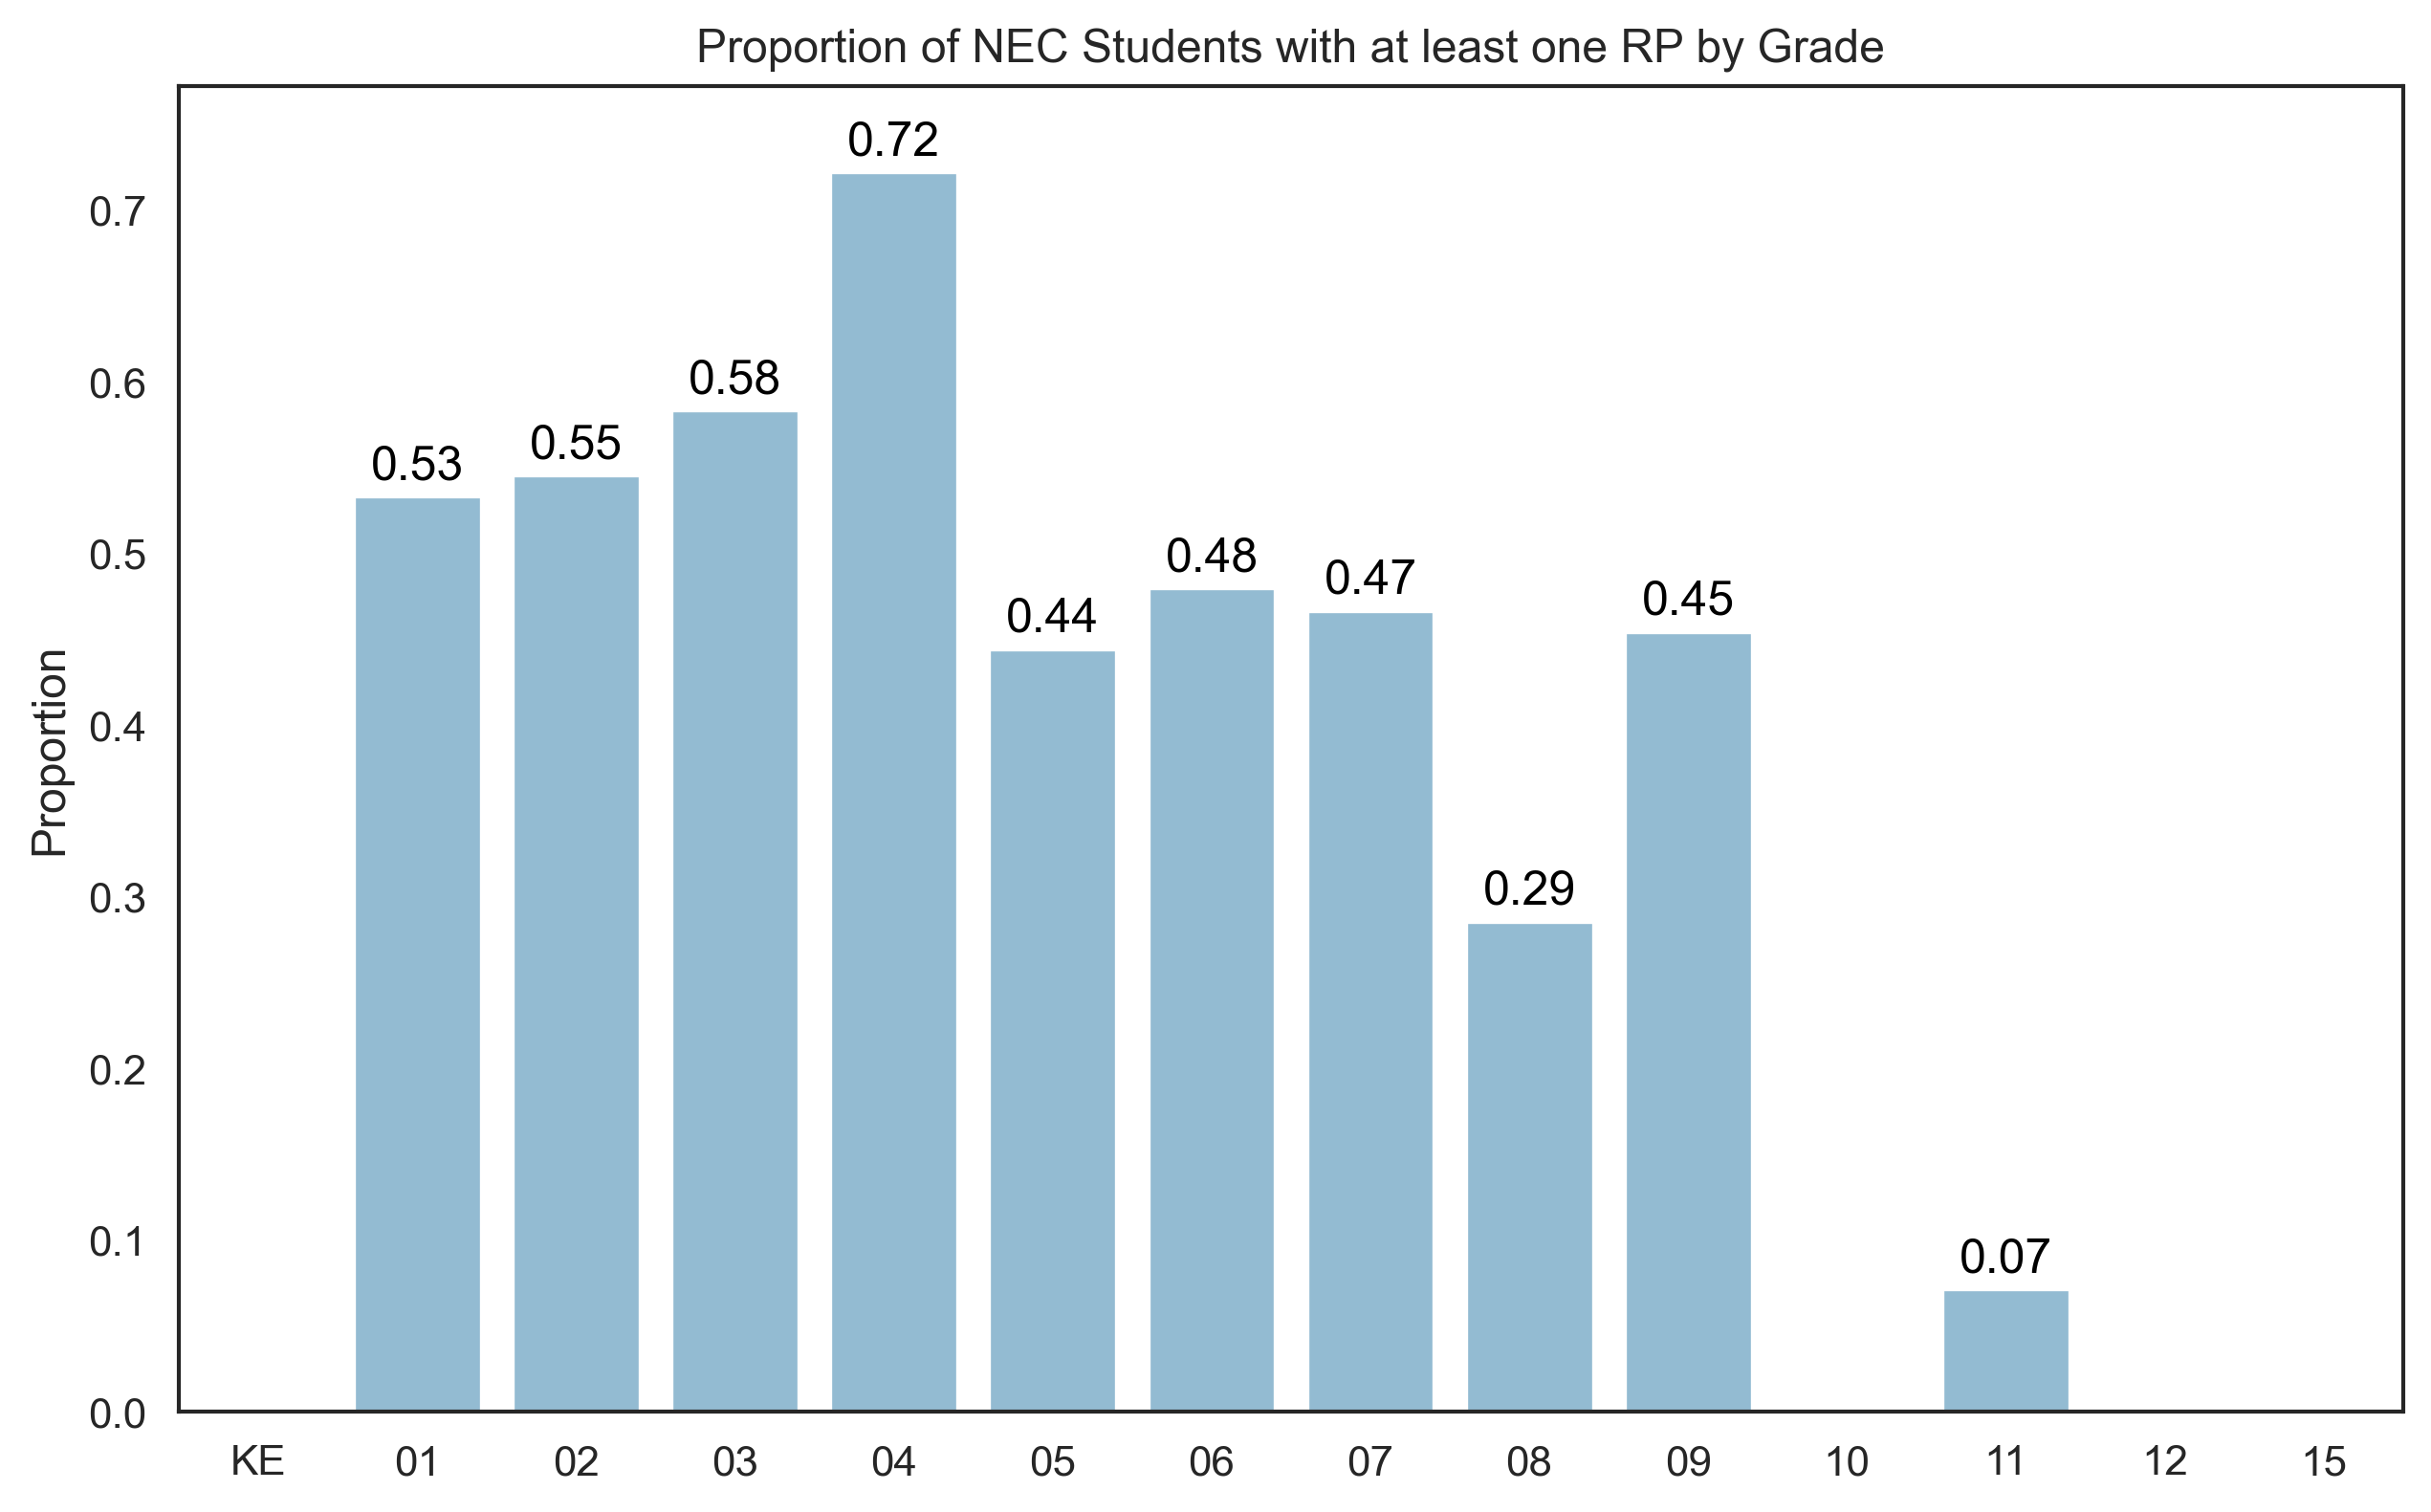

In [33]:
fig = plt.figure(figsize=(10,6))

df_to_plot=nec_rp_by_grade
order=['KE', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '15']

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
                 order=order
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NEC Students with at least one RP by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/nec_rp_by_grade', bbox_inches='tight')
plt.show()

In [34]:
nec_grade=nec_df['Grade'].value_counts().sort_index().to_frame()
nec_grade

,count
Grade,
01,15
02,11
03,12
04,18
05,18
06,25
07,30
08,14
09,11


In [35]:
# Count of students with RPs by program
nec_rp_by_program=nec_df.groupby('Site/Program')['RP'].value_counts(normalize=True).to_frame().reset_index()
nec_rp_by_program=nec_rp_by_program[nec_rp_by_program['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
nec_rp_by_program

,Site/Program,RP,Proportion
1,302N NEC Tier 2,Yes,0.423423
3,303N NEC Tier 3,Yes,0.382716


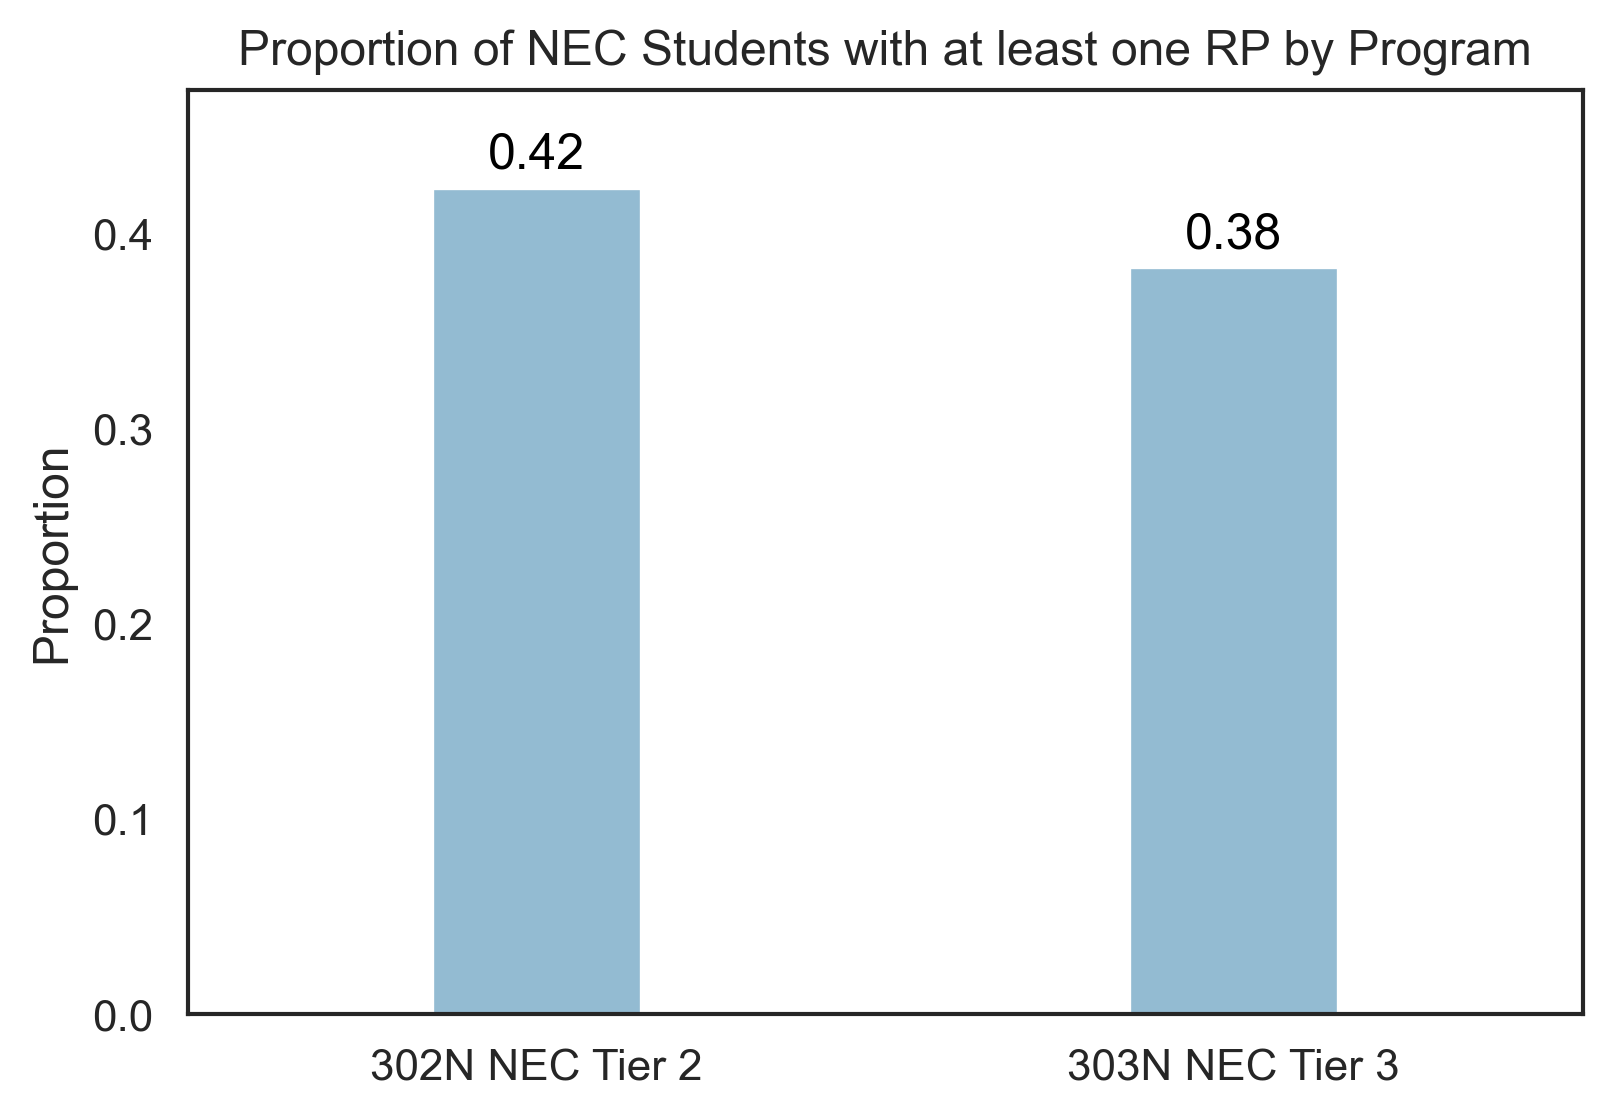

In [36]:
fig = plt.figure(figsize=(6,4))

df_to_plot=nec_rp_by_program

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
                 width=.3
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NEC Students with at least one RP by Program")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/nec_rp_by_program', bbox_inches='tight')
plt.show()

In [37]:
nec_program=nec_df['Site/Program'].value_counts().sort_index().to_frame()
nec_program

,count
Site/Program,
302N NEC Tier 2,111
303N NEC Tier 3,81


In [38]:
nec_program.to_clipboard()

In [39]:
# Count of students with RPs by race
nec_rp_by_race=nec_df.groupby('Student Race')['RP'].value_counts(normalize=True).to_frame().reset_index()
nec_rp_by_race=nec_rp_by_race[nec_rp_by_race['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
nec_rp_by_race

,Student Race,RP,Proportion
1,American Indian or Alaska Native,Yes,0.400000
4,Black or African American,Yes,0.411765
5,Hispanic,Yes,0.600000
8,Two or More,Yes,0.250000
10,White,Yes,0.446809


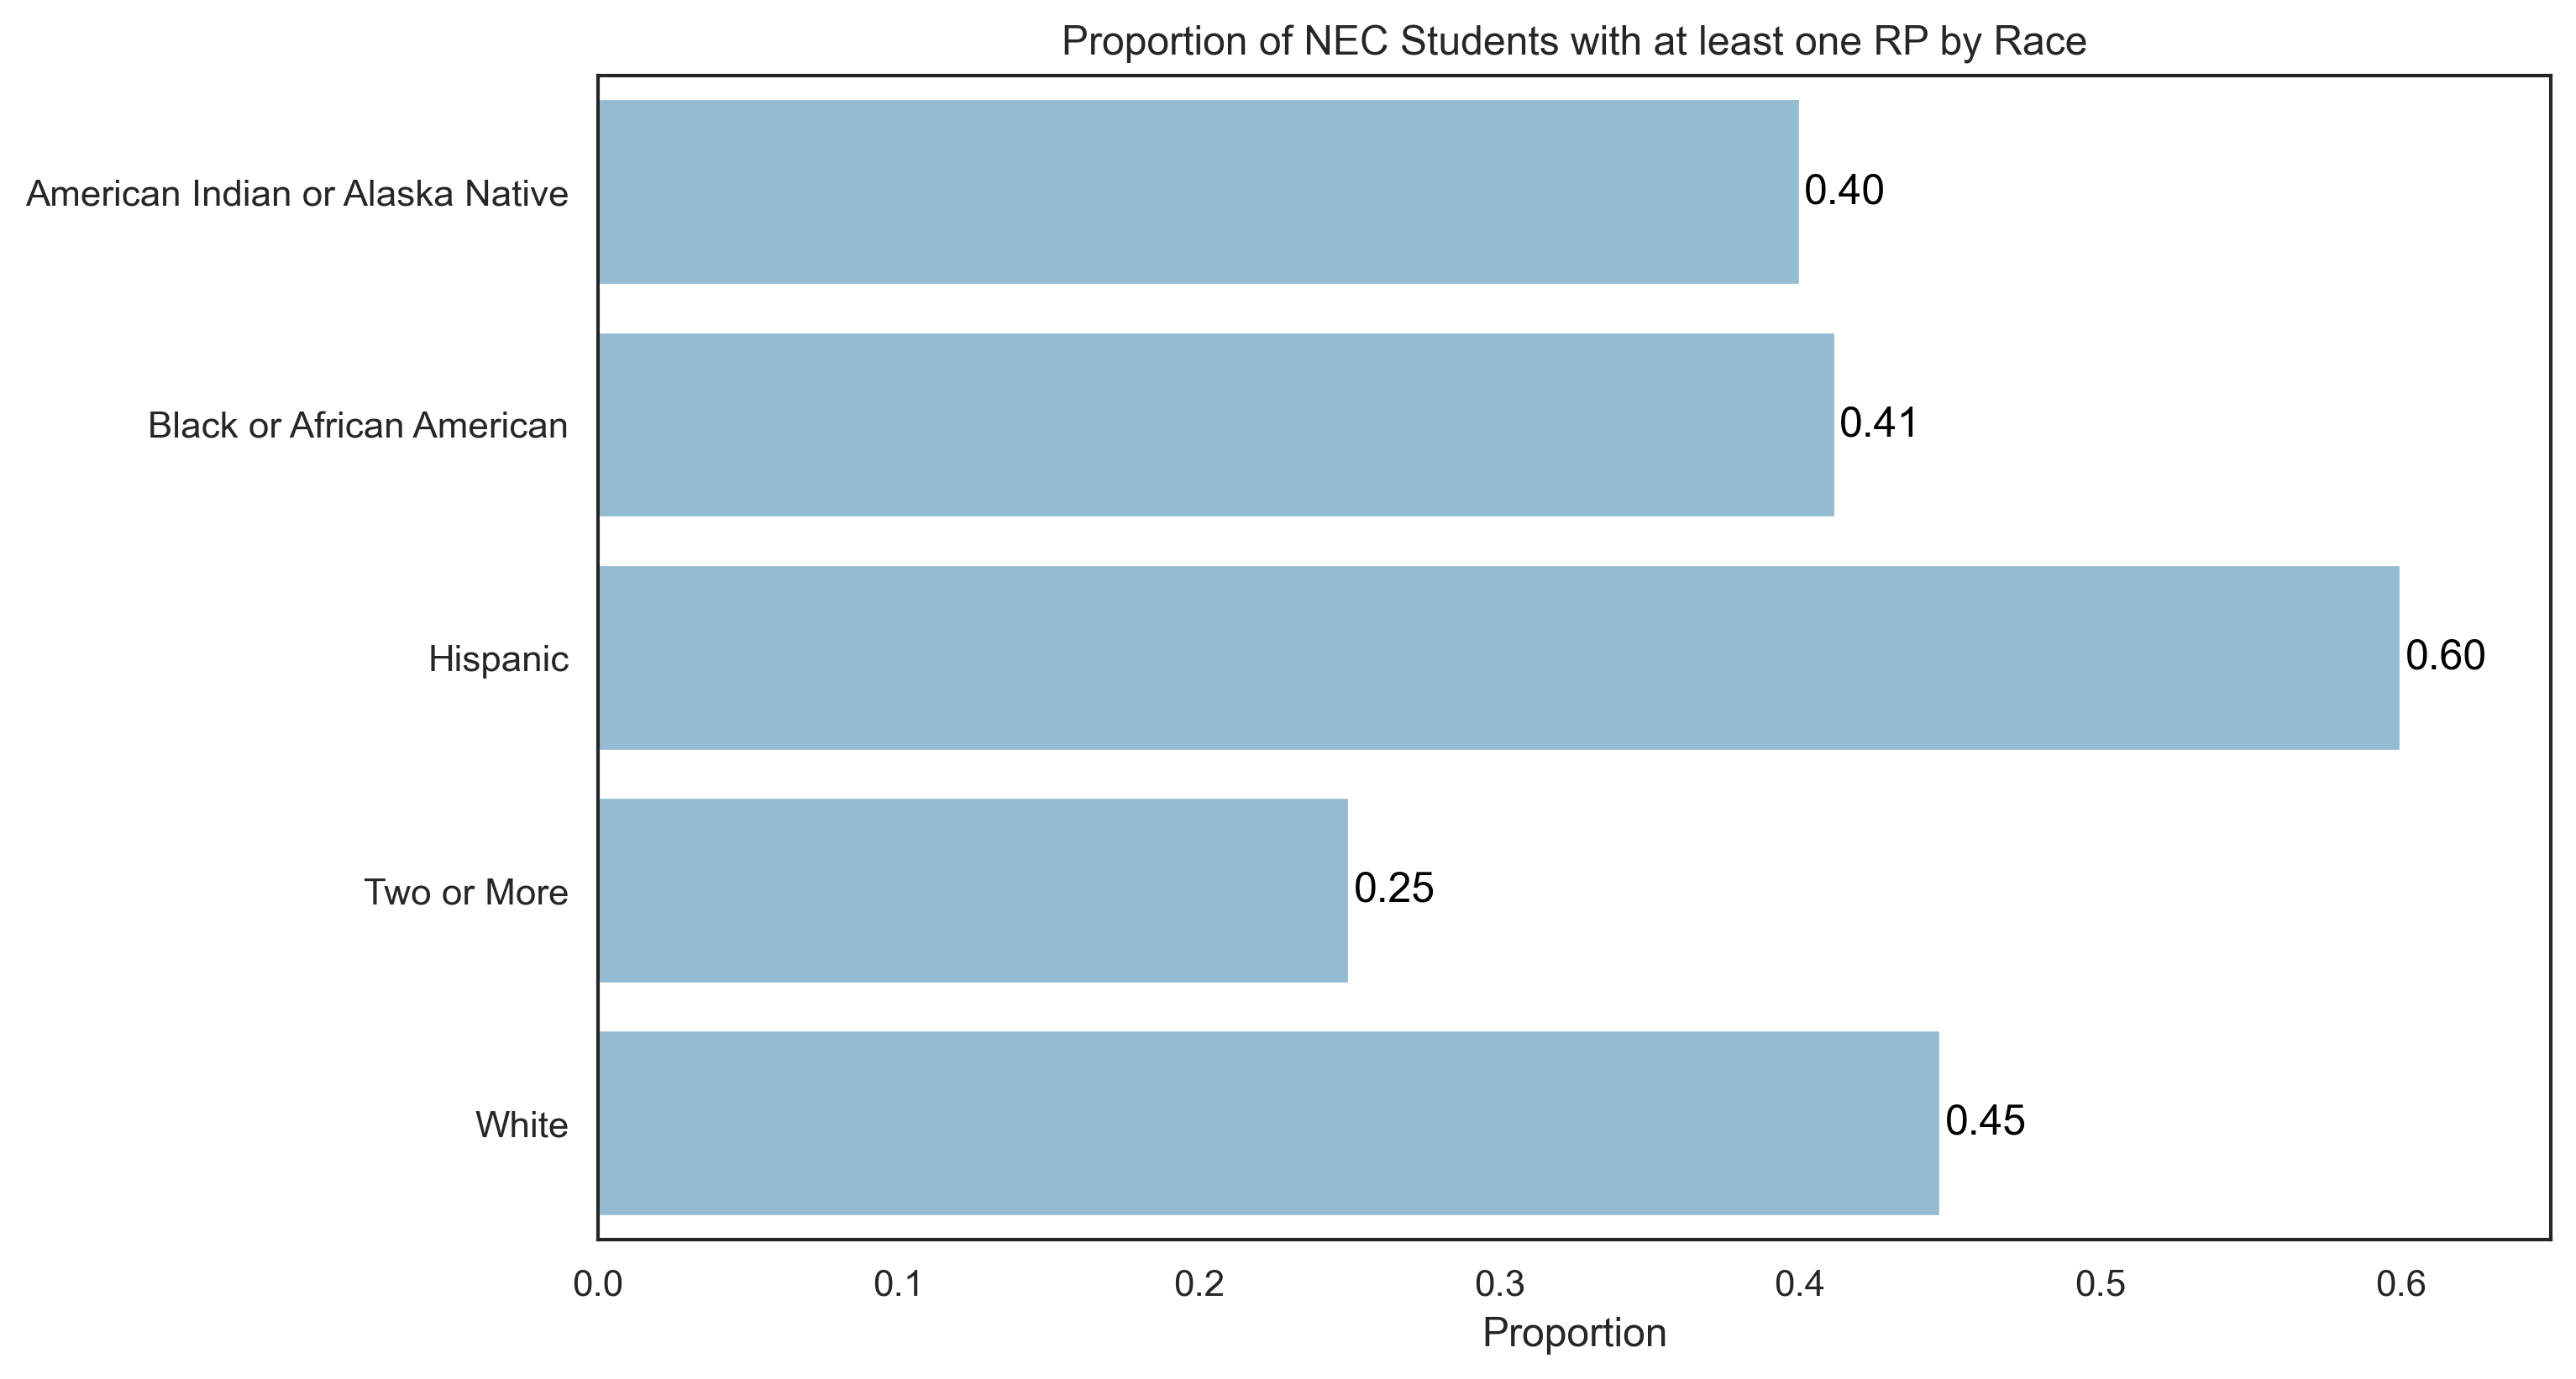

In [40]:
fig = plt.figure(figsize=(10,6))

df_to_plot=nec_rp_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .015 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of NEC Students with at least one RP by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/nec_rp_by_race', bbox_inches='tight')
plt.show()

In [41]:
nec_race=nec_df['Student Race'].value_counts().sort_index().to_frame()
nec_race

,count
Student Race,
American Indian or Alaska Native,5
Asian,7
Black or African American,102
Hispanic,15
Two or More,16
White,47


In [42]:
nec_race.to_clipboard()

## SEC

In [43]:
sec_df=combined_df[combined_df['School']=='SEC SPED']

In [44]:
sec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 1 to 862
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 157 non-null    object 
 1   Student Name                 157 non-null    object 
 2   District287 Id               157 non-null    int64  
 3   Grade                        157 non-null    object 
 4   Student Race                 157 non-null    object 
 5   Student Gender               157 non-null    object 
 6   Student Age                  157 non-null    object 
 7   Language Spoken In the Home  157 non-null    object 
 8   Original Enter Date          157 non-null    object 
 9   District Of Residence        157 non-null    object 
 10  Staff Name                   157 non-null    object 
 11  Classroom Enter Date         157 non-null    object 
 12  Classroom Leave Date         11 non-null     object 
 13  Employee Number          

In [45]:
# Count of students with RPs by grade
sec_rp_by_grade=sec_df.groupby('Grade')['RP'].value_counts(normalize=True).to_frame().reset_index()
sec_rp_by_grade=sec_rp_by_grade[sec_rp_by_grade['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
sec_rp_by_grade

,Grade,RP,Proportion
0,01,Yes,0.714286
3,02,Yes,0.375000
5,03,Yes,0.500000
7,04,Yes,0.466667
8,05,Yes,0.818182
10,06,Yes,0.538462
13,07,Yes,0.166667
15,08,Yes,0.400000
17,09,Yes,0.307692
19,10,Yes,0.100000


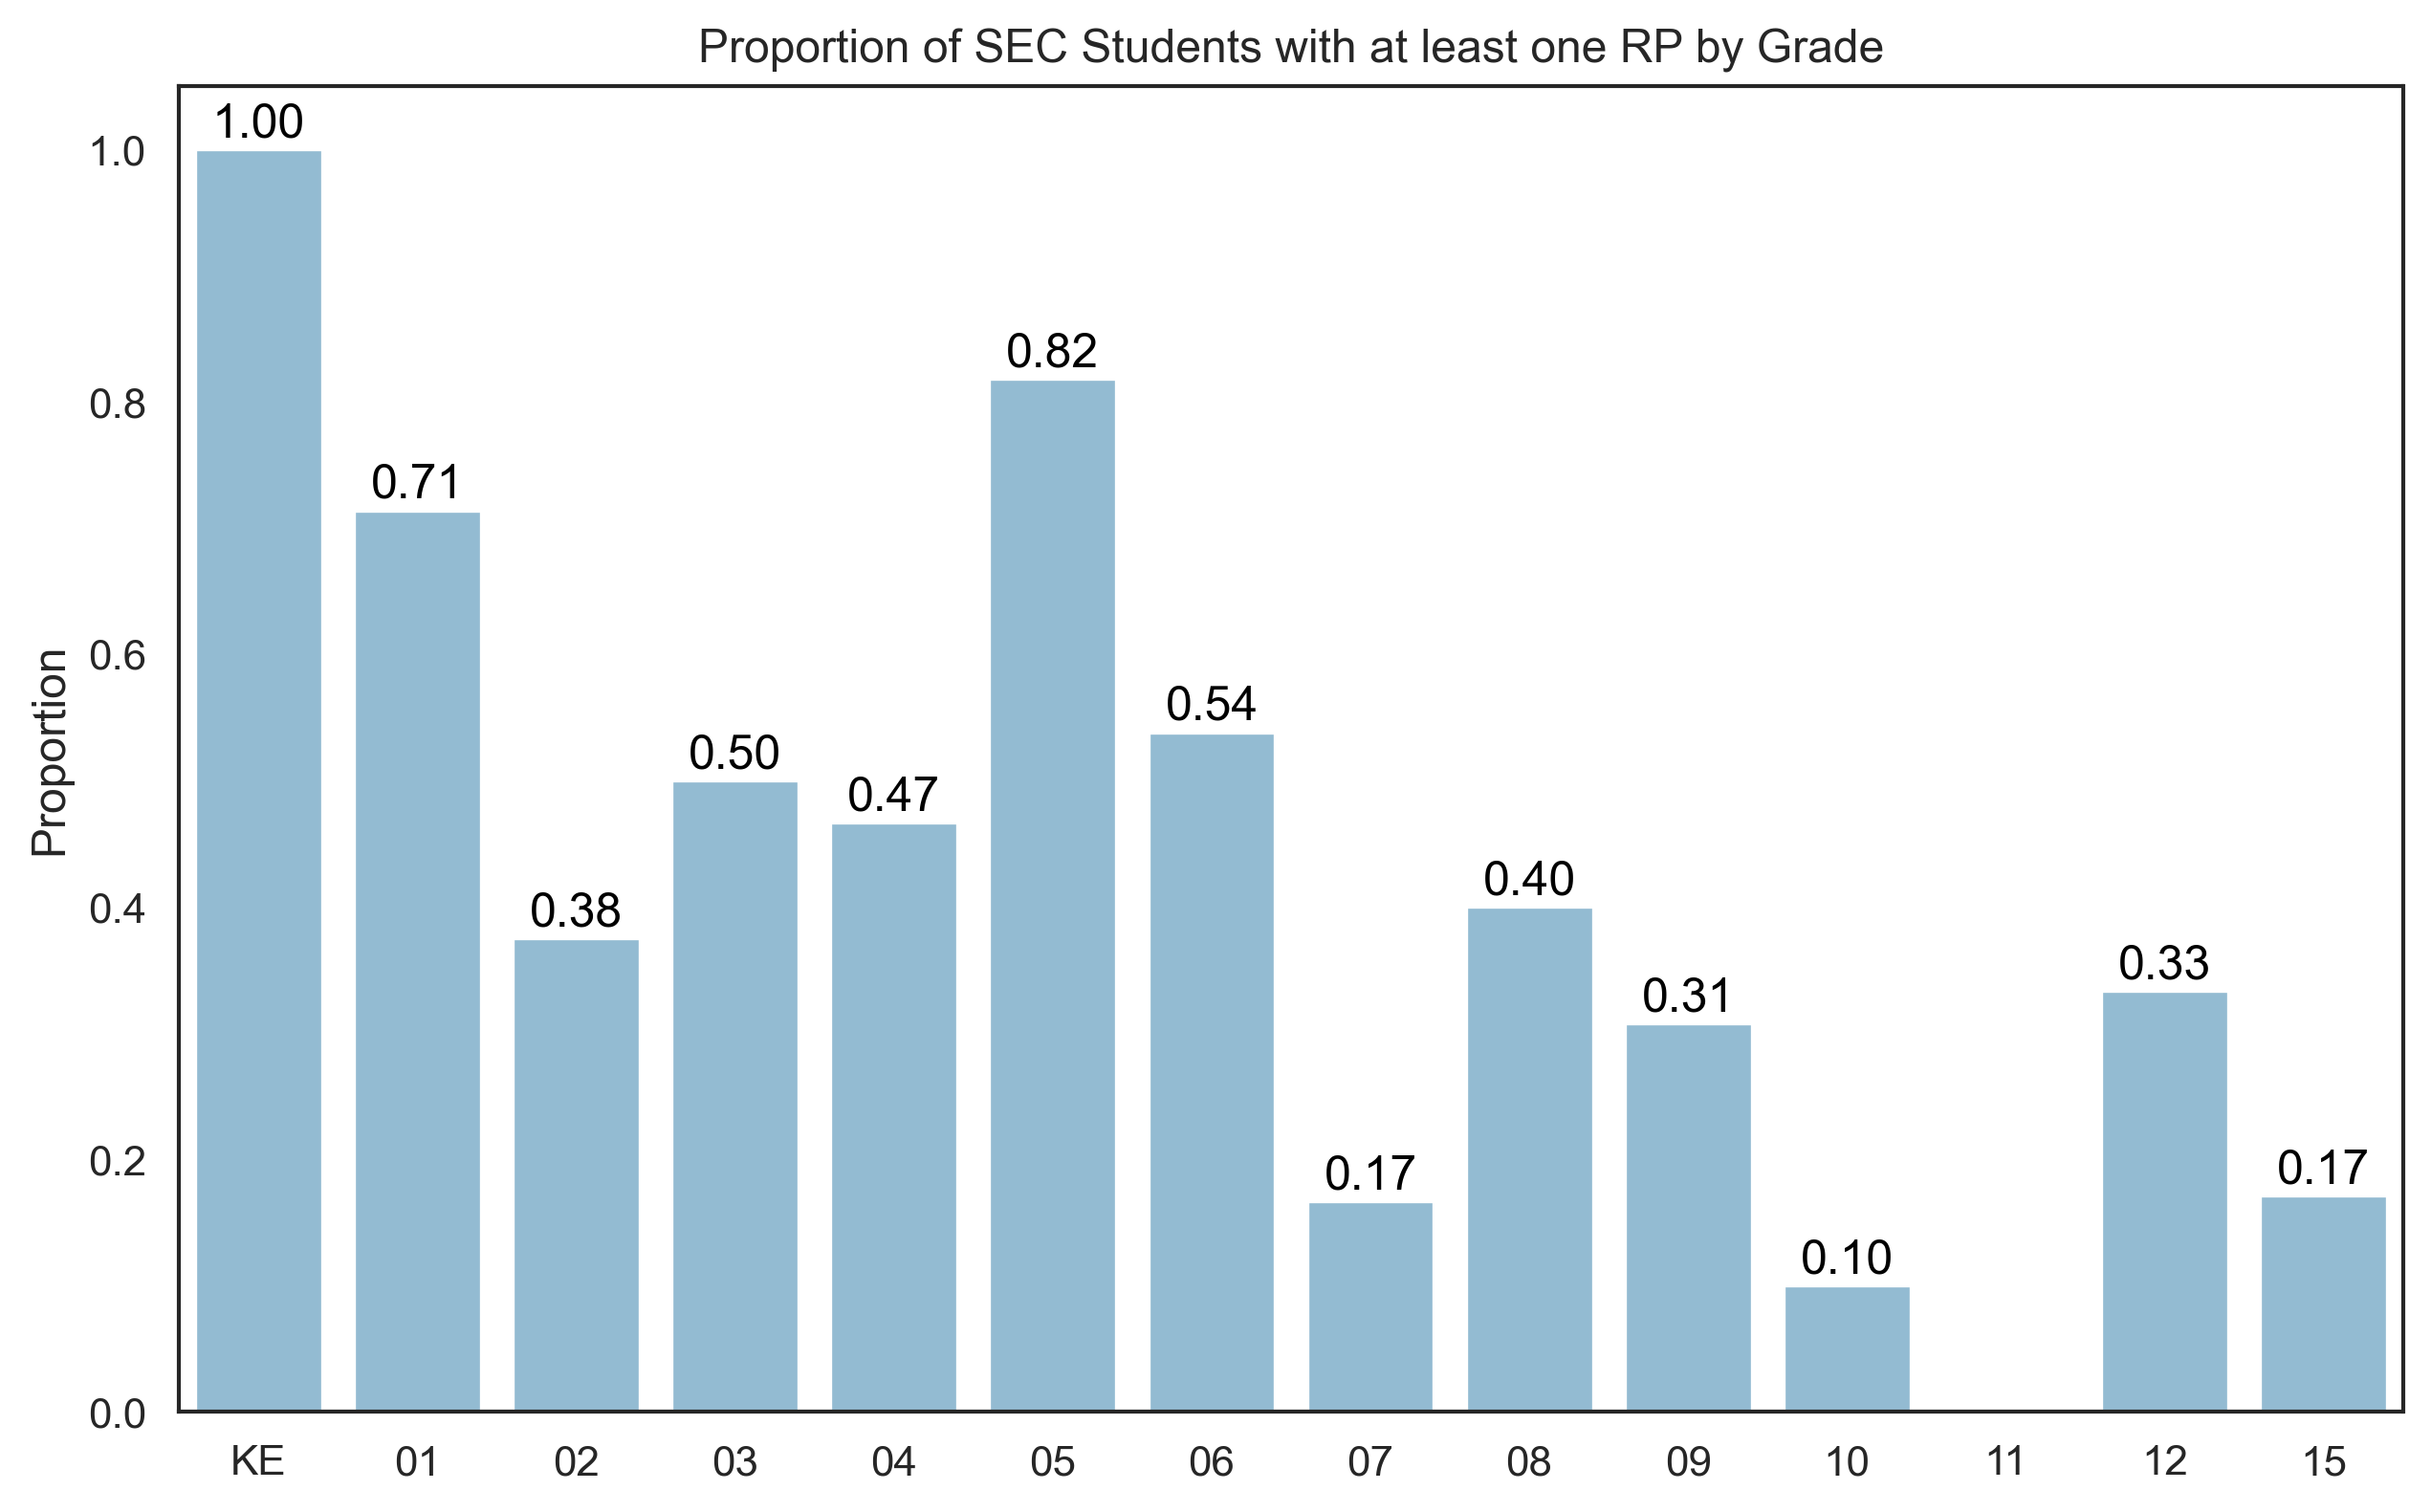

In [46]:
fig = plt.figure(figsize=(10,6))

df_to_plot=sec_rp_by_grade
order=['KE', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '15']

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
                 order=order
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of SEC Students with at least one RP by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/sec_rp_by_grade', bbox_inches='tight')
plt.show()

In [47]:
sec_grade=sec_df['Grade'].value_counts().sort_index().to_frame()
sec_grade

,count
Grade,
01,7
02,8
03,6
04,15
05,11
06,13
07,6
08,20
09,13


In [48]:
sec_grade.to_clipboard()

In [49]:
# Count of students with RPs by program
sec_rp_by_program=sec_df.groupby('Site/Program')['RP'].value_counts(normalize=True).to_frame().reset_index()
sec_rp_by_program=sec_rp_by_program[sec_rp_by_program['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
sec_rp_by_program

,Site/Program,RP,Proportion
1,302S SEC Tier 2,Yes,0.474359
3,303S SEC Tier 3,Yes,0.340909
5,303ST SEC Tier 3 Trn,Yes,0.171429


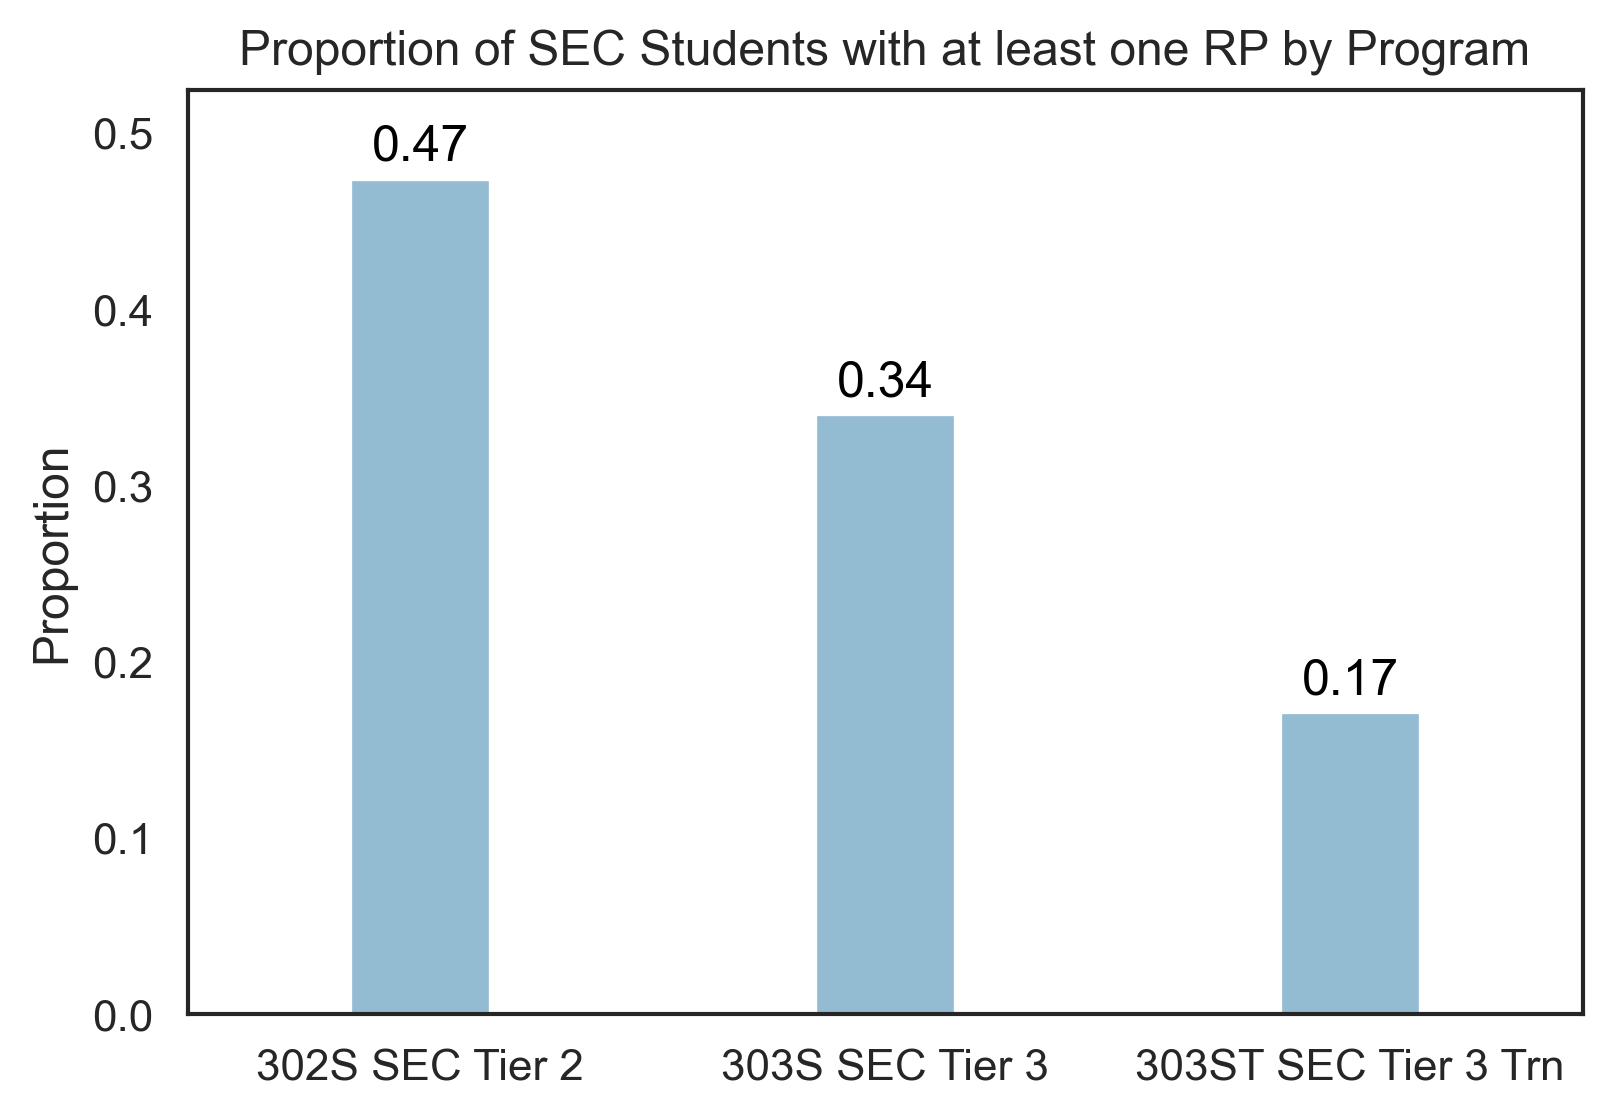

In [50]:
fig = plt.figure(figsize=(6,4))

df_to_plot=sec_rp_by_program

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
                 width=.3
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of SEC Students with at least one RP by Program")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/sec_rp_by_program', bbox_inches='tight')
plt.show()

In [51]:
sec_program=sec_df['Site/Program'].value_counts().sort_index().to_frame()
sec_program

,count
Site/Program,
302S SEC Tier 2,78
303S SEC Tier 3,44
303ST SEC Tier 3 Trn,35


In [52]:
sec_program.to_clipboard()

In [53]:
# Count of students with RPs by race
sec_rp_by_race=sec_df.groupby('Student Race')['RP'].value_counts(normalize=True).to_frame().reset_index()
sec_rp_by_race=sec_rp_by_race[sec_rp_by_race['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
sec_rp_by_race

,Student Race,RP,Proportion
1,American Indian or Alaska Native,Yes,0.333333
3,Asian,Yes,0.333333
5,Black or African American,Yes,0.492537
7,Hispanic,Yes,0.375000
9,Two or More,Yes,0.142857
11,White,Yes,0.306122


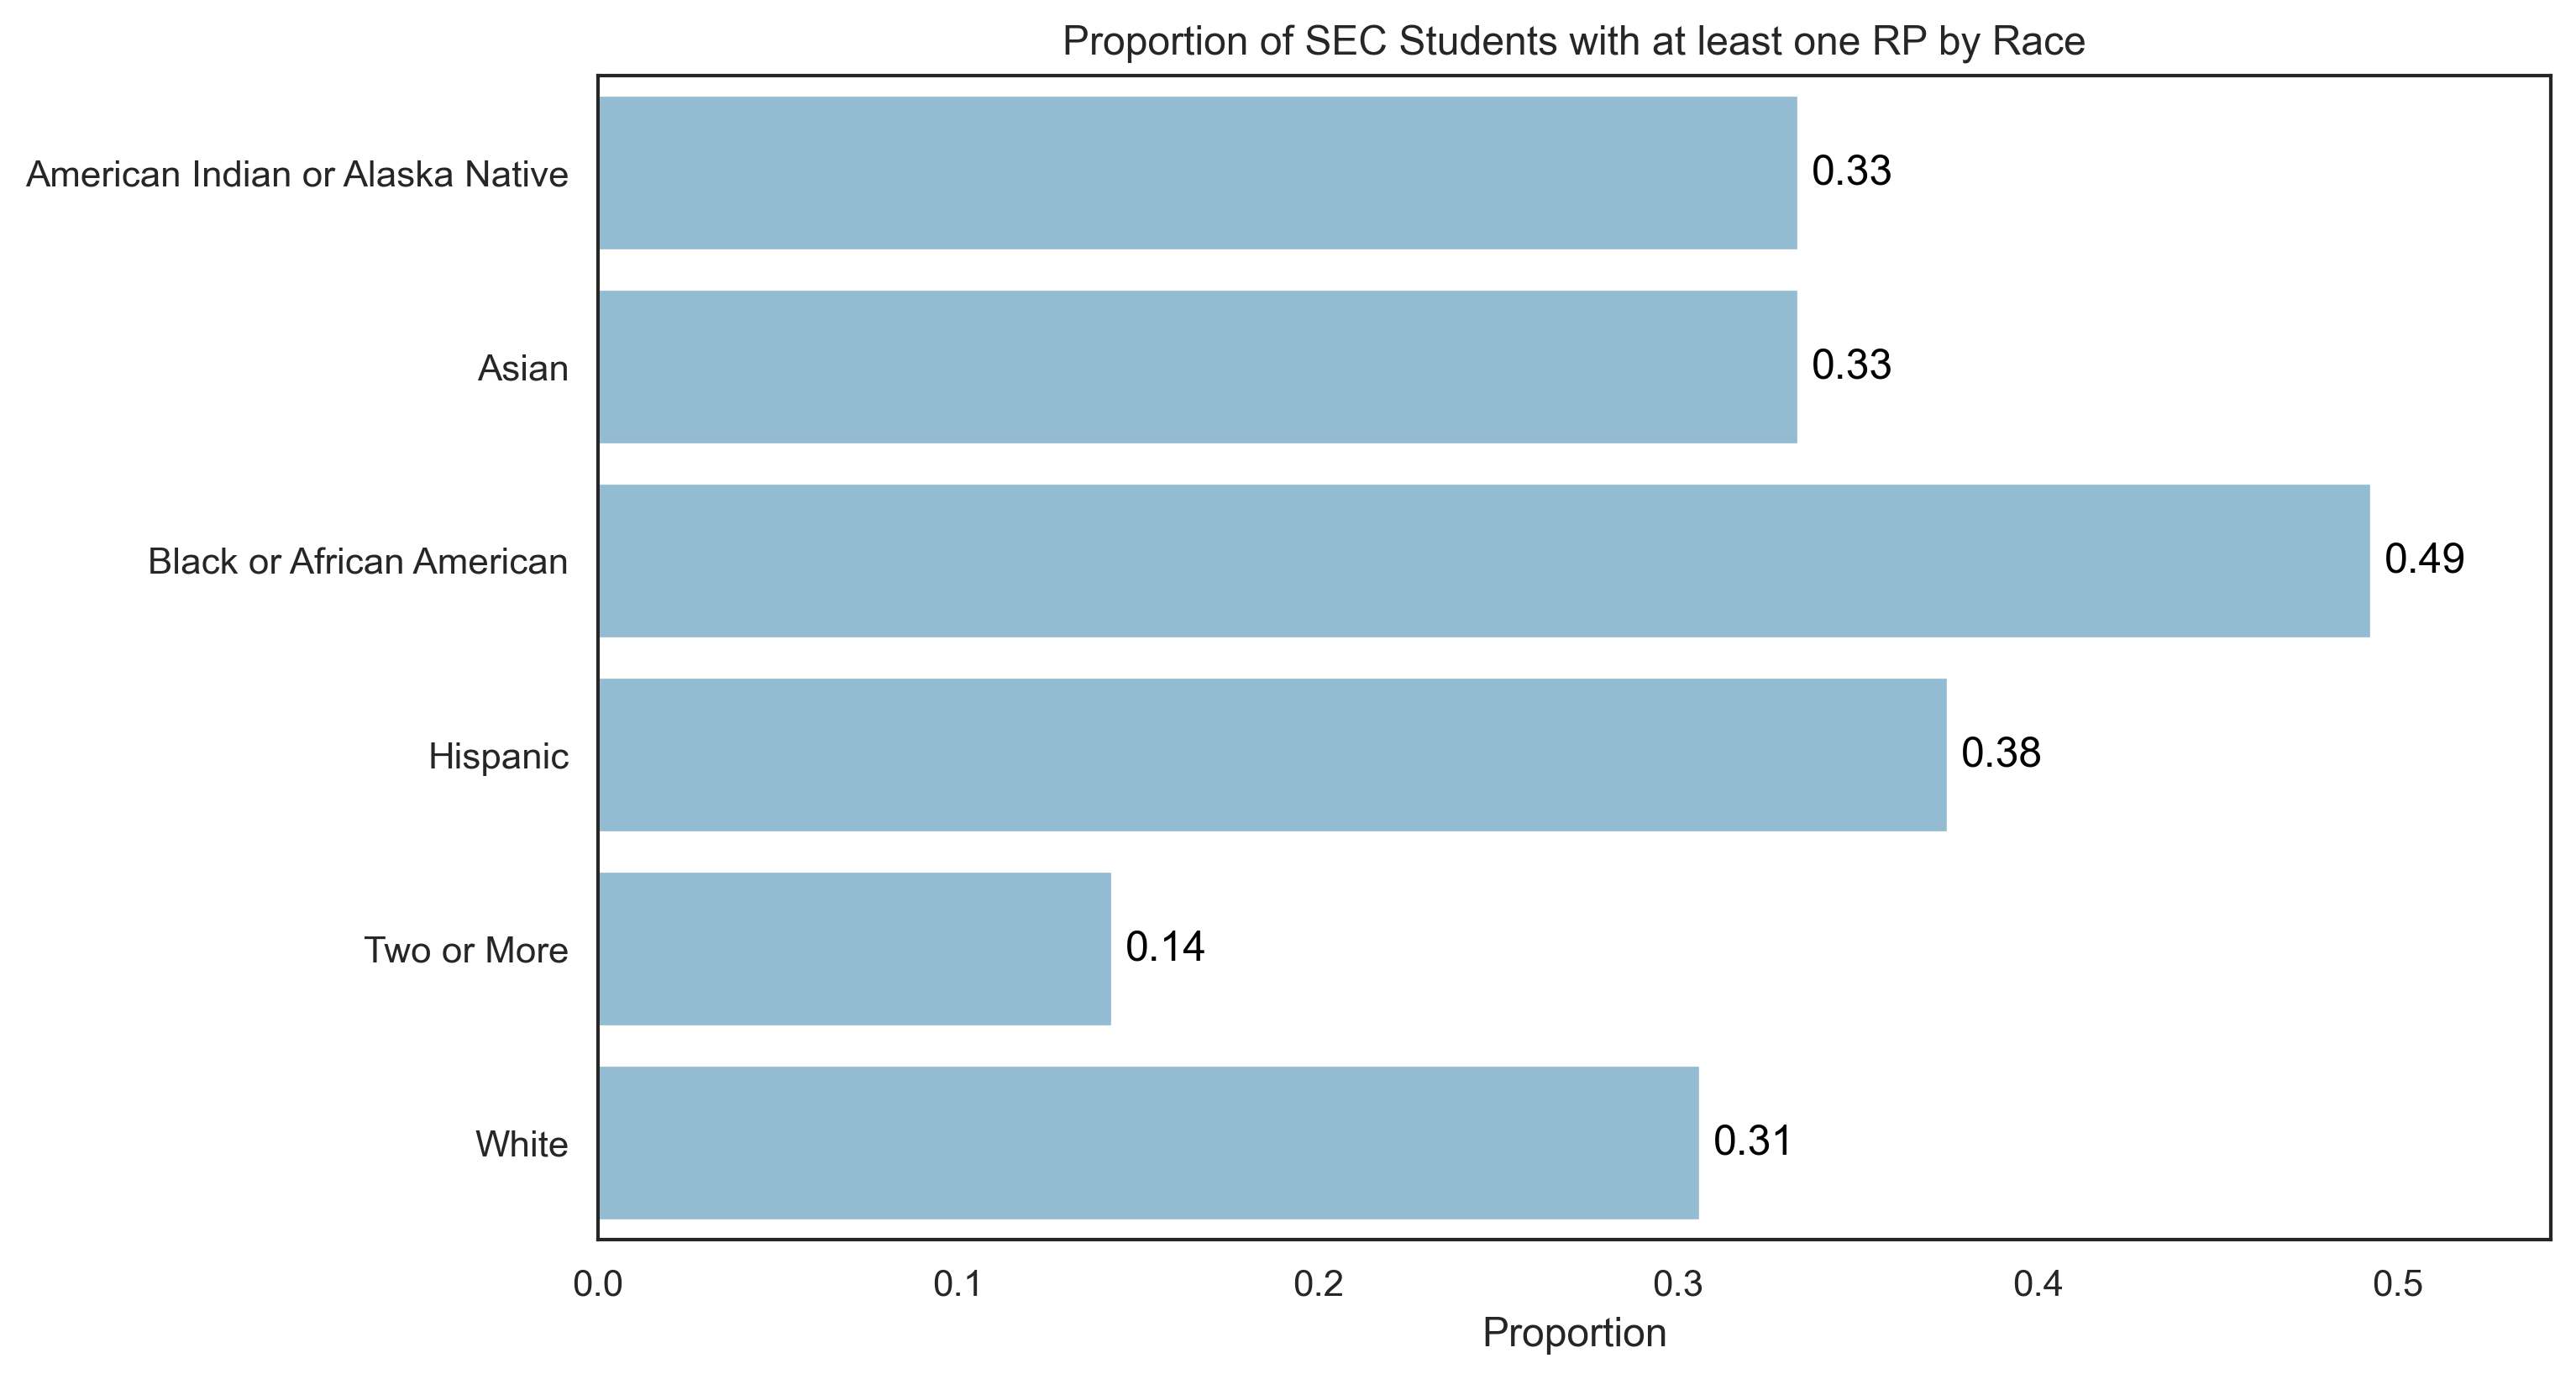

In [54]:
fig = plt.figure(figsize=(10,6))

df_to_plot=sec_rp_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .015 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of SEC Students with at least one RP by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/sec_rp_by_race', bbox_inches='tight')
plt.show()

In [55]:
sec_race=sec_df['Student Race'].value_counts().sort_index().to_frame()
sec_race

,count
Student Race,
American Indian or Alaska Native,3
Asian,9
Black or African American,67
Hispanic,8
Two or More,21
White,49


In [56]:
sec_race.to_clipboard()

## WEC

In [57]:
wec_df=combined_df[combined_df['School']=='WEC SPED']

In [58]:
wec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 18 to 873
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 57 non-null     object 
 1   Student Name                 57 non-null     object 
 2   District287 Id               57 non-null     int64  
 3   Grade                        57 non-null     object 
 4   Student Race                 57 non-null     object 
 5   Student Gender               57 non-null     object 
 6   Student Age                  57 non-null     object 
 7   Language Spoken In the Home  57 non-null     object 
 8   Original Enter Date          57 non-null     object 
 9   District Of Residence        57 non-null     object 
 10  Staff Name                   57 non-null     object 
 11  Classroom Enter Date         57 non-null     object 
 12  Classroom Leave Date         7 non-null      object 
 13  Employee Number          

In [59]:
# Count of students with RPs by grade
wec_rp_by_grade=wec_df.groupby('Grade')['RP'].value_counts(normalize=True).to_frame().reset_index()
wec_rp_by_grade=wec_rp_by_grade[wec_rp_by_grade['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
wec_rp_by_grade

,Grade,RP,Proportion
1,09,Yes,0.500000
3,10,Yes,0.444444
5,11,Yes,0.250000
7,12,Yes,0.444444
9,15,Yes,0.043478


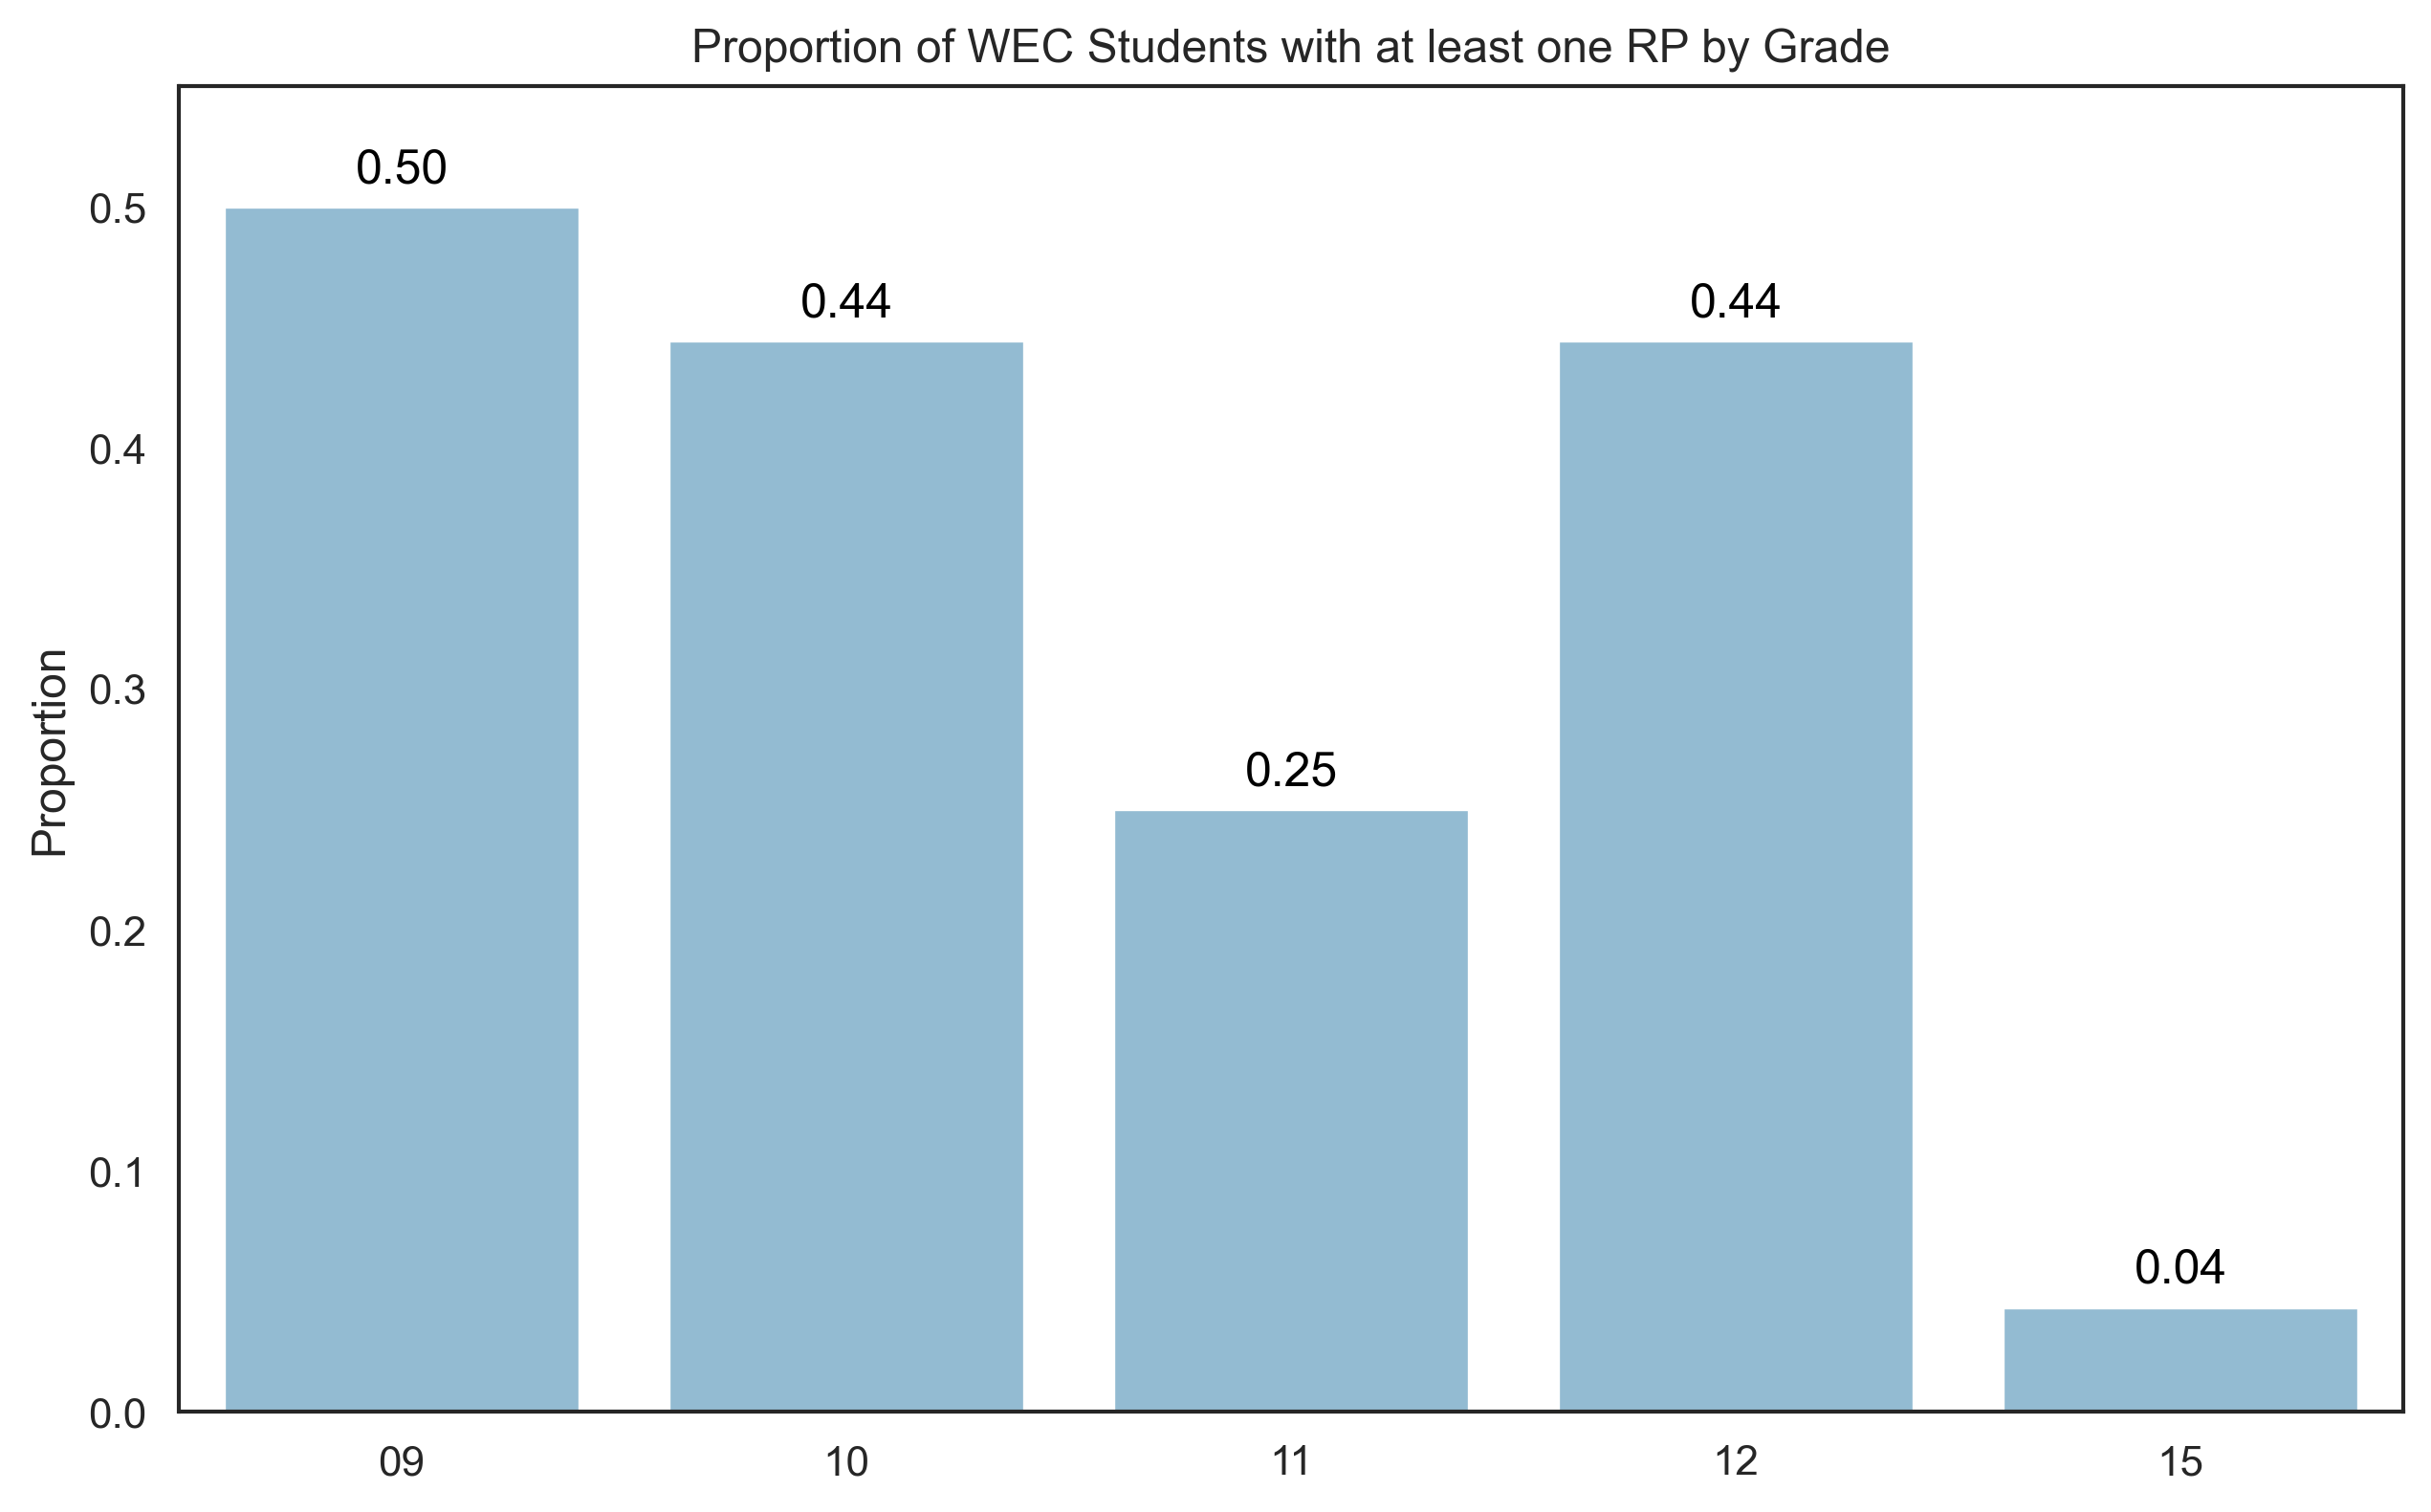

In [60]:
fig = plt.figure(figsize=(10,6))

df_to_plot=wec_rp_by_grade

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of WEC Students with at least one RP by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/wec_rp_by_grade', bbox_inches='tight')
plt.show()

In [61]:
wec_grade=wec_df['Grade'].value_counts().sort_index().to_frame()
wec_grade

,count
Grade,
09,4
10,9
11,12
12,9
15,23


In [62]:
wec_grade.to_clipboard()

In [63]:
# Count of students with RPs by program
wec_rp_by_program=wec_df.groupby('Site/Program')['RP'].value_counts(normalize=True).to_frame().reset_index()
wec_rp_by_program=wec_rp_by_program[wec_rp_by_program['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
wec_rp_by_program

,Site/Program,RP,Proportion
1,302W WEC Tier Two,Yes,0.250000
3,303W WEC Tier 3,Yes,0.571429
6,303WT WEC Tier 3 Trn,Yes,0.200000


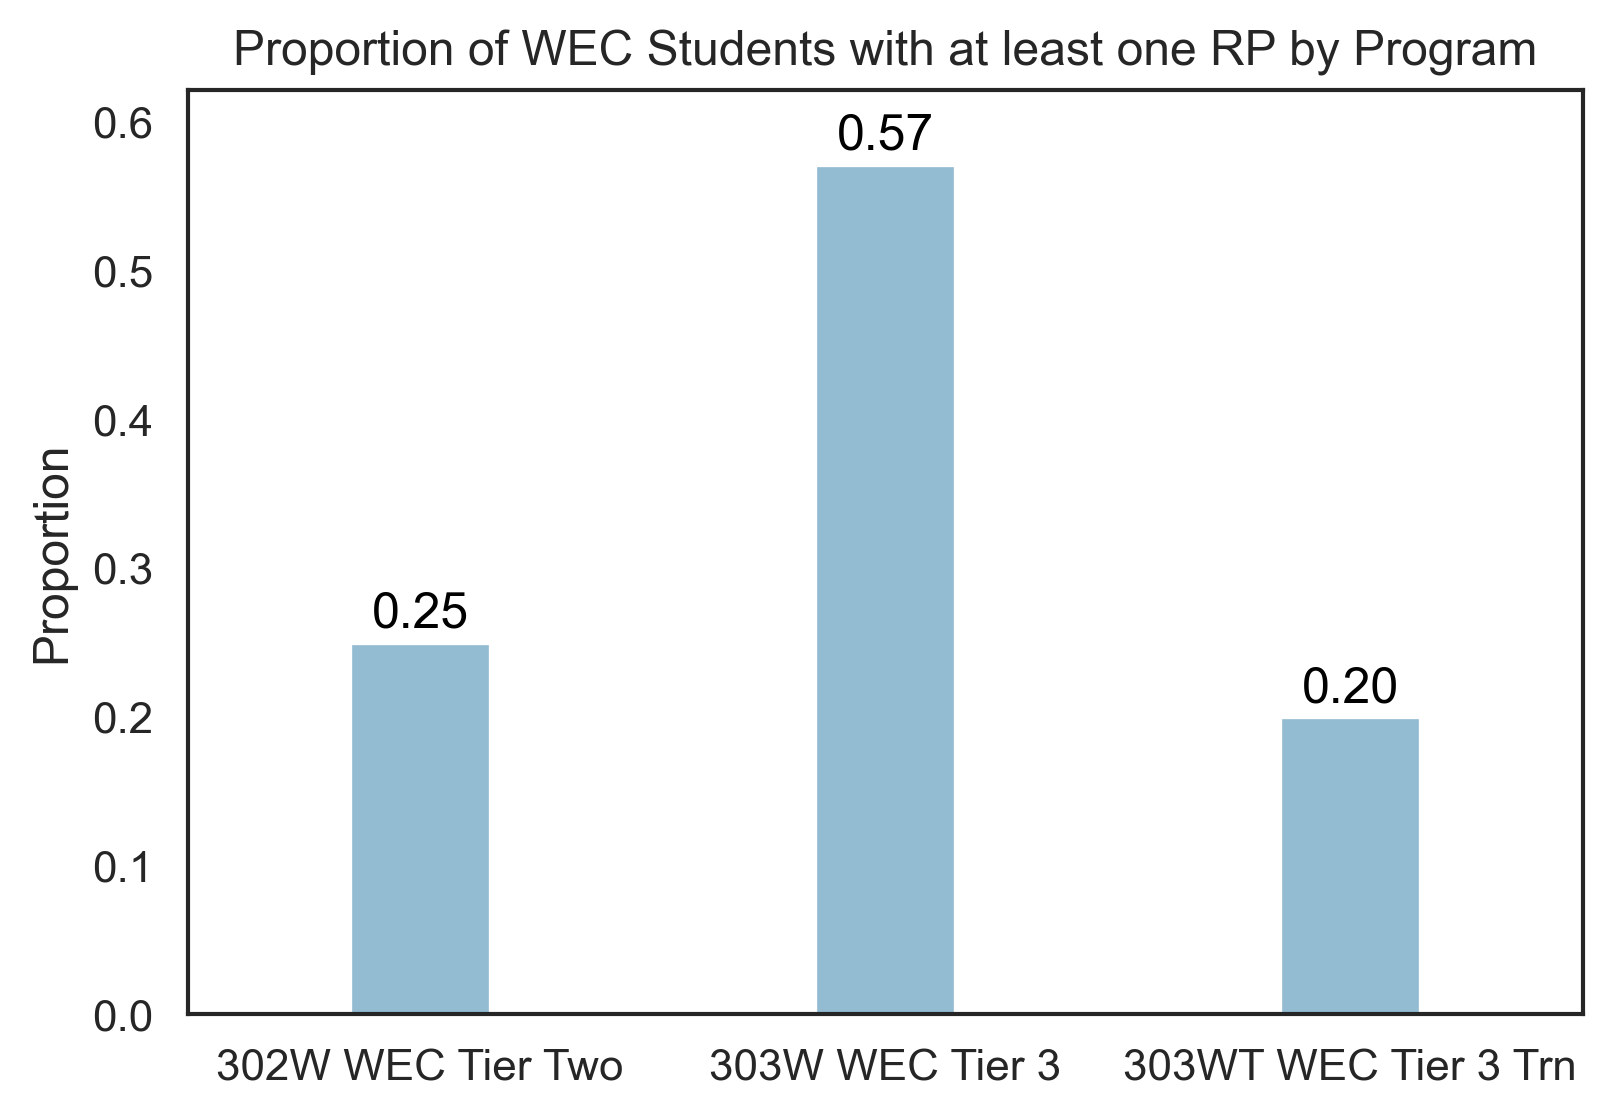

In [64]:
fig = plt.figure(figsize=(6,4))

df_to_plot=wec_rp_by_program

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
                 width=.3
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of WEC Students with at least one RP by Program")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/wec_rp_by_program', bbox_inches='tight')
plt.show()

In [65]:
wec_program=wec_df['Site/Program'].value_counts().sort_index().to_frame()
wec_program

,count
Site/Program,
302W WEC Tier Two,20
302WT WEC Tier 2 Trn,18
303W WEC Tier 3,14
303WT WEC Tier 3 Trn,5


In [66]:
wec_program.to_clipboard()

In [67]:
# Count of students with RPs by race
wec_rp_by_race=wec_df.groupby('Student Race')['RP'].value_counts(normalize=True).to_frame().reset_index()
wec_rp_by_race=wec_rp_by_race[wec_rp_by_race['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
wec_rp_by_race

,Student Race,RP,Proportion
3,Black or African American,Yes,0.277778
5,Hispanic,Yes,0.333333
7,Native Hawaiian or Other Pacific Islander,Yes,0.500000
9,Two or More,Yes,0.333333
11,White,Yes,0.200000


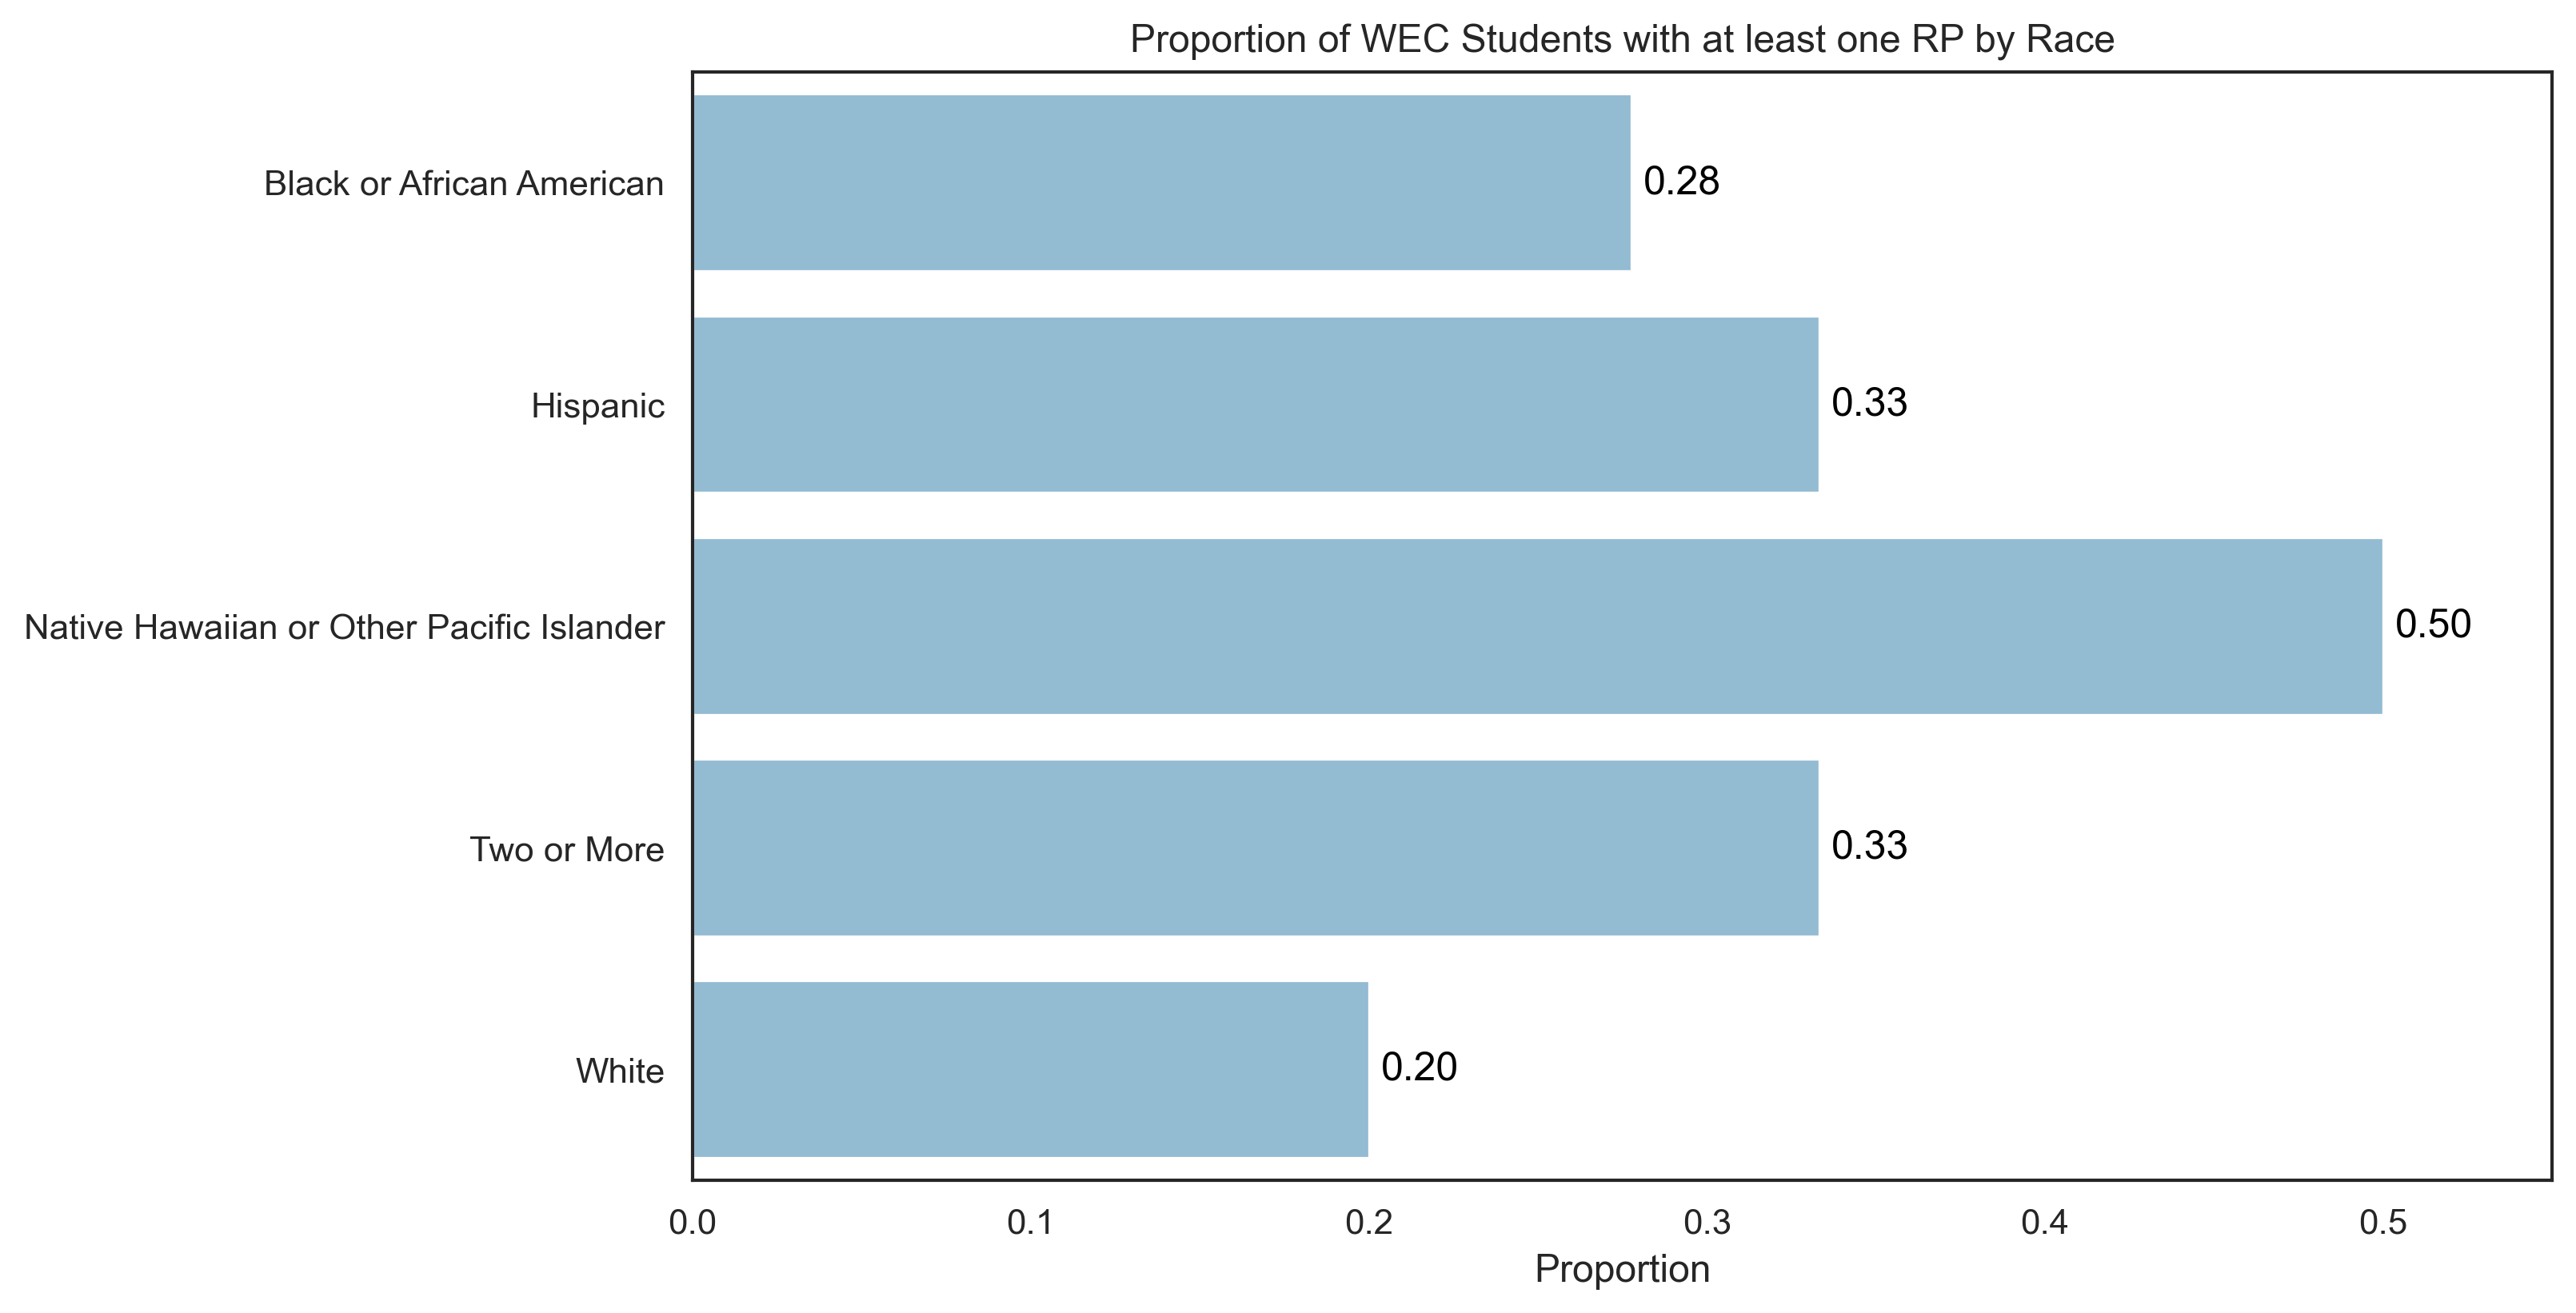

In [68]:
fig = plt.figure(figsize=(10,6))

df_to_plot=wec_rp_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .015 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of WEC Students with at least one RP by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/wec_rp_by_race', bbox_inches='tight')
plt.show()

In [69]:
wec_race=wec_df['Student Race'].value_counts().sort_index().to_frame()
wec_race

,count
Student Race,
American Indian or Alaska Native,1
Asian,4
Black or African American,18
Hispanic,3
Native Hawaiian or Other Pacific Islander,2
Two or More,9
White,20


In [70]:
wec_race.to_clipboard()

## ABEC

In [71]:
abec_df=combined_df[combined_df['School']=='ABEC']

In [72]:
abec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 864
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 124 non-null    object 
 1   Student Name                 124 non-null    object 
 2   District287 Id               124 non-null    int64  
 3   Grade                        124 non-null    object 
 4   Student Race                 124 non-null    object 
 5   Student Gender               124 non-null    object 
 6   Student Age                  124 non-null    object 
 7   Language Spoken In the Home  124 non-null    object 
 8   Original Enter Date          124 non-null    object 
 9   District Of Residence        124 non-null    object 
 10  Staff Name                   124 non-null    object 
 11  Classroom Enter Date         124 non-null    object 
 12  Classroom Leave Date         10 non-null     object 
 13  Employee Number          

In [73]:
# Count of students with RPs by grade
abec_rp_by_grade=abec_df.groupby('Grade')['RP'].value_counts(normalize=True).to_frame().reset_index()
abec_rp_by_grade=abec_rp_by_grade[abec_rp_by_grade['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
abec_rp_by_grade

,Grade,RP,Proportion
1,09,Yes,0.066667
3,10,Yes,0.384615
5,11,Yes,0.142857
7,12,Yes,0.058824
9,15,Yes,0.034483


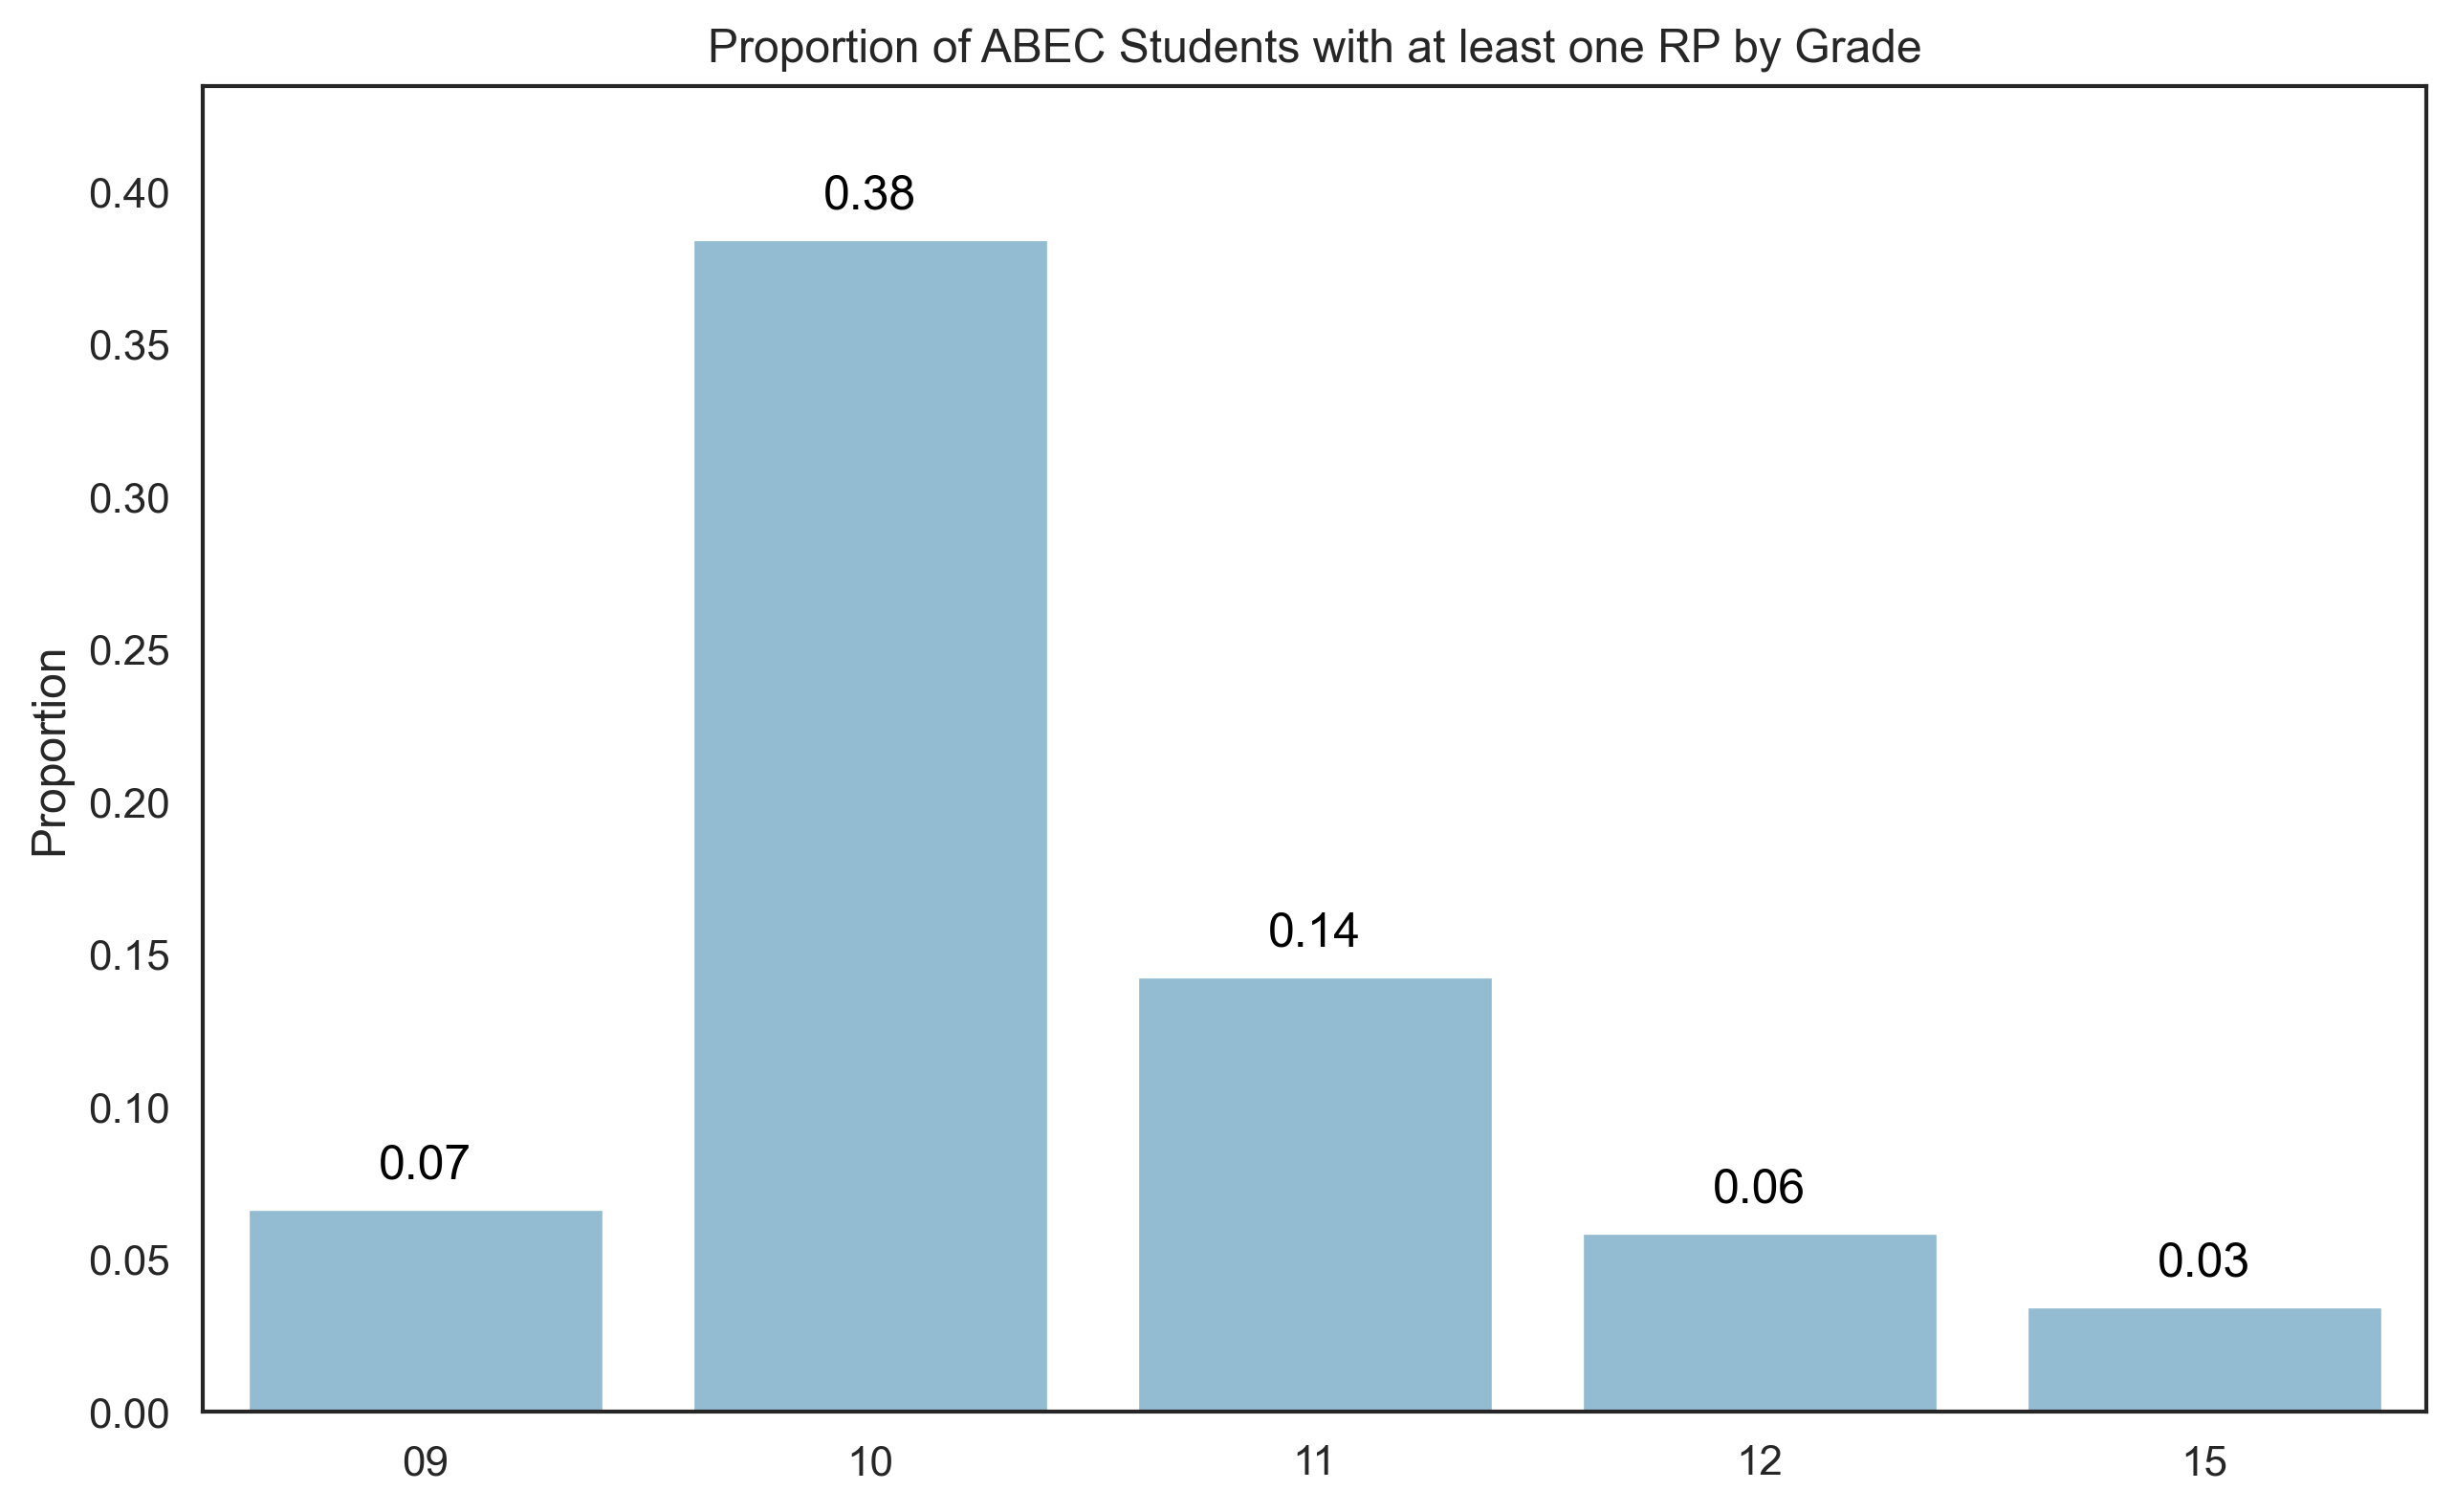

In [74]:
fig = plt.figure(figsize=(10,6))

df_to_plot=abec_rp_by_grade

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of ABEC Students with at least one RP by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/abec_rp_by_grade', bbox_inches='tight')
plt.show()

In [75]:
abec_grade=abec_df['Grade'].value_counts().sort_index().to_frame()
abec_grade

,count
Grade,
09,15
10,13
11,21
12,17
15,58


In [76]:
abec_grade.to_clipboard()

In [77]:
# Count of students with RPs by program
abec_rp_by_program=abec_df.groupby('Site/Program')['RP'].value_counts(normalize=True).to_frame().reset_index()
abec_rp_by_program=abec_rp_by_program[abec_rp_by_program['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
abec_rp_by_program

,Site/Program,RP,Proportion
1,302A ABEC Tier 2,Yes,0.162162
4,303A ABEC Tier 3,Yes,0.142857
6,303AT ABEC Tier 3 Tr,Yes,0.066667


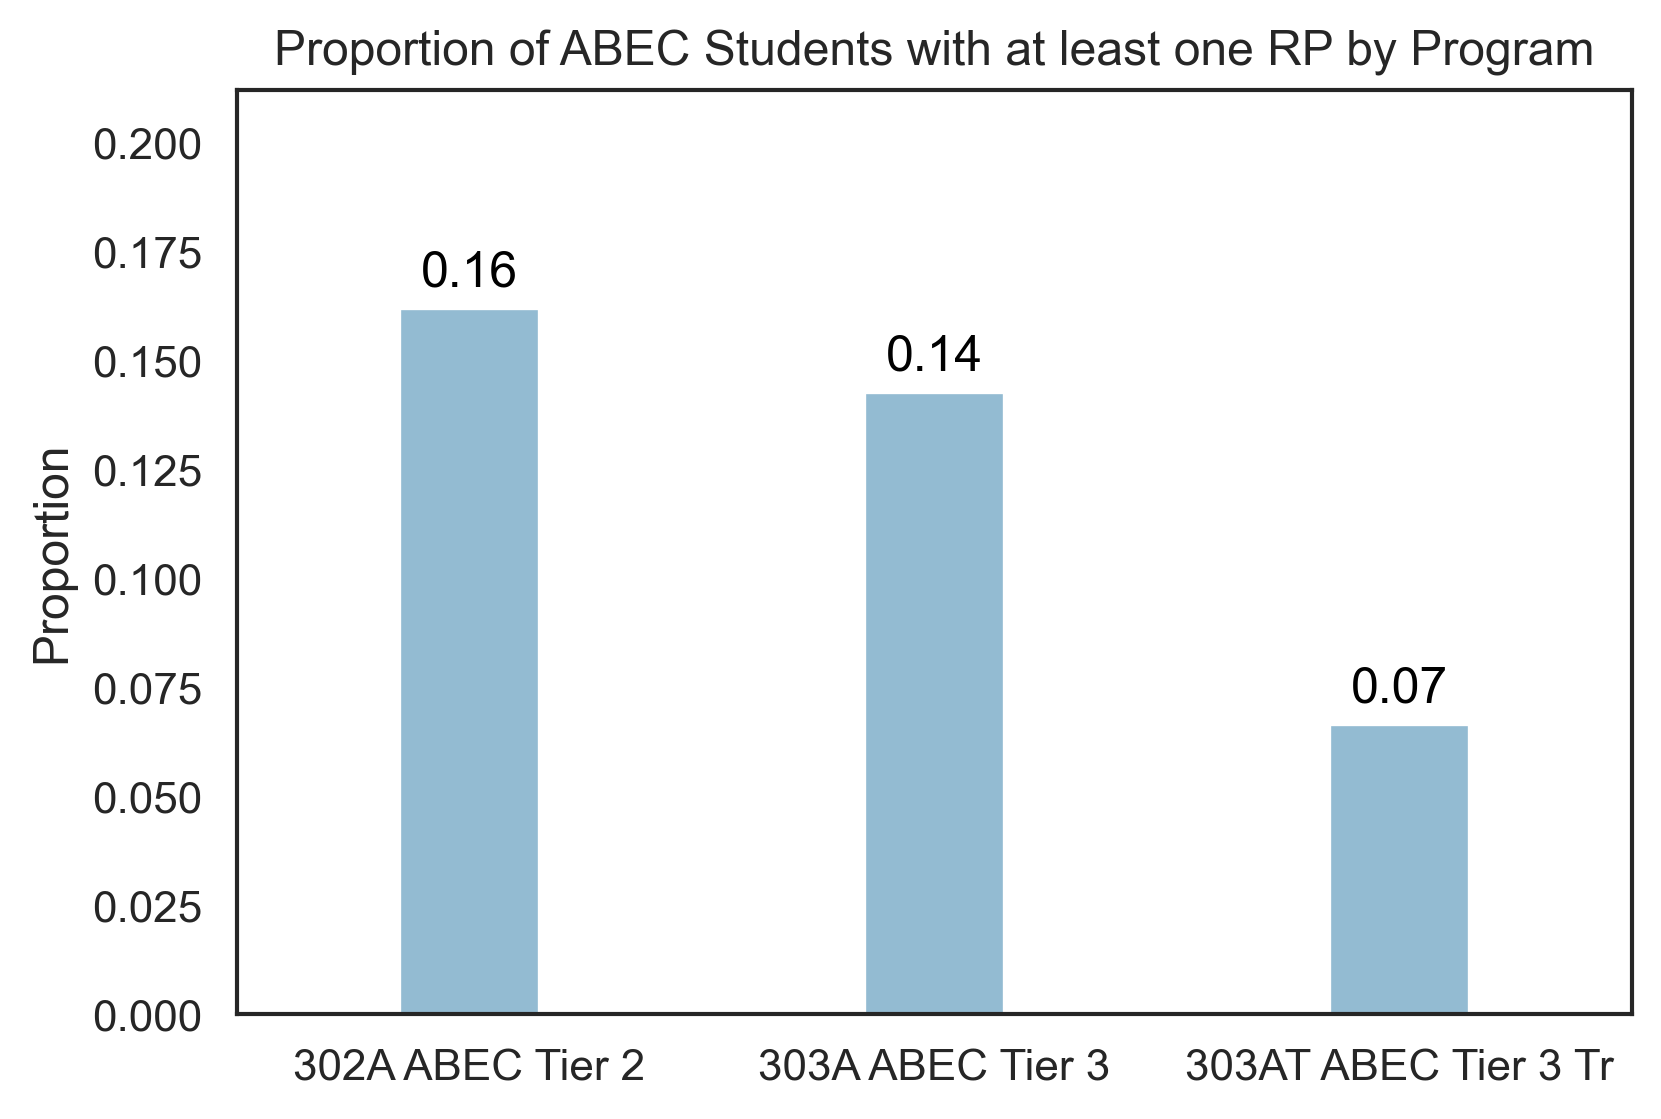

In [78]:
fig = plt.figure(figsize=(6,4))

df_to_plot=abec_rp_by_program

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
                 width=.3
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .005, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of ABEC Students with at least one RP by Program")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/abec_rp_by_program', bbox_inches='tight')
plt.show()

In [79]:
abec_program=abec_df['Site/Program'].value_counts().sort_index().to_frame()
abec_program

,count
Site/Program,
302A ABEC Tier 2,37
302AT ABEC Tier 2 Tr,29
303A ABEC Tier 3,28
303AT ABEC Tier 3 Tr,30


In [80]:
abec_program.to_clipboard()

In [81]:
# Count of students with RPs by race
abec_rp_by_race=abec_df.groupby('Student Race')['RP'].value_counts(normalize=True).to_frame().reset_index()
abec_rp_by_race=abec_rp_by_race[abec_rp_by_race['RP']=='Yes'].rename(columns={'proportion':'Proportion'})
abec_rp_by_race

,Student Race,RP,Proportion
2,Asian,Yes,0.250000
4,Black or African American,Yes,0.157895
6,Hispanic,Yes,0.066667
9,White,Yes,0.027778


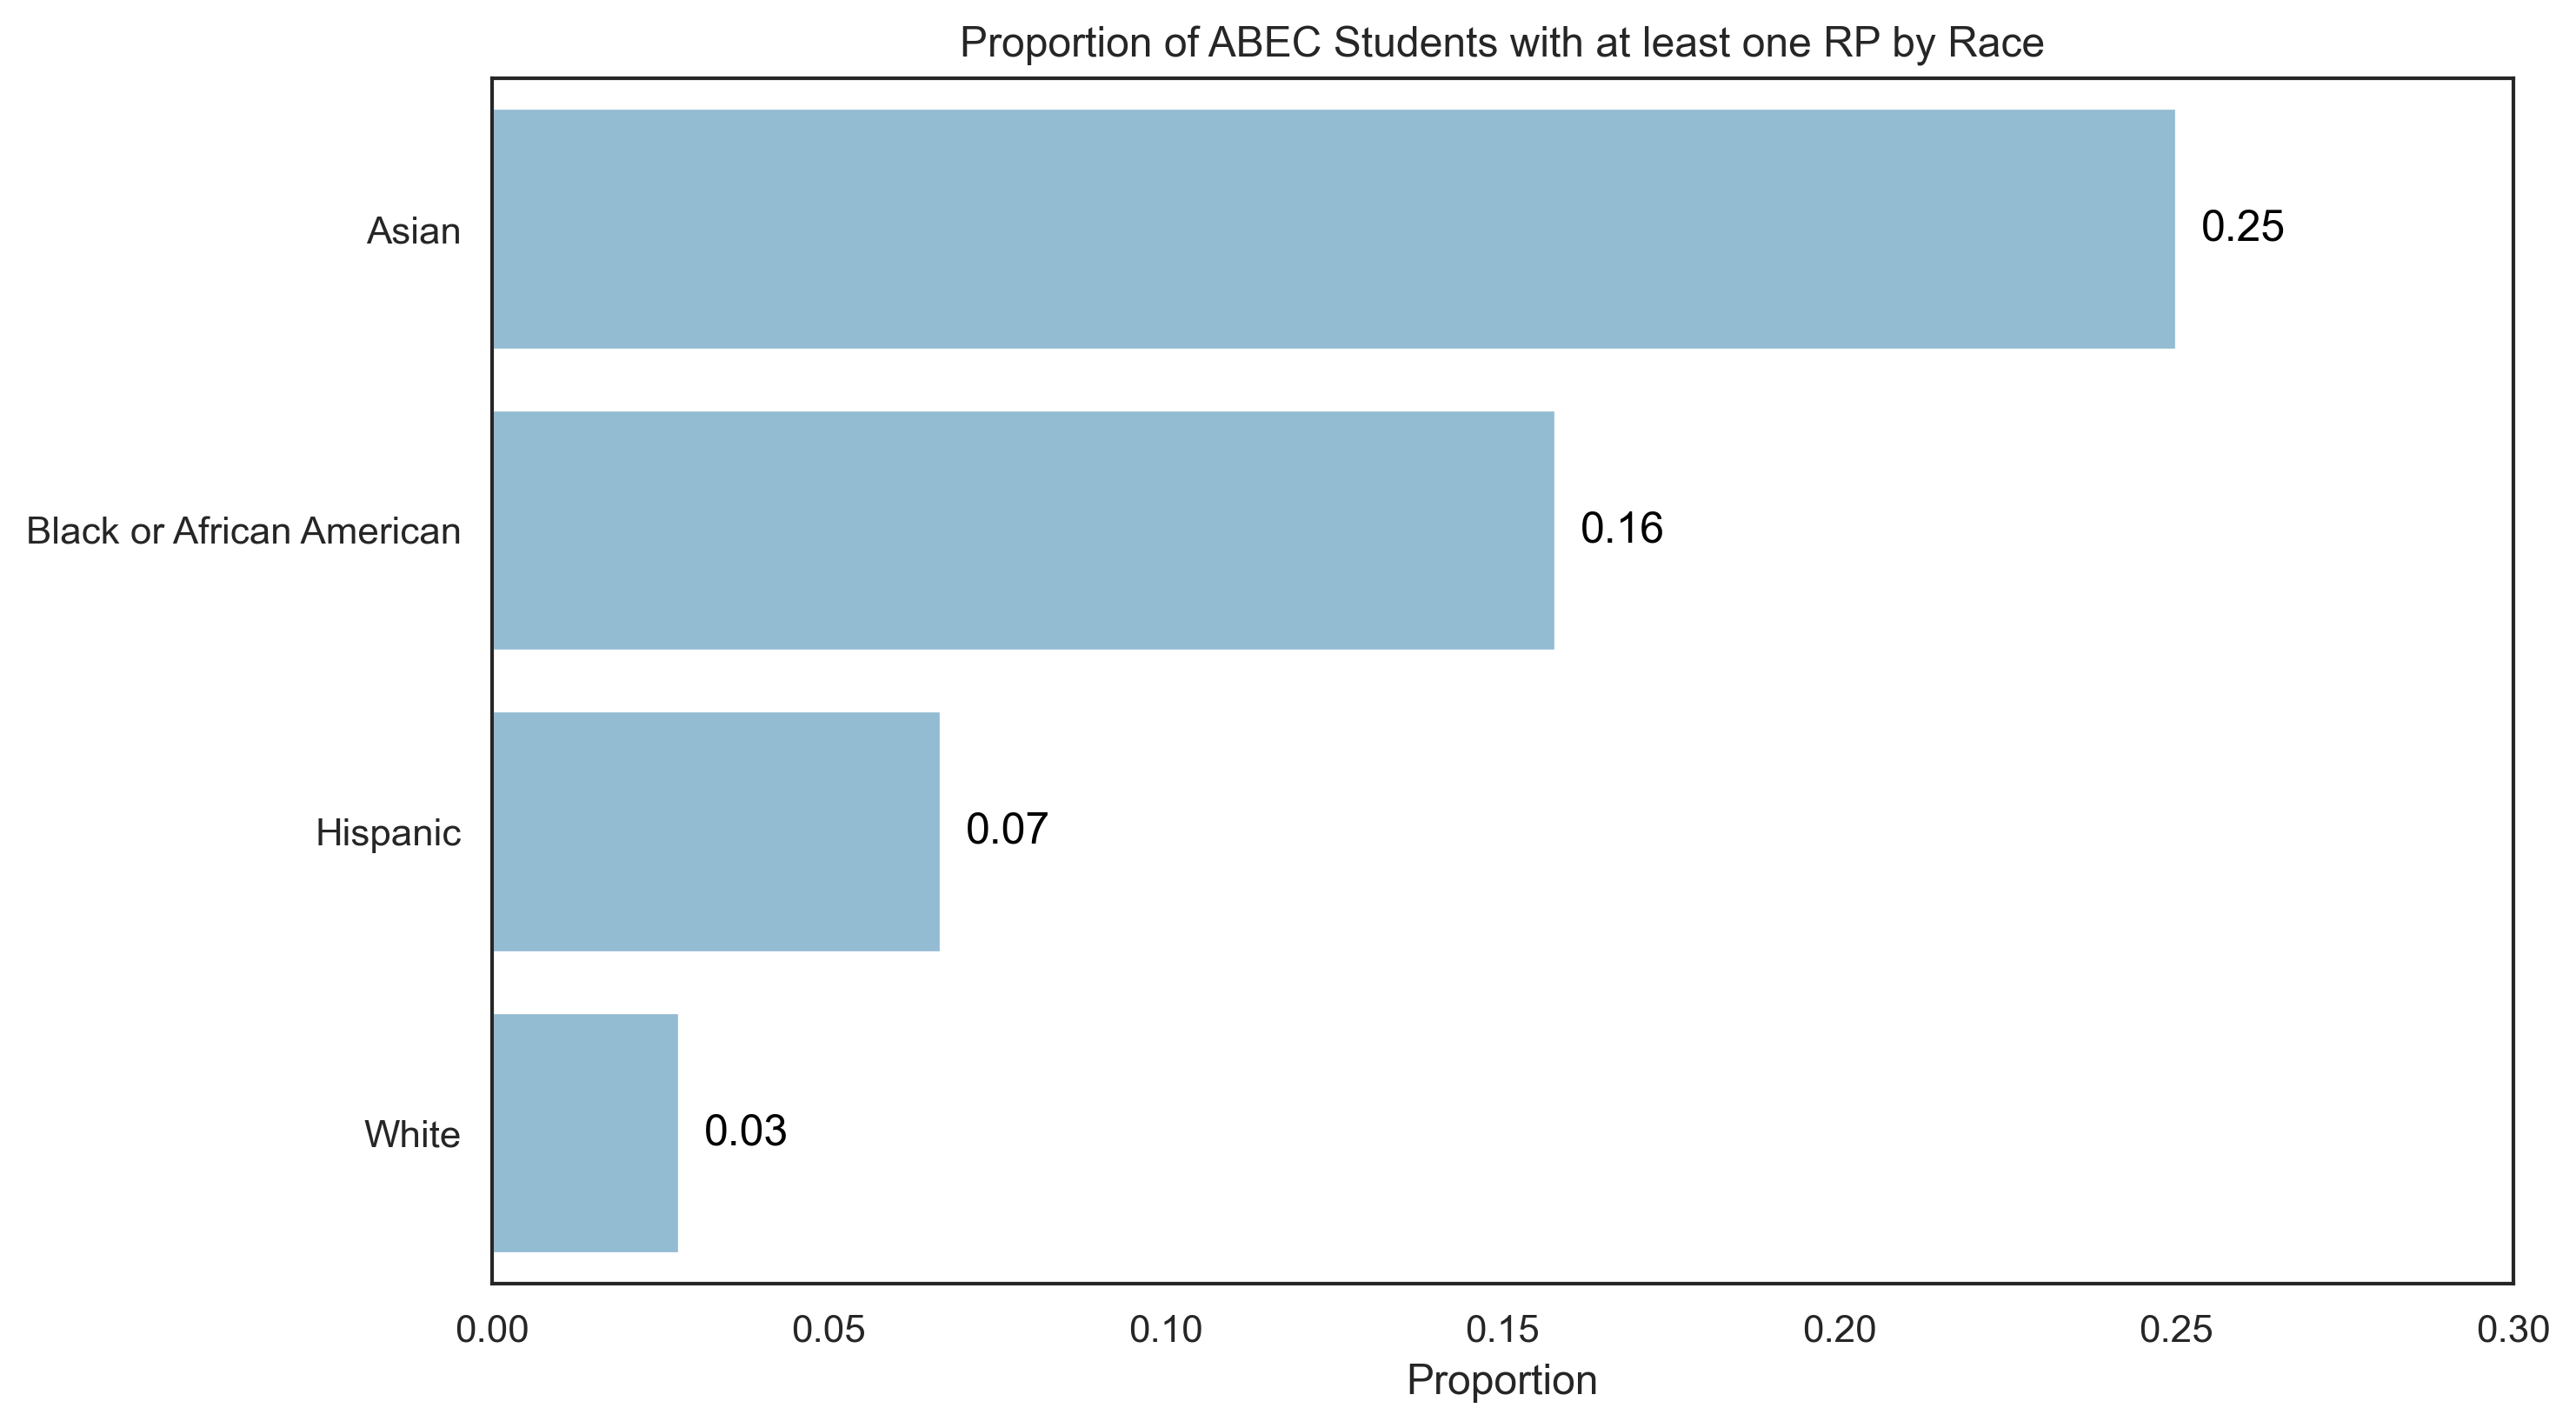

In [82]:
fig = plt.figure(figsize=(10,6))

df_to_plot=abec_rp_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .01 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of ABEC Students with at least one RP by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/abec_rp_by_race', bbox_inches='tight')
plt.show()

In [83]:
abec_race=abec_df['Student Race'].value_counts().sort_index().to_frame()
abec_race

,count
Student Race,
American Indian or Alaska Native,3
Asian,4
Black or African American,57
Hispanic,15
Two or More,9
White,36


In [84]:
abec_race.to_clipboard()

## SECA

In [85]:
seca_df=combined_df[combined_df['School']=='SECA']
seca_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 67 to 875
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 63 non-null     object 
 1   Student Name                 63 non-null     object 
 2   District287 Id               63 non-null     int64  
 3   Grade                        63 non-null     object 
 4   Student Race                 63 non-null     object 
 5   Student Gender               63 non-null     object 
 6   Student Age                  63 non-null     object 
 7   Language Spoken In the Home  63 non-null     object 
 8   Original Enter Date          63 non-null     object 
 9   District Of Residence        63 non-null     object 
 10  Staff Name                   63 non-null     object 
 11  Classroom Enter Date         63 non-null     object 
 12  Classroom Leave Date         6 non-null      object 
 13  Employee Number          

In [86]:
# Count of students with referrals by grade
seca_referrals_by_grade=seca_df.groupby('Grade')['Referral'].value_counts(normalize=True).to_frame().reset_index()
seca_referrals_by_grade=seca_referrals_by_grade[seca_referrals_by_grade['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
seca_referrals_by_grade

,Grade,Referral,Proportion
1,10,Yes,0.909091
3,11,Yes,0.705882
5,12,Yes,0.611111
8,14,Yes,0.400000


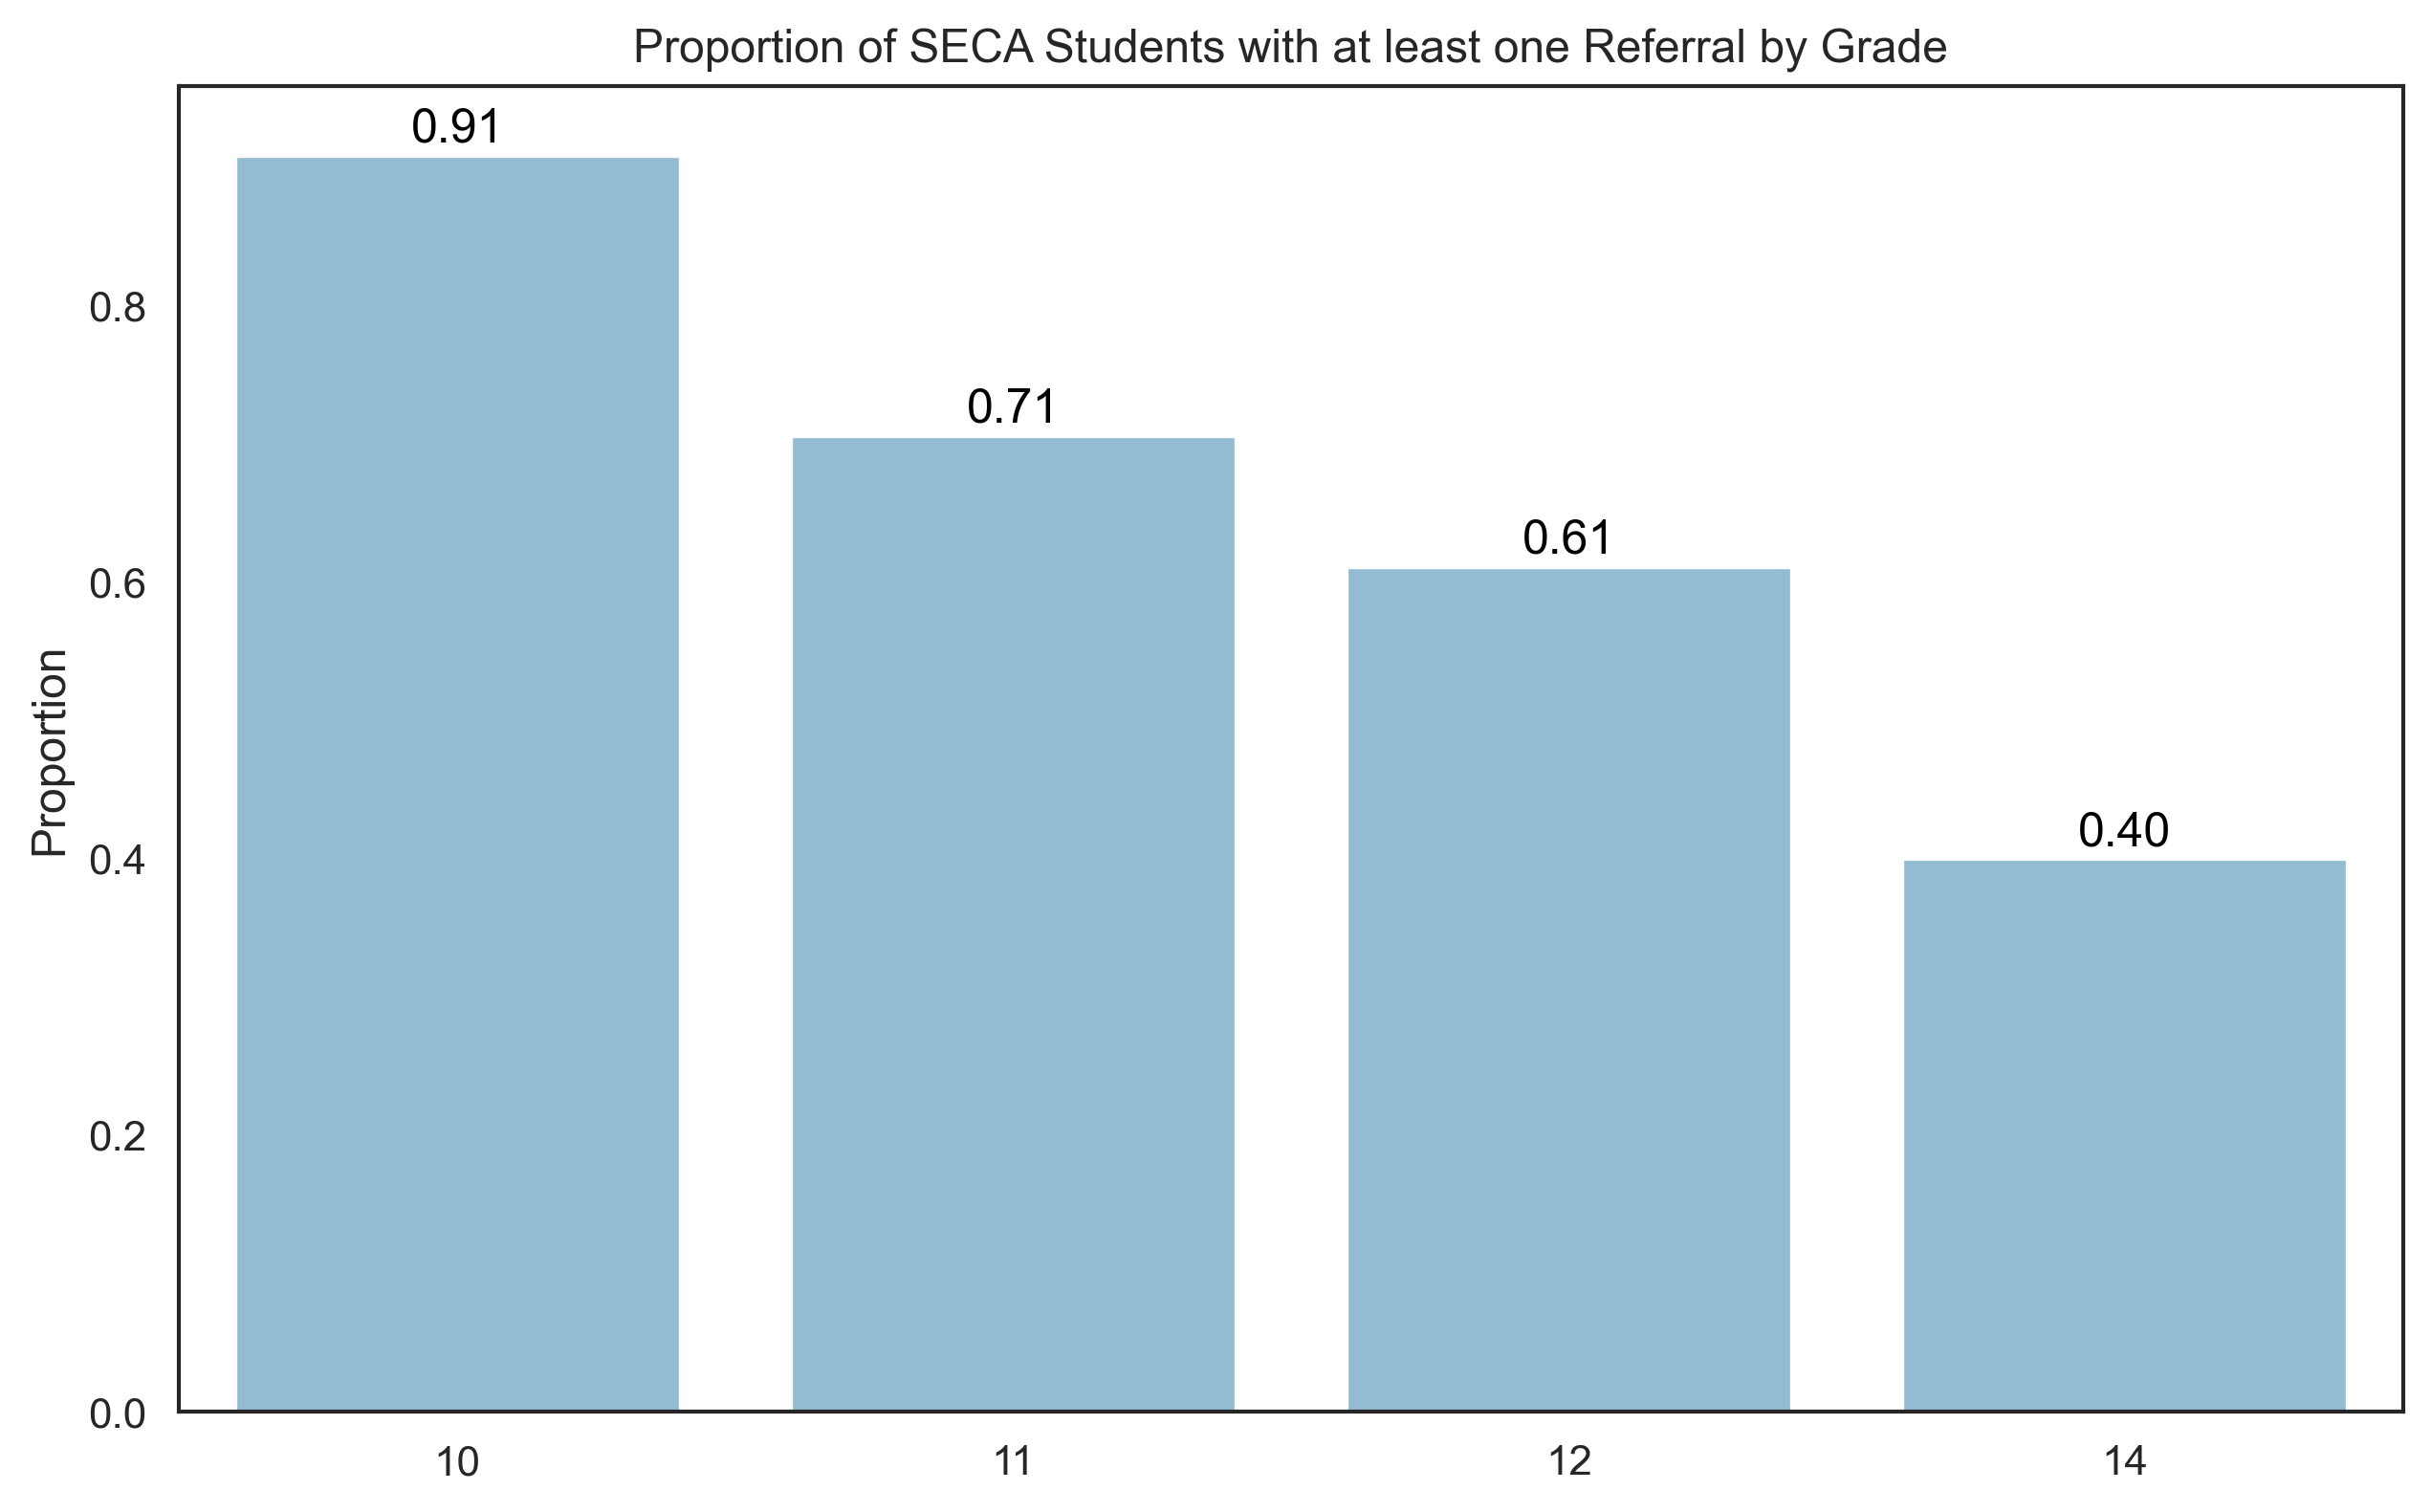

In [87]:
fig = plt.figure(figsize=(10,6))

df_to_plot=seca_referrals_by_grade

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of SECA Students with at least one Referral by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/seca_referrals_by_grade', bbox_inches='tight')
plt.show()

In [88]:
seca_grade=seca_df['Grade'].value_counts().sort_index().to_frame()
seca_grade

,count
Grade,
09,2
10,11
11,17
12,18
14,15


In [89]:
seca_grade.to_clipboard()

In [90]:
# Count of students with RPs by race
seca_referrals_by_race=seca_df.groupby('Student Race')['Referral'].value_counts(normalize=True).to_frame().reset_index()
seca_referrals_by_race=seca_referrals_by_race[seca_referrals_by_race['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
seca_referrals_by_race

,Student Race,Referral,Proportion
1,American Indian or Alaska Native,Yes,0.500000
3,Black or African American,Yes,0.894737
6,Hispanic,Yes,0.500000
7,Two or More,Yes,0.833333
10,White,Yes,0.333333


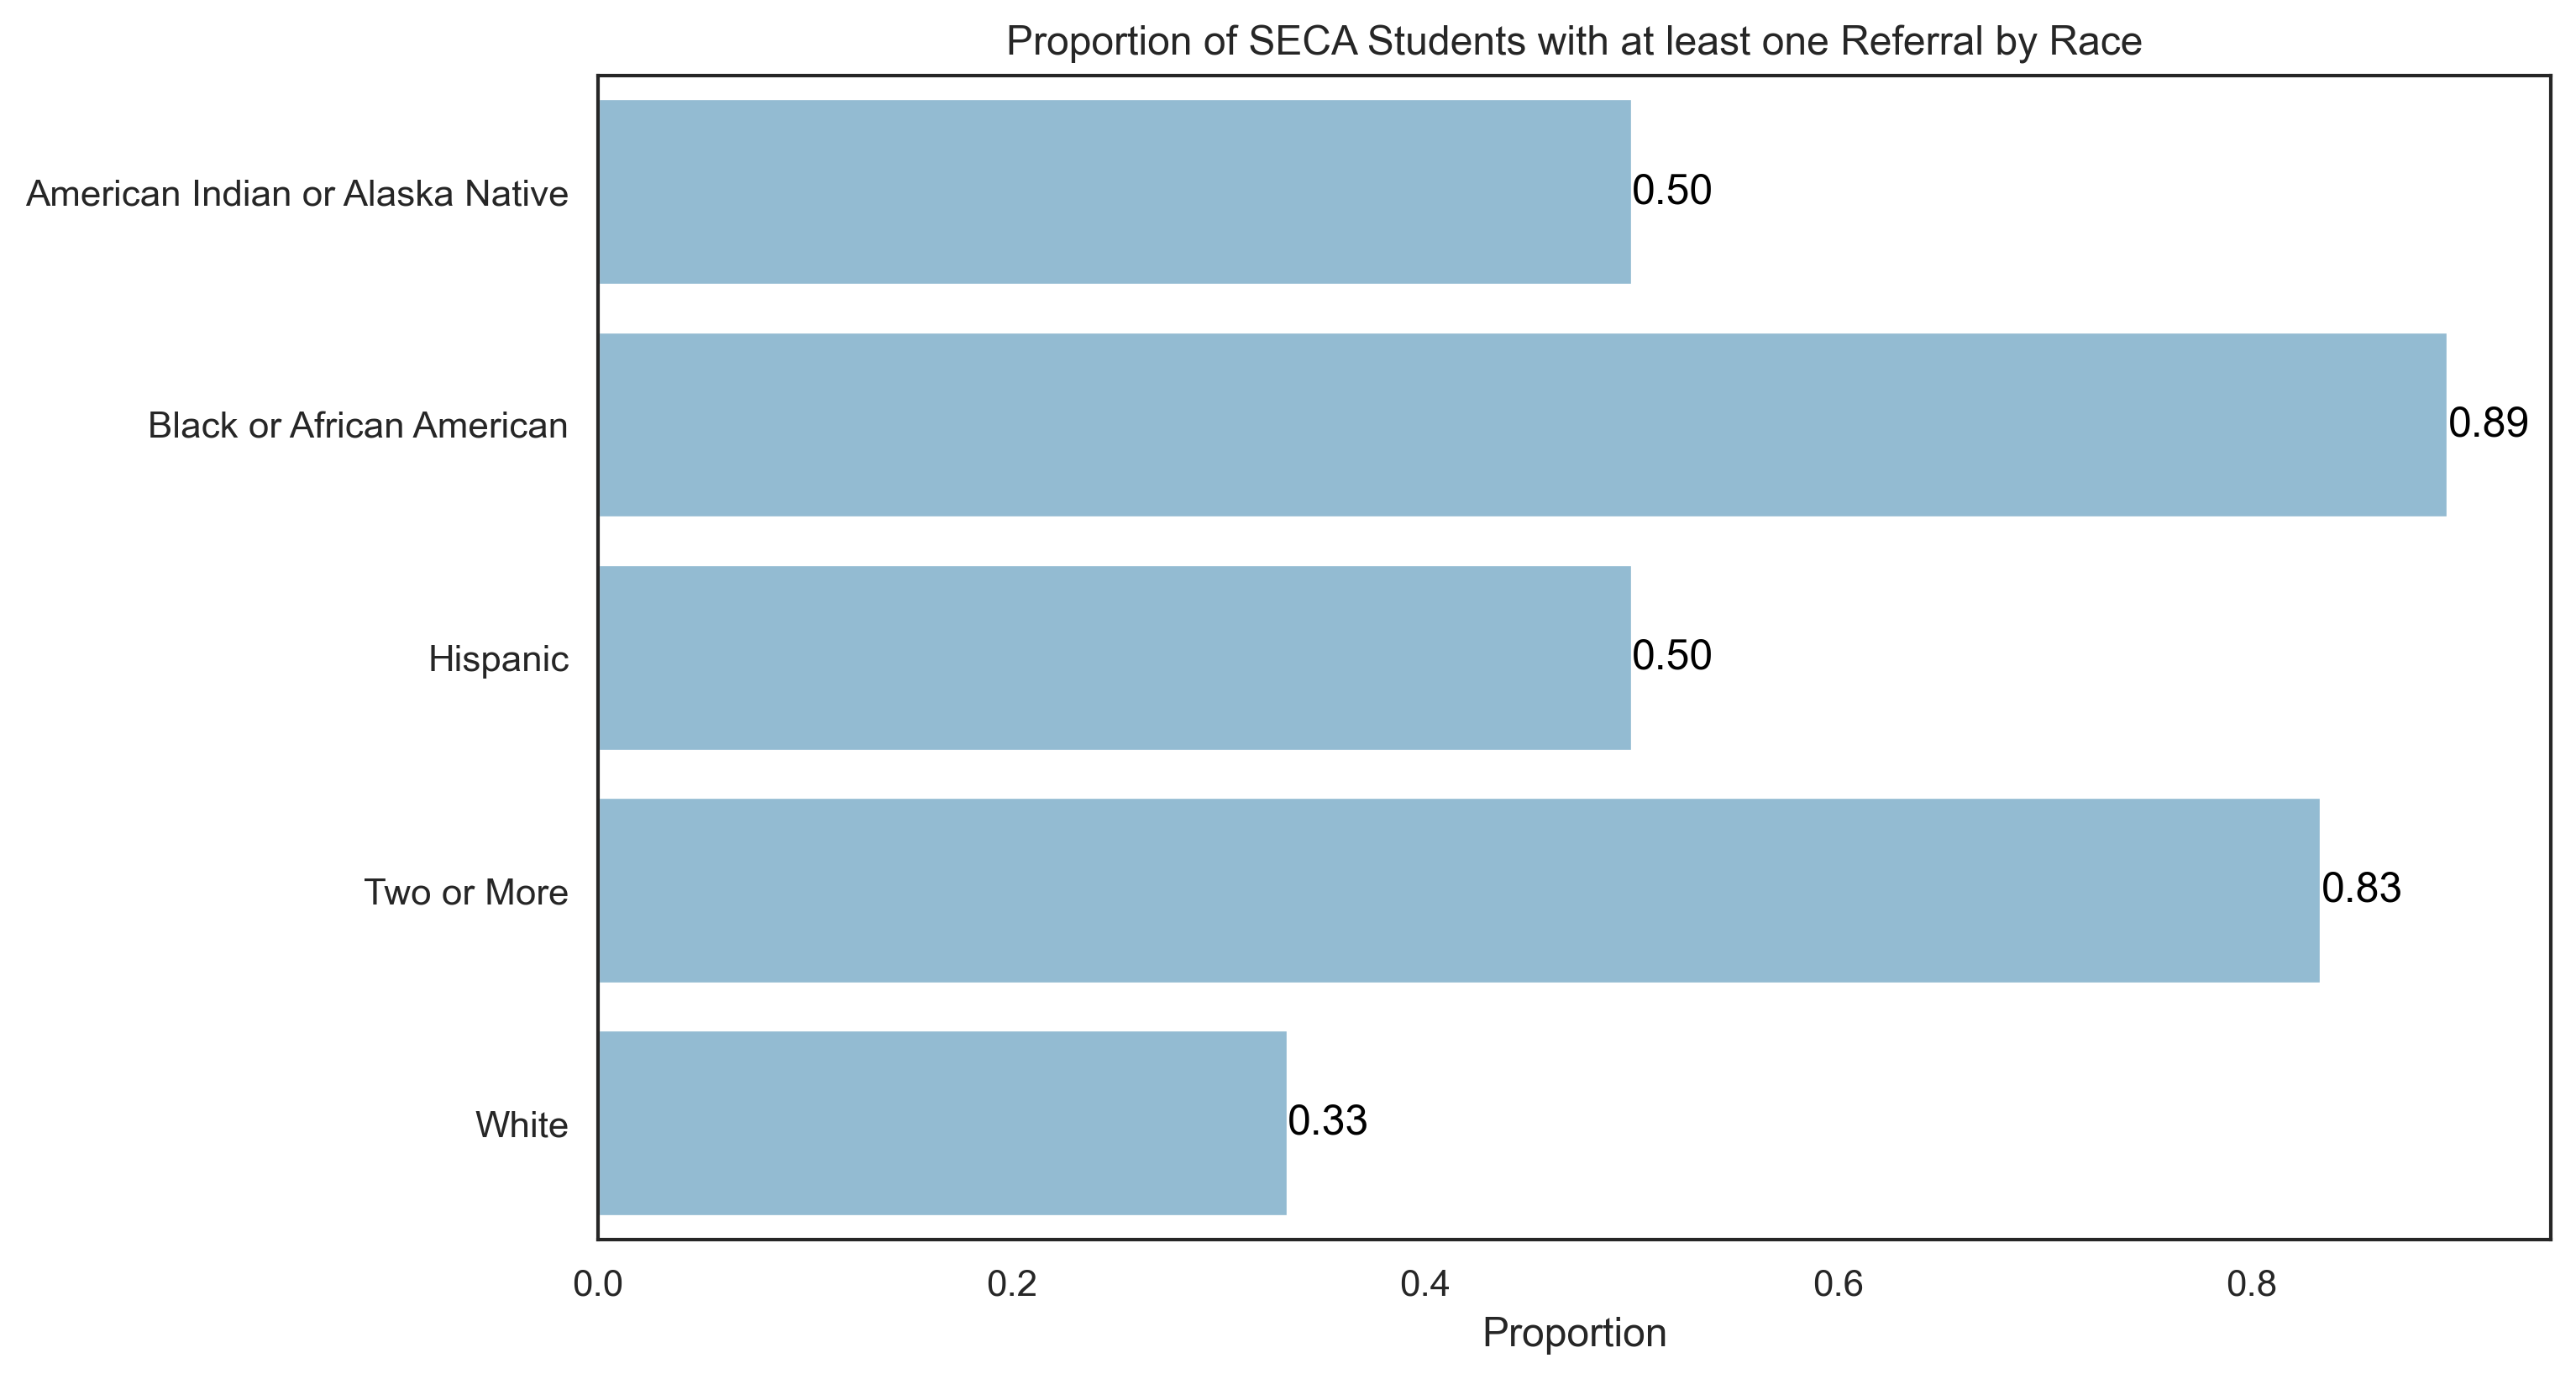

In [91]:
fig = plt.figure(figsize=(10,6))

df_to_plot=seca_referrals_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .02 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of SECA Students with at least one Referral by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/seca_referrals_by_race', bbox_inches='tight')
plt.show()

In [92]:
seca_race=seca_df['Student Race'].value_counts().sort_index().to_frame()
seca_race

,count
Student Race,
American Indian or Alaska Native,2
Asian,1
Black or African American,19
Hispanic,26
Two or More,6
White,9


In [93]:
seca_race.to_clipboard()

## WALT

In [94]:
walt_df=combined_df[combined_df['School']=='W-ALT']
walt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 22 to 867
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 115 non-null    object 
 1   Student Name                 115 non-null    object 
 2   District287 Id               115 non-null    int64  
 3   Grade                        115 non-null    object 
 4   Student Race                 115 non-null    object 
 5   Student Gender               115 non-null    object 
 6   Student Age                  115 non-null    object 
 7   Language Spoken In the Home  115 non-null    object 
 8   Original Enter Date          115 non-null    object 
 9   District Of Residence        115 non-null    object 
 10  Staff Name                   115 non-null    object 
 11  Classroom Enter Date         115 non-null    object 
 12  Classroom Leave Date         21 non-null     object 
 13  Employee Number         

In [95]:
# Count of students with referrals by grade
walt_referrals_by_grade=walt_df.groupby('Grade')['Referral'].value_counts(normalize=True).to_frame().reset_index()
walt_referrals_by_grade=walt_referrals_by_grade[walt_referrals_by_grade['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
walt_referrals_by_grade

,Grade,Referral,Proportion
1,10,Yes,0.375000
3,11,Yes,0.318182
5,12,Yes,0.200000
7,14,Yes,0.109091


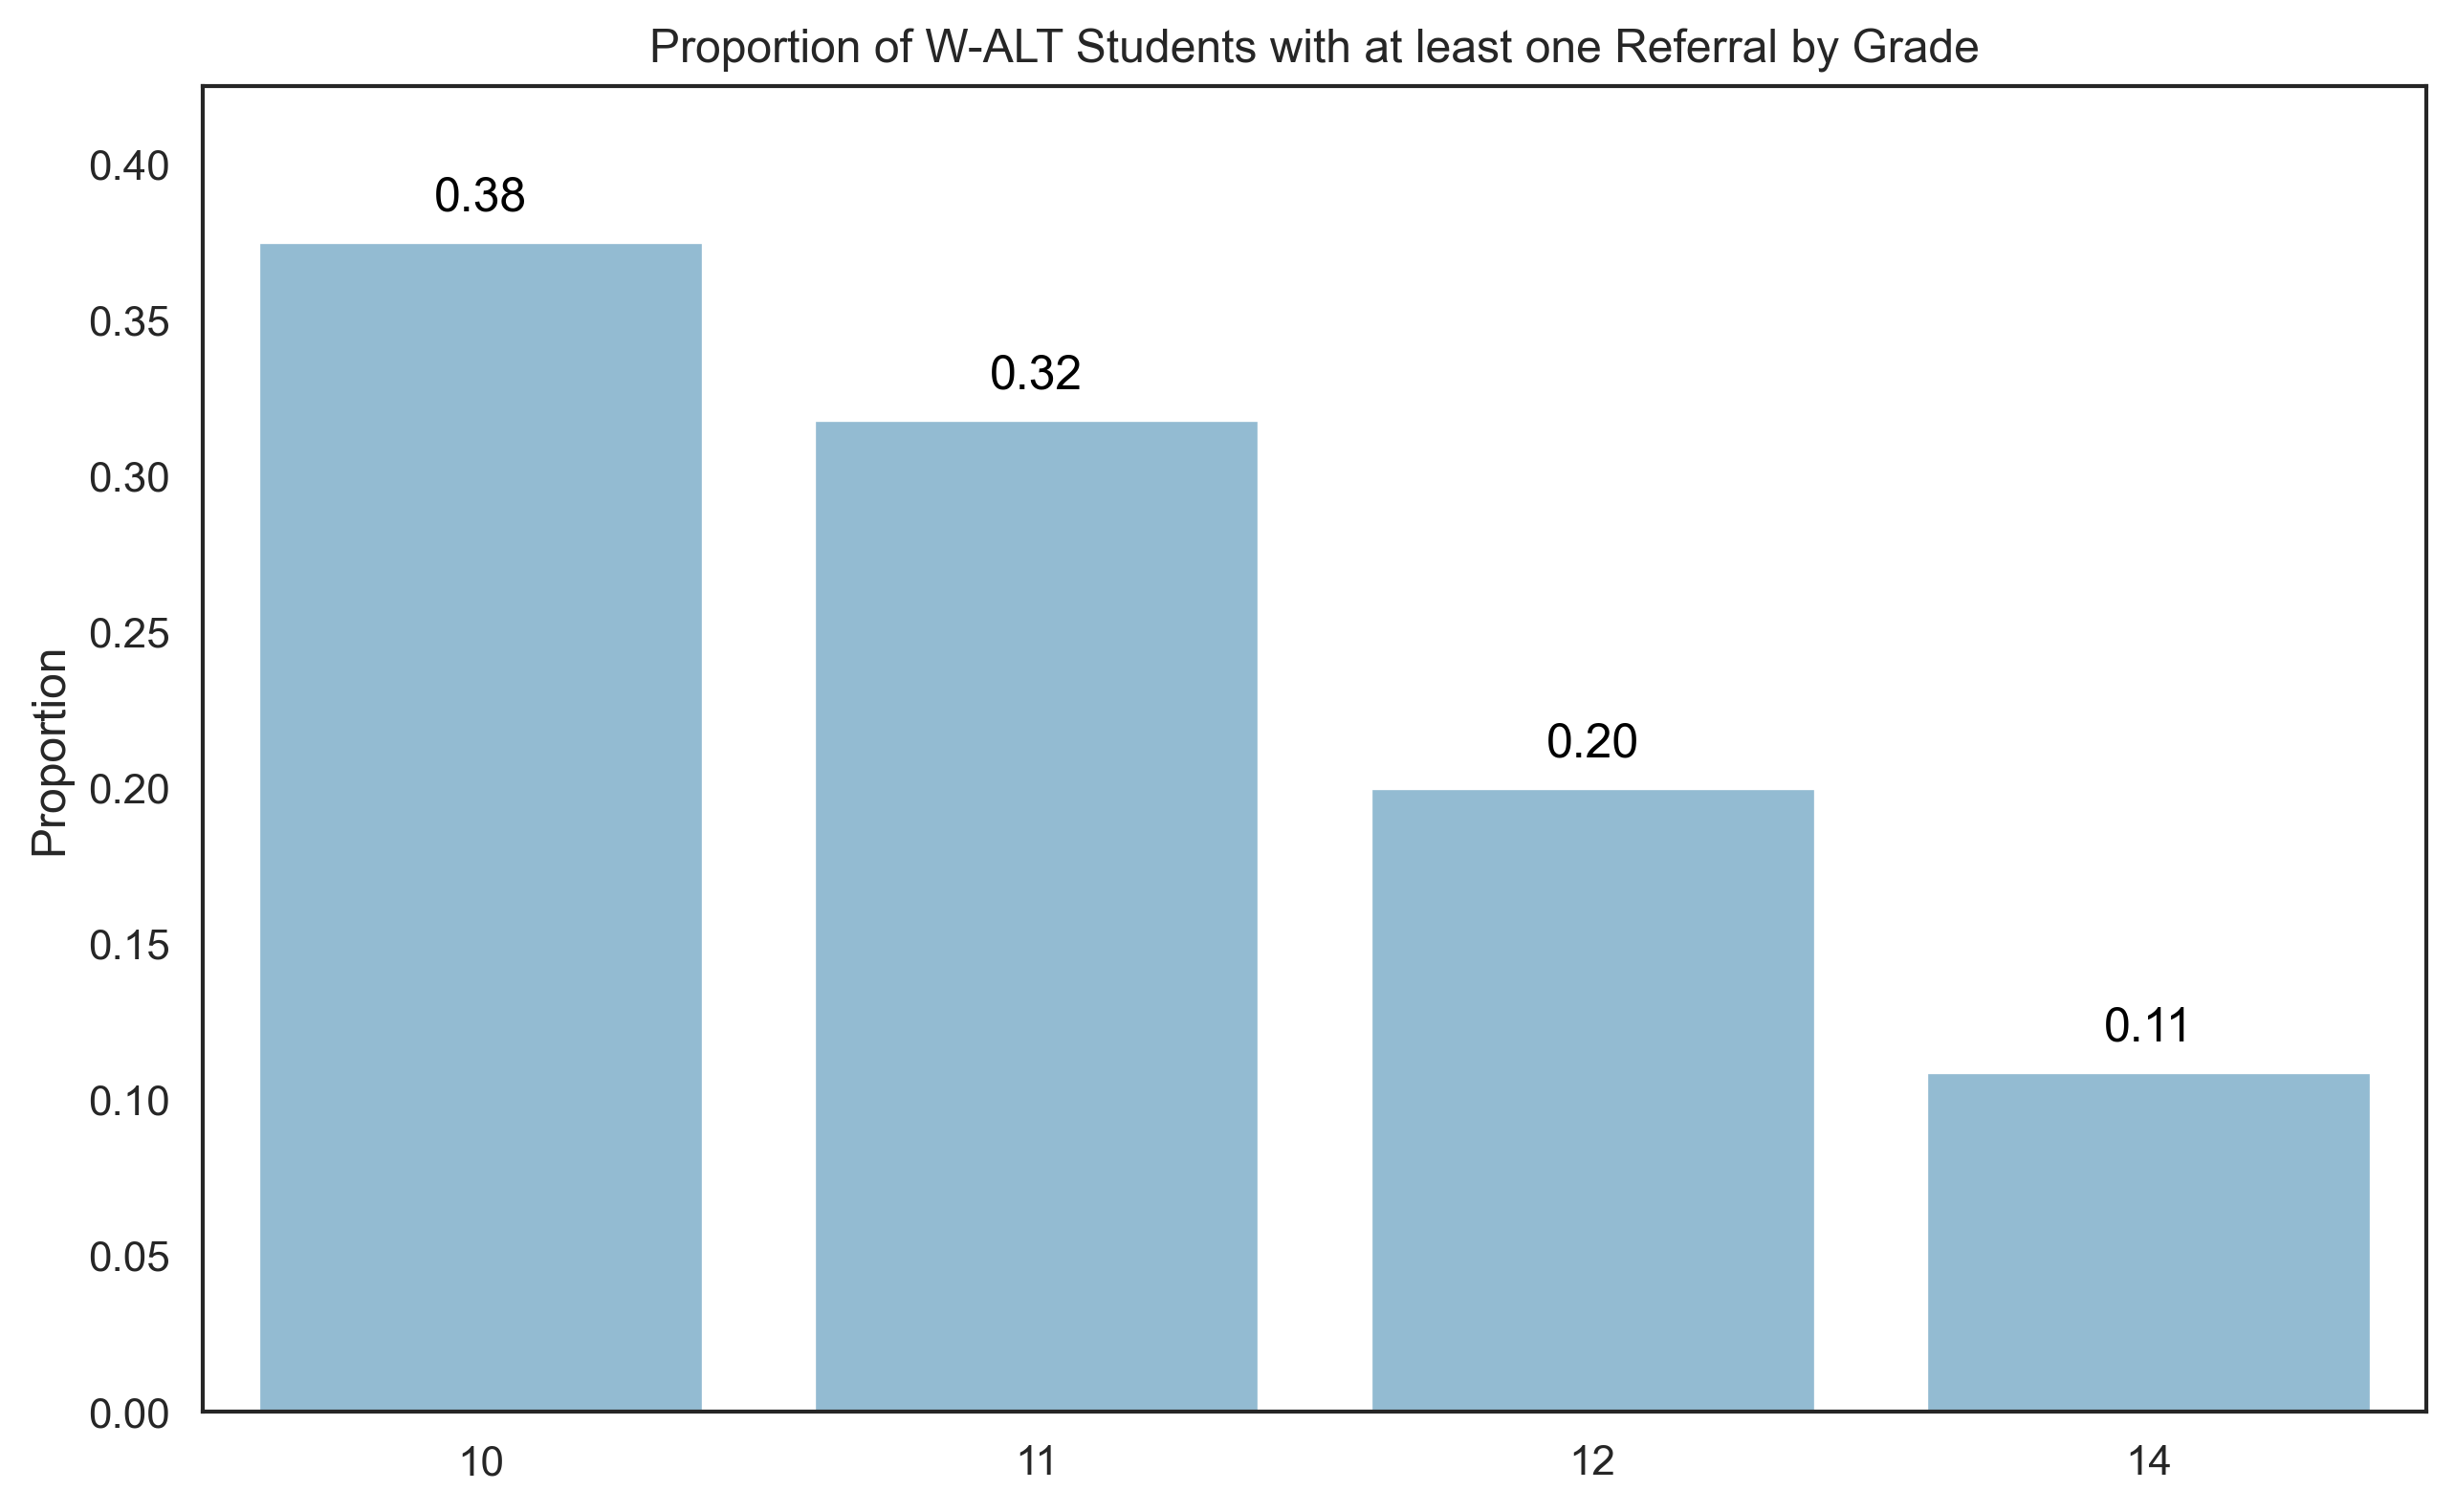

In [96]:
fig = plt.figure(figsize=(10,6))

df_to_plot=walt_referrals_by_grade

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of W-ALT Students with at least one Referral by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/walt_referrals_by_grade', bbox_inches='tight')
plt.show()

In [97]:
walt_grade=walt_df['Grade'].value_counts().sort_index().to_frame()
walt_grade

,count
Grade,
10,8
11,22
12,30
14,55


In [98]:
walt_grade.to_clipboard()

In [99]:
# Count of students with RPs by race
walt_referrals_by_race=walt_df.groupby('Student Race')['Referral'].value_counts(normalize=True).to_frame().reset_index()
walt_referrals_by_race=walt_referrals_by_race[walt_referrals_by_race['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
walt_referrals_by_race

,Student Race,Referral,Proportion
3,Black or African American,Yes,0.196078
5,Hispanic,Yes,0.111111
7,Two or More,Yes,0.333333
9,White,Yes,0.190476


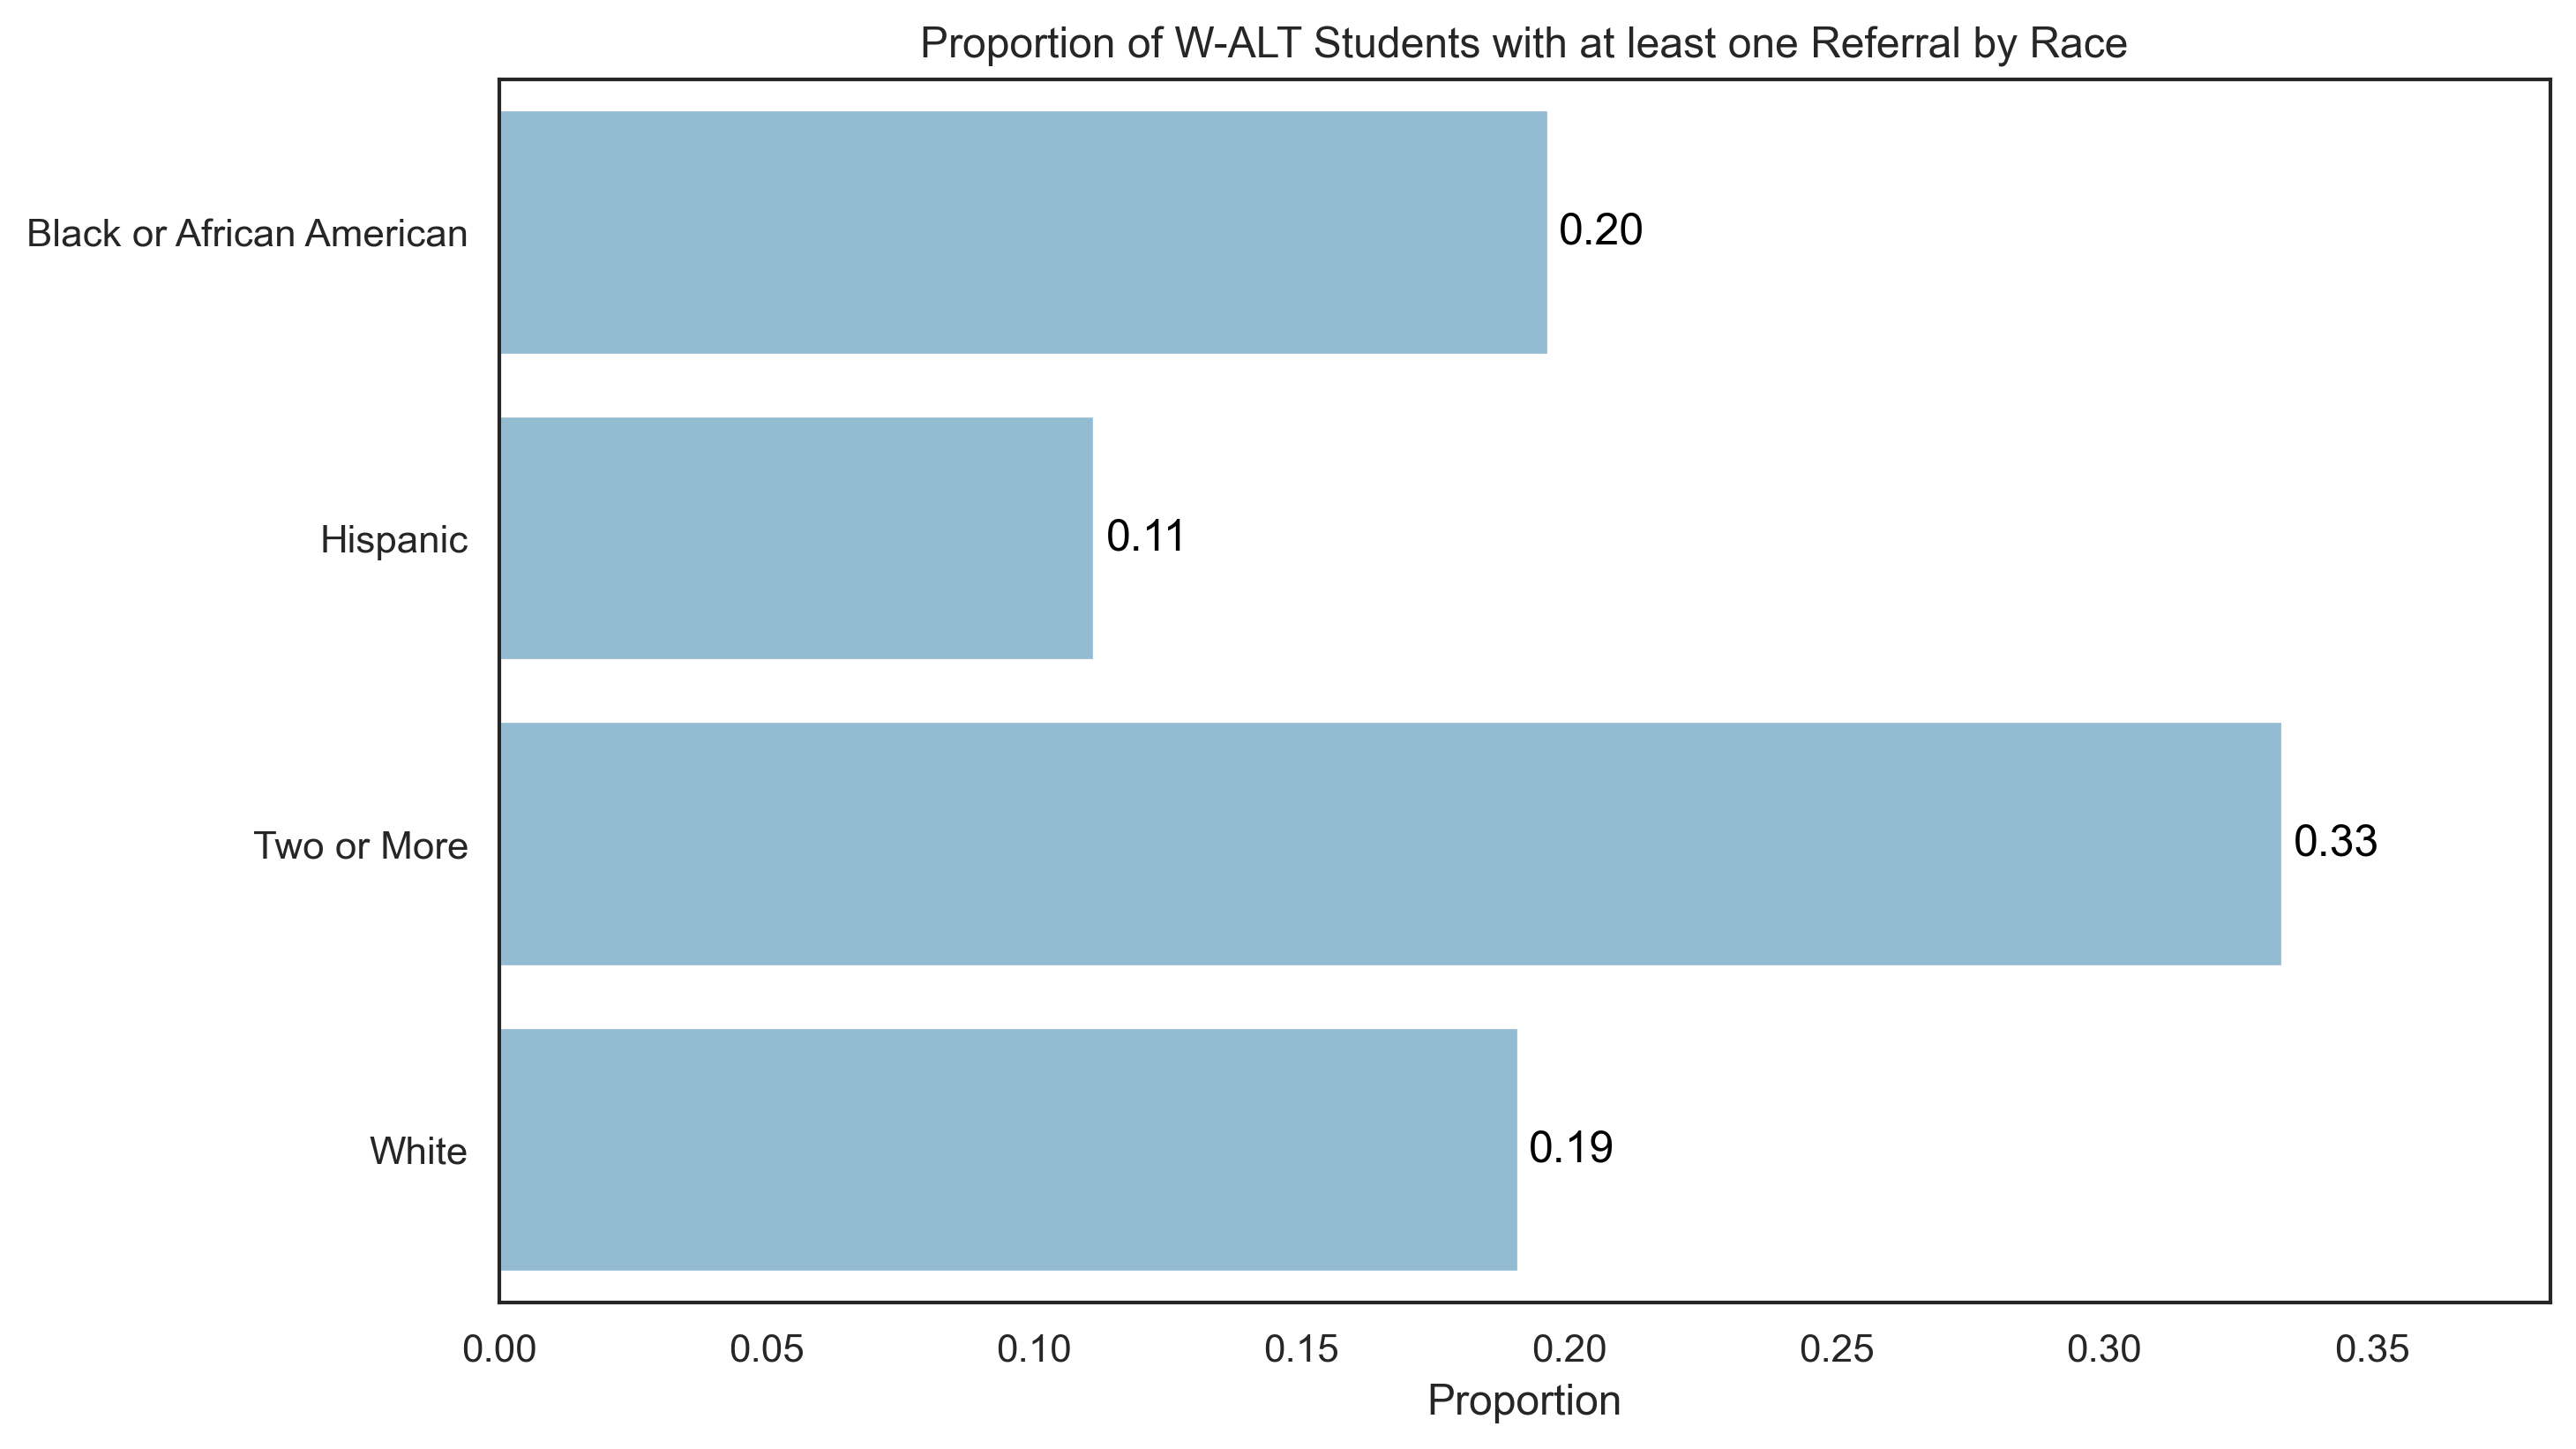

In [100]:
fig = plt.figure(figsize=(10,6))

df_to_plot=walt_referrals_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .01 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of W-ALT Students with at least one Referral by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/walt_referrals_by_race', bbox_inches='tight')
plt.show()

In [101]:
walt_race=walt_df['Student Race'].value_counts().sort_index().to_frame()
walt_race

,count
Student Race,
American Indian or Alaska Native,2
Asian,5
Black or African American,51
Hispanic,18
Two or More,18
White,21


In [102]:
walt_race.to_clipboard()

## NECA

In [103]:
neca_df=combined_df[combined_df['School']=='NECA']
neca_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 93 to 852
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 48 non-null     object 
 1   Student Name                 48 non-null     object 
 2   District287 Id               48 non-null     int64  
 3   Grade                        48 non-null     object 
 4   Student Race                 48 non-null     object 
 5   Student Gender               48 non-null     object 
 6   Student Age                  48 non-null     object 
 7   Language Spoken In the Home  48 non-null     object 
 8   Original Enter Date          48 non-null     object 
 9   District Of Residence        48 non-null     object 
 10  Staff Name                   48 non-null     object 
 11  Classroom Enter Date         48 non-null     object 
 12  Classroom Leave Date         9 non-null      object 
 13  Employee Number          

In [104]:
# Count of students with referrals by grade
neca_referrals_by_grade=neca_df.groupby('Grade')['Referral'].value_counts(normalize=True).to_frame().reset_index()
neca_referrals_by_grade=neca_referrals_by_grade[neca_referrals_by_grade['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
neca_referrals_by_grade

,Grade,Referral,Proportion
1,10,Yes,0.500000
3,11,Yes,0.384615
5,12,Yes,0.052632


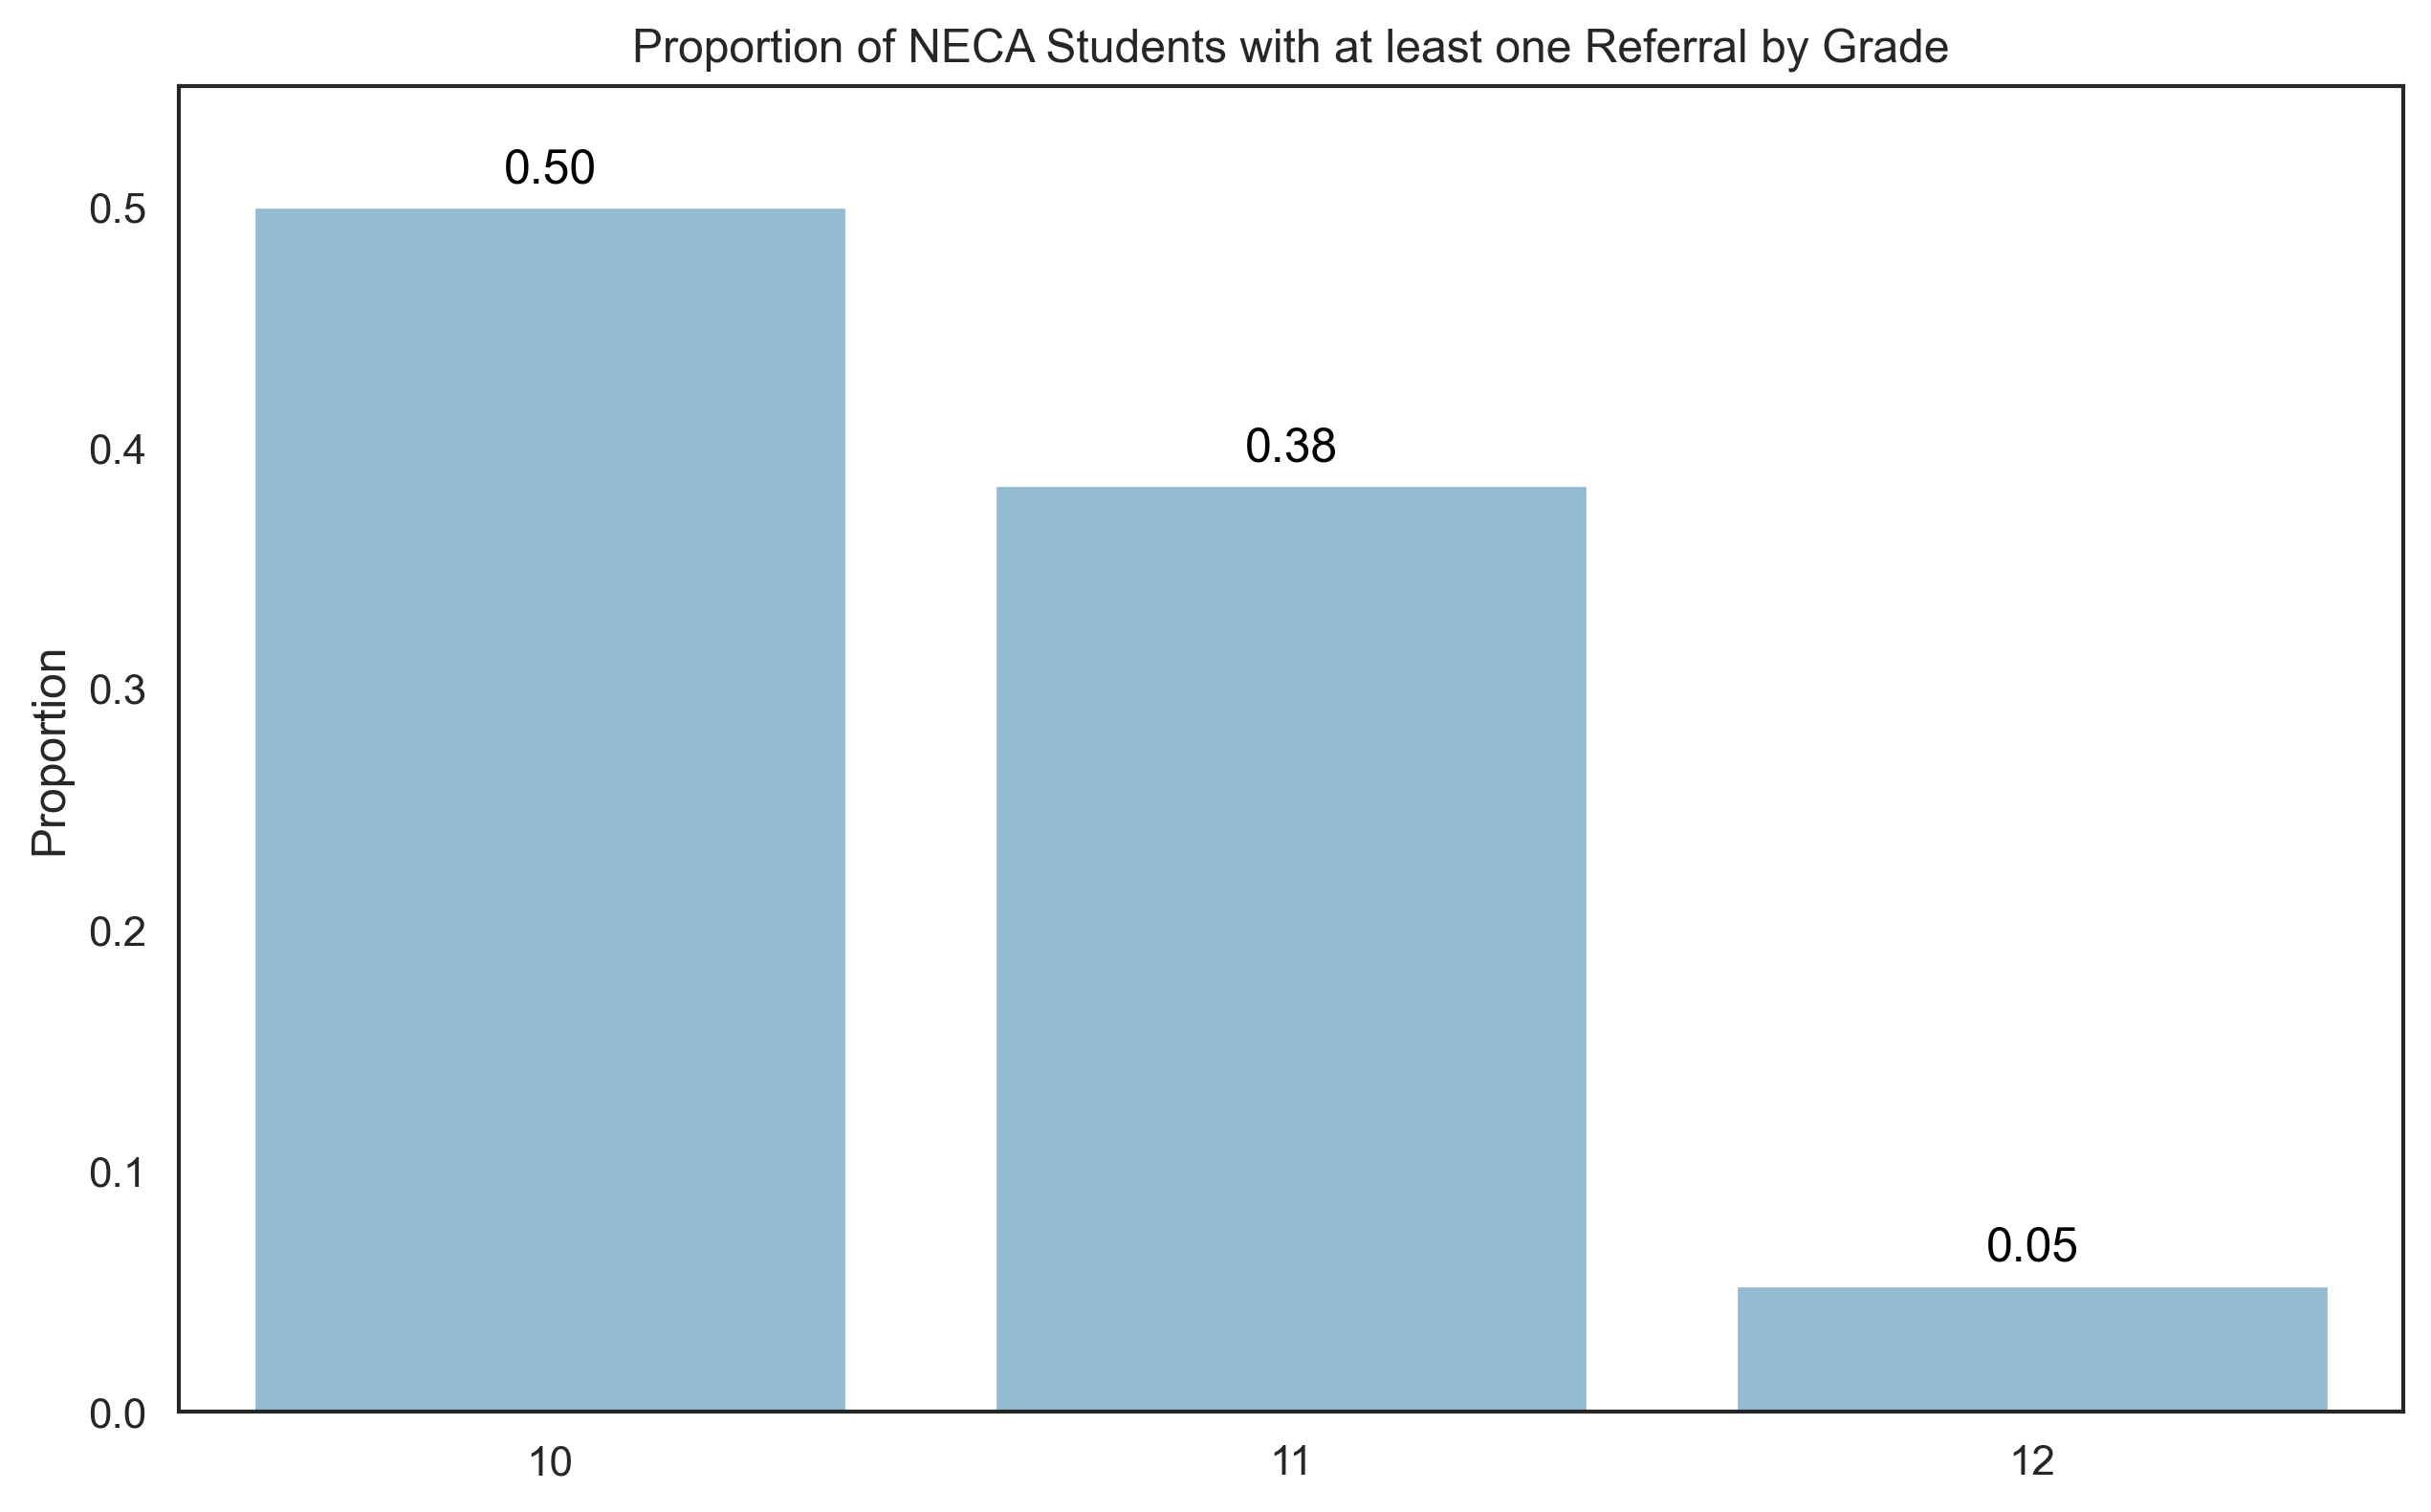

In [105]:
fig = plt.figure(figsize=(10,6))

df_to_plot=neca_referrals_by_grade

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of NECA Students with at least one Referral by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/neca_referrals_by_grade', bbox_inches='tight')
plt.show()

In [106]:
neca_grade=neca_df['Grade'].value_counts().sort_index().to_frame()
neca_grade

,count
Grade,
10,6
11,13
12,19
14,10


In [107]:
neca_grade.to_clipboard()

In [108]:
# Count of students with Referrals by race
neca_referrals_by_race=neca_df.groupby('Student Race')['Referral'].value_counts(normalize=True).to_frame().reset_index()
neca_referrals_by_race=neca_referrals_by_race[neca_referrals_by_race['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
neca_referrals_by_race

,Student Race,Referral,Proportion
1,American Indian or Alaska Native,Yes,0.500000
4,Black or African American,Yes,0.241379
8,White,Yes,0.125000


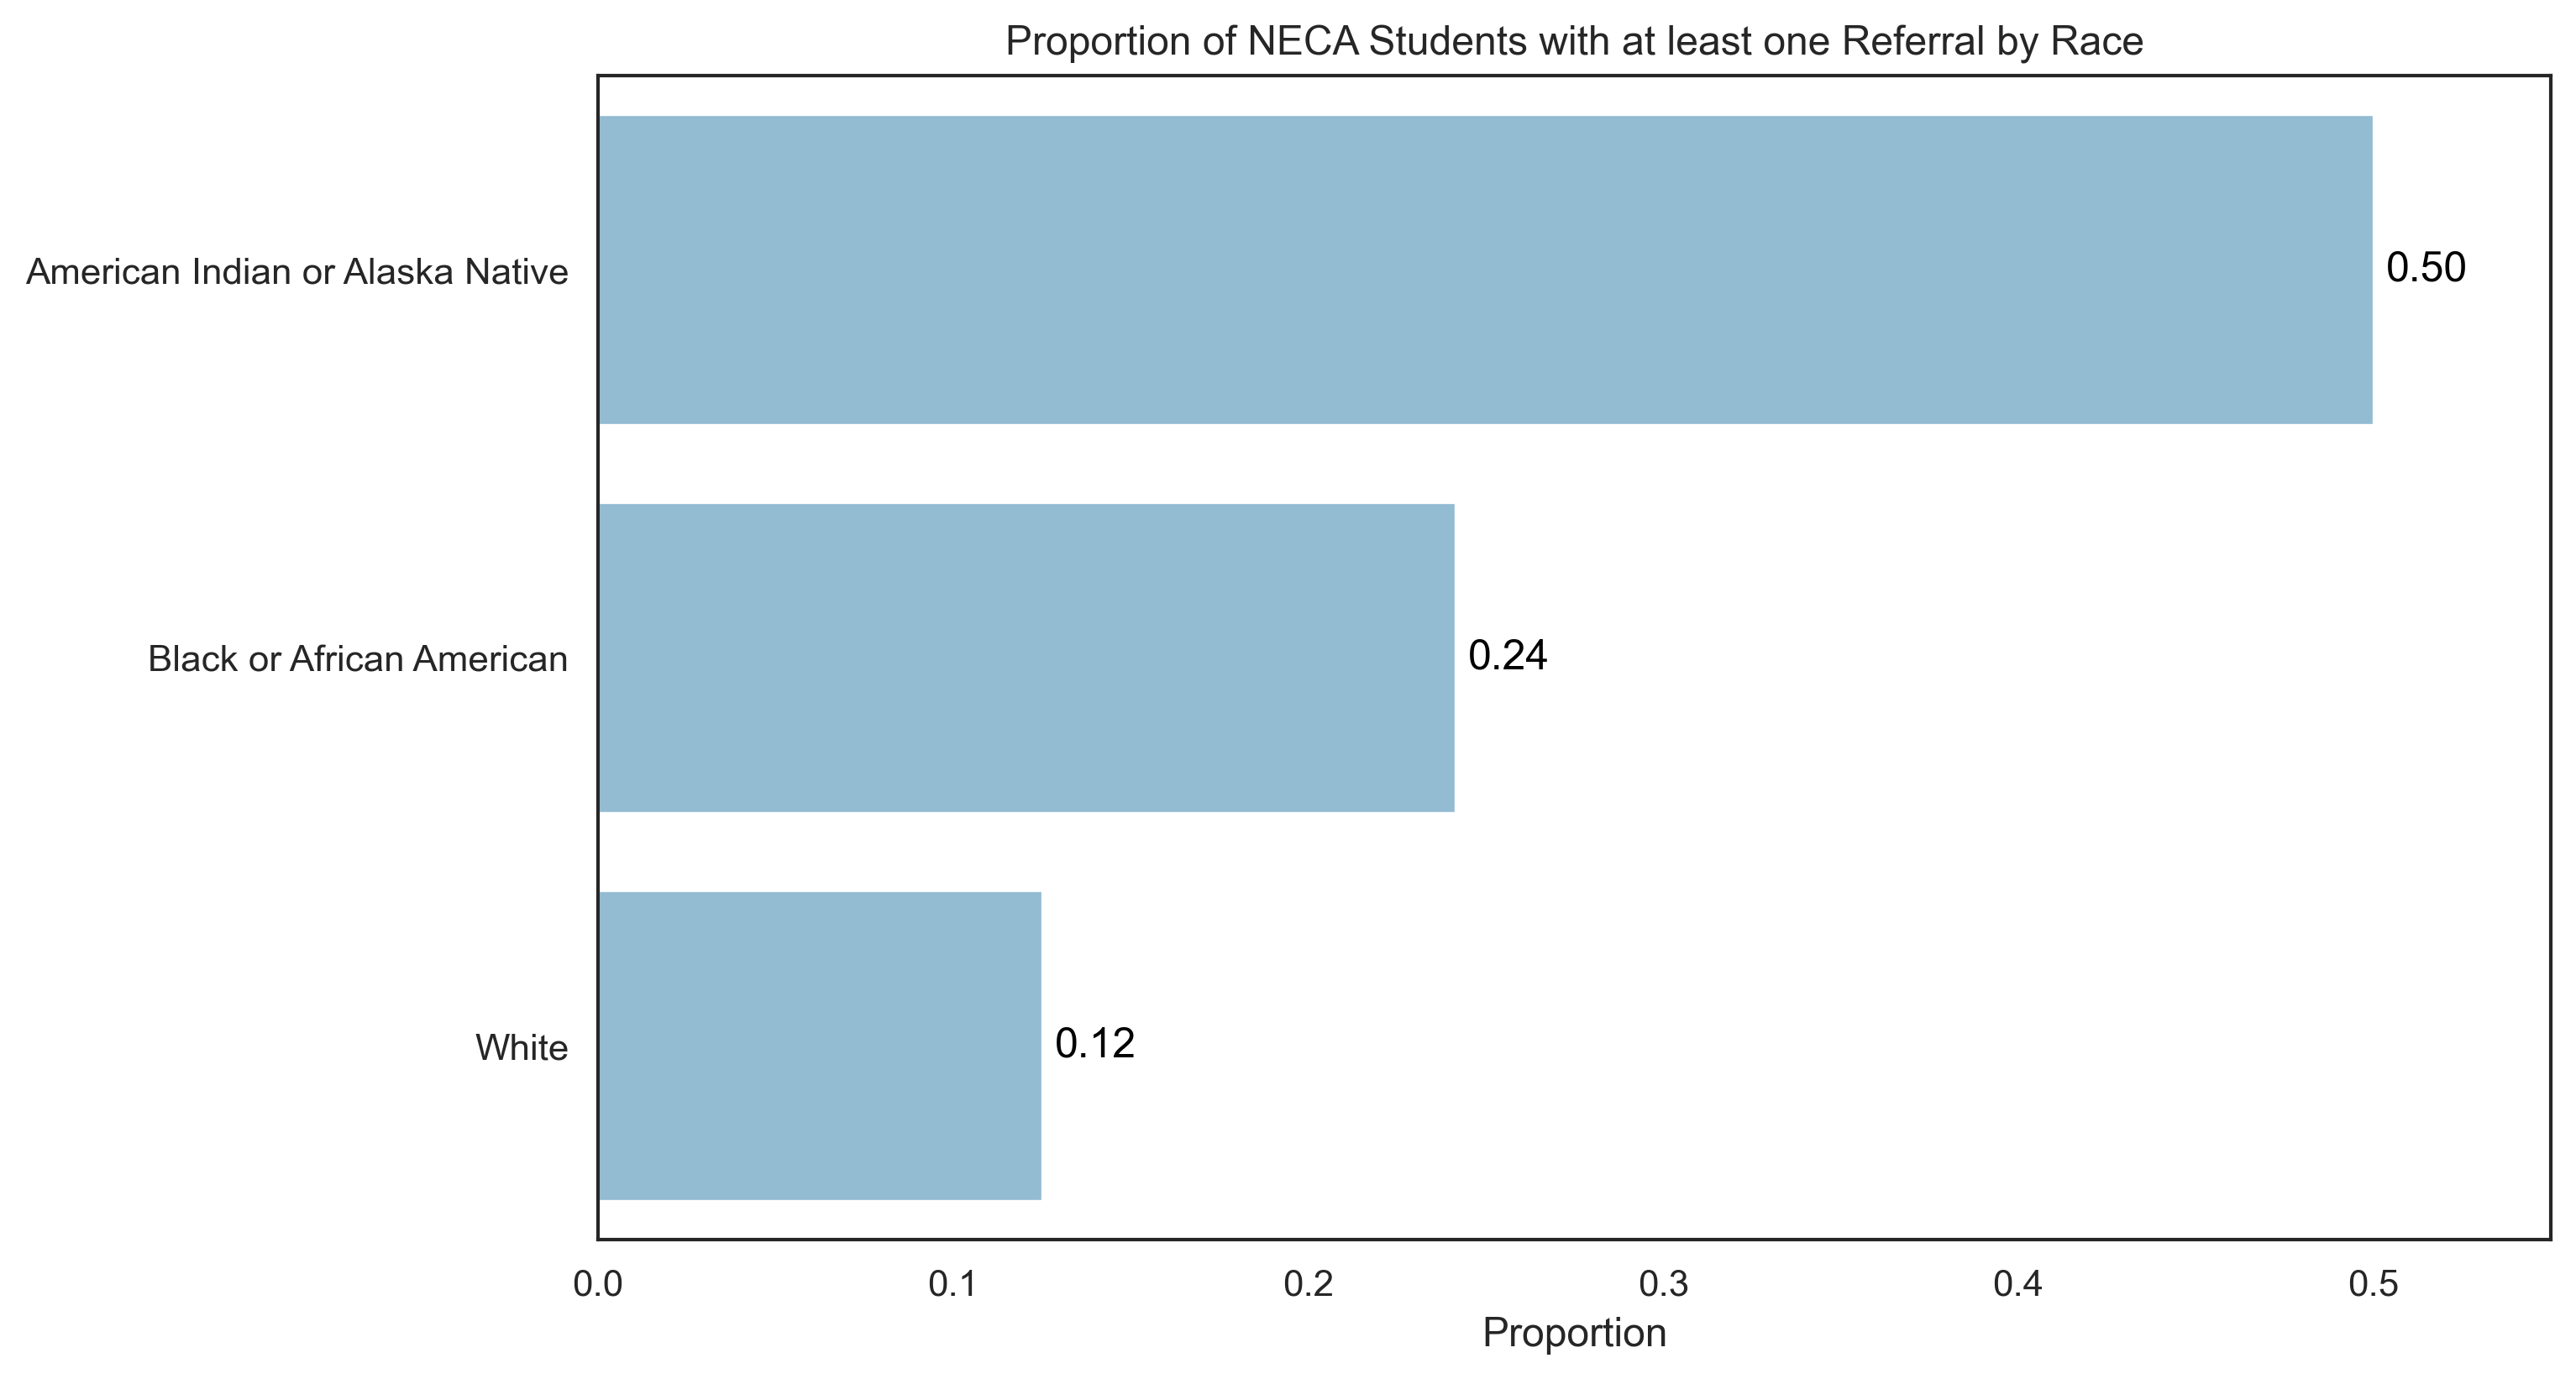

In [109]:
fig = plt.figure(figsize=(10,6))

df_to_plot=neca_referrals_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .015 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of NECA Students with at least one Referral by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/neca_referrals_by_race', bbox_inches='tight')
plt.show()

In [110]:
neca_race=neca_df['Student Race'].value_counts().sort_index().to_frame()
neca_race

,count
Student Race,
American Indian or Alaska Native,2
Asian,1
Black or African American,29
Hispanic,4
Two or More,4
White,8


In [111]:
neca_race.to_clipboard()

In [112]:
combined_df['School'].value_counts()

School
NEC SPED    192
SEC SPED    157
ABEC        124
CTC         120
W-ALT       115
SECA         63
WEC SPED     57
NECA         48
Name: count, dtype: int64

## CTC

In [113]:
ctc_df=combined_df[combined_df['School']=='CTC']
ctc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2 to 874
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Site/Program                 120 non-null    object 
 1   Student Name                 120 non-null    object 
 2   District287 Id               120 non-null    int64  
 3   Grade                        120 non-null    object 
 4   Student Race                 120 non-null    object 
 5   Student Gender               120 non-null    object 
 6   Student Age                  120 non-null    object 
 7   Language Spoken In the Home  120 non-null    object 
 8   Original Enter Date          120 non-null    object 
 9   District Of Residence        120 non-null    object 
 10  Staff Name                   120 non-null    object 
 11  Classroom Enter Date         120 non-null    object 
 12  Classroom Leave Date         15 non-null     object 
 13  Employee Number          

In [114]:
# Count of students with referrals by grade
ctc_referrals_by_grade=ctc_df.groupby('Grade')['Referral'].value_counts(normalize=True).to_frame().reset_index()
ctc_referrals_by_grade=ctc_referrals_by_grade[ctc_referrals_by_grade['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
ctc_referrals_by_grade

,Grade,Referral,Proportion
1,11,Yes,0.700000
4,12,Yes,0.500000
6,14,Yes,0.263158
8,15,Yes,0.240000


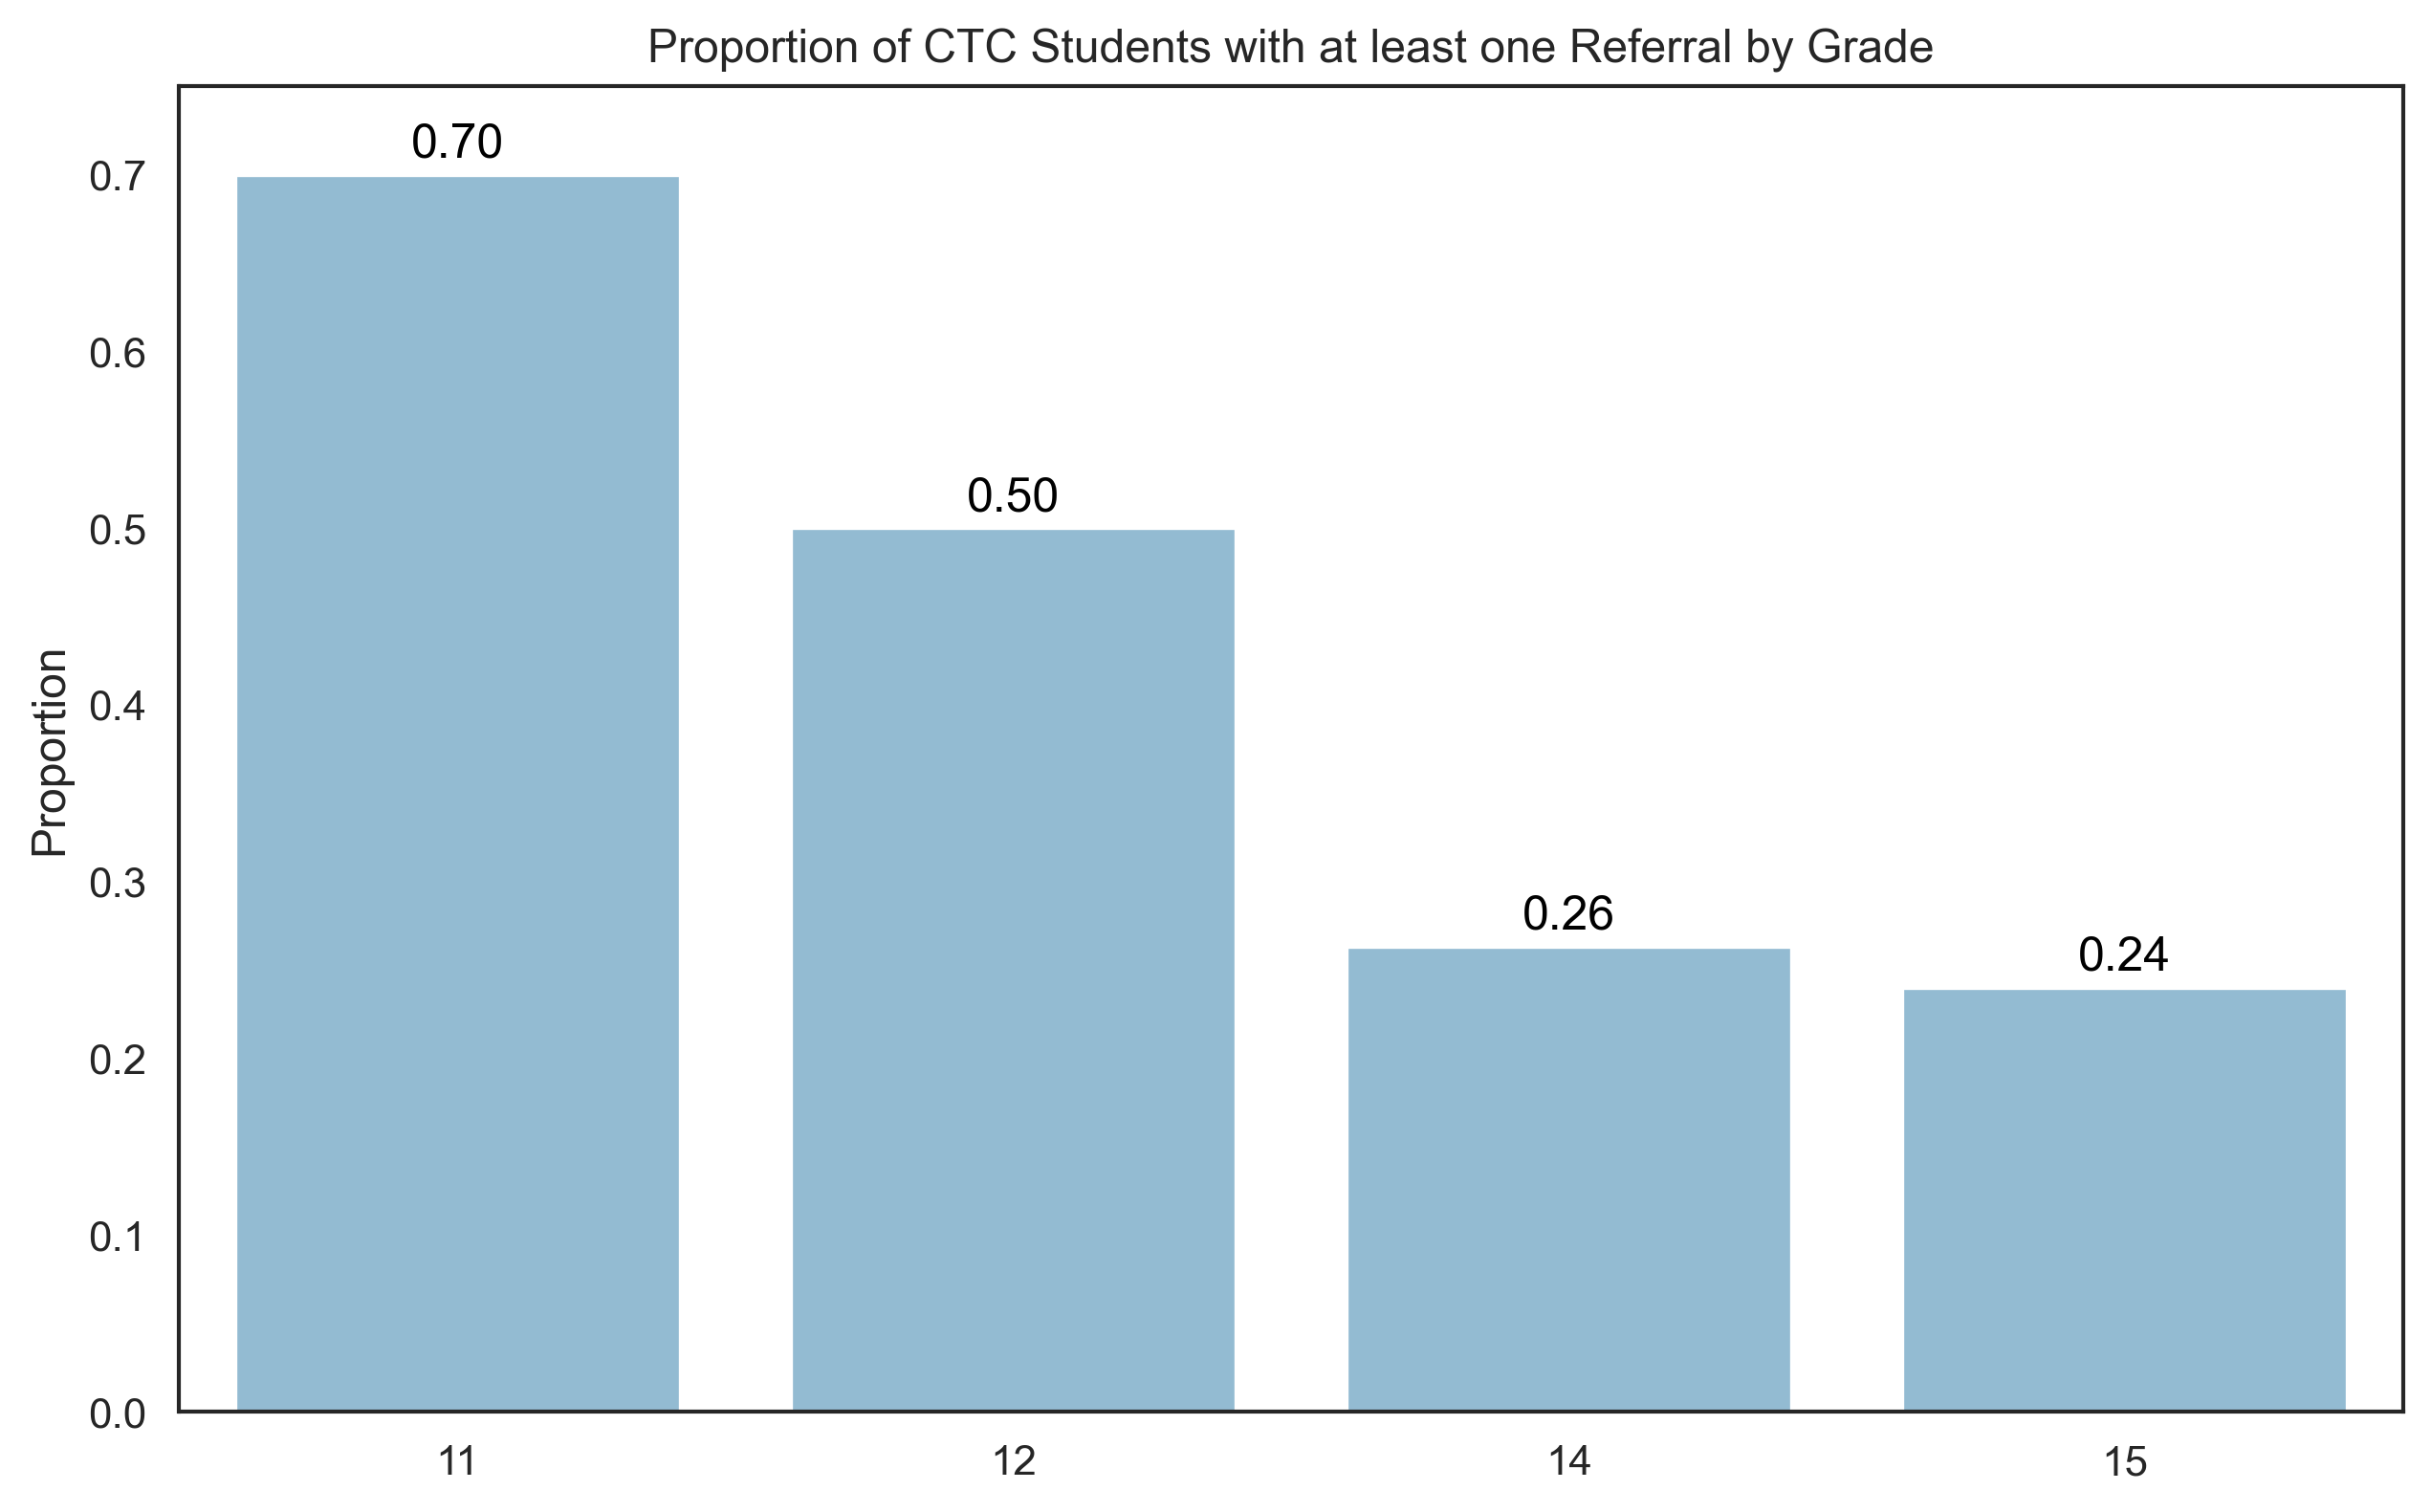

In [115]:
fig = plt.figure(figsize=(10,6))

df_to_plot=ctc_referrals_by_grade

ax = sns.barplot(x='Grade',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of CTC Students with at least one Referral by Grade")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/ctc_referrals_by_grade', bbox_inches='tight')
plt.show()

In [116]:
# Count of students with referrals by program
ctc_referrals_by_program=ctc_df.groupby('Site/Program')['Referral'].value_counts(normalize=True).to_frame().reset_index()
ctc_referrals_by_program=ctc_referrals_by_program[ctc_referrals_by_program['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
ctc_referrals_by_program

,Site/Program,Referral,Proportion
1,301CT CTC Tier 1 Trn,Yes,0.240000
3,Gateway Academy 801,Yes,0.421053


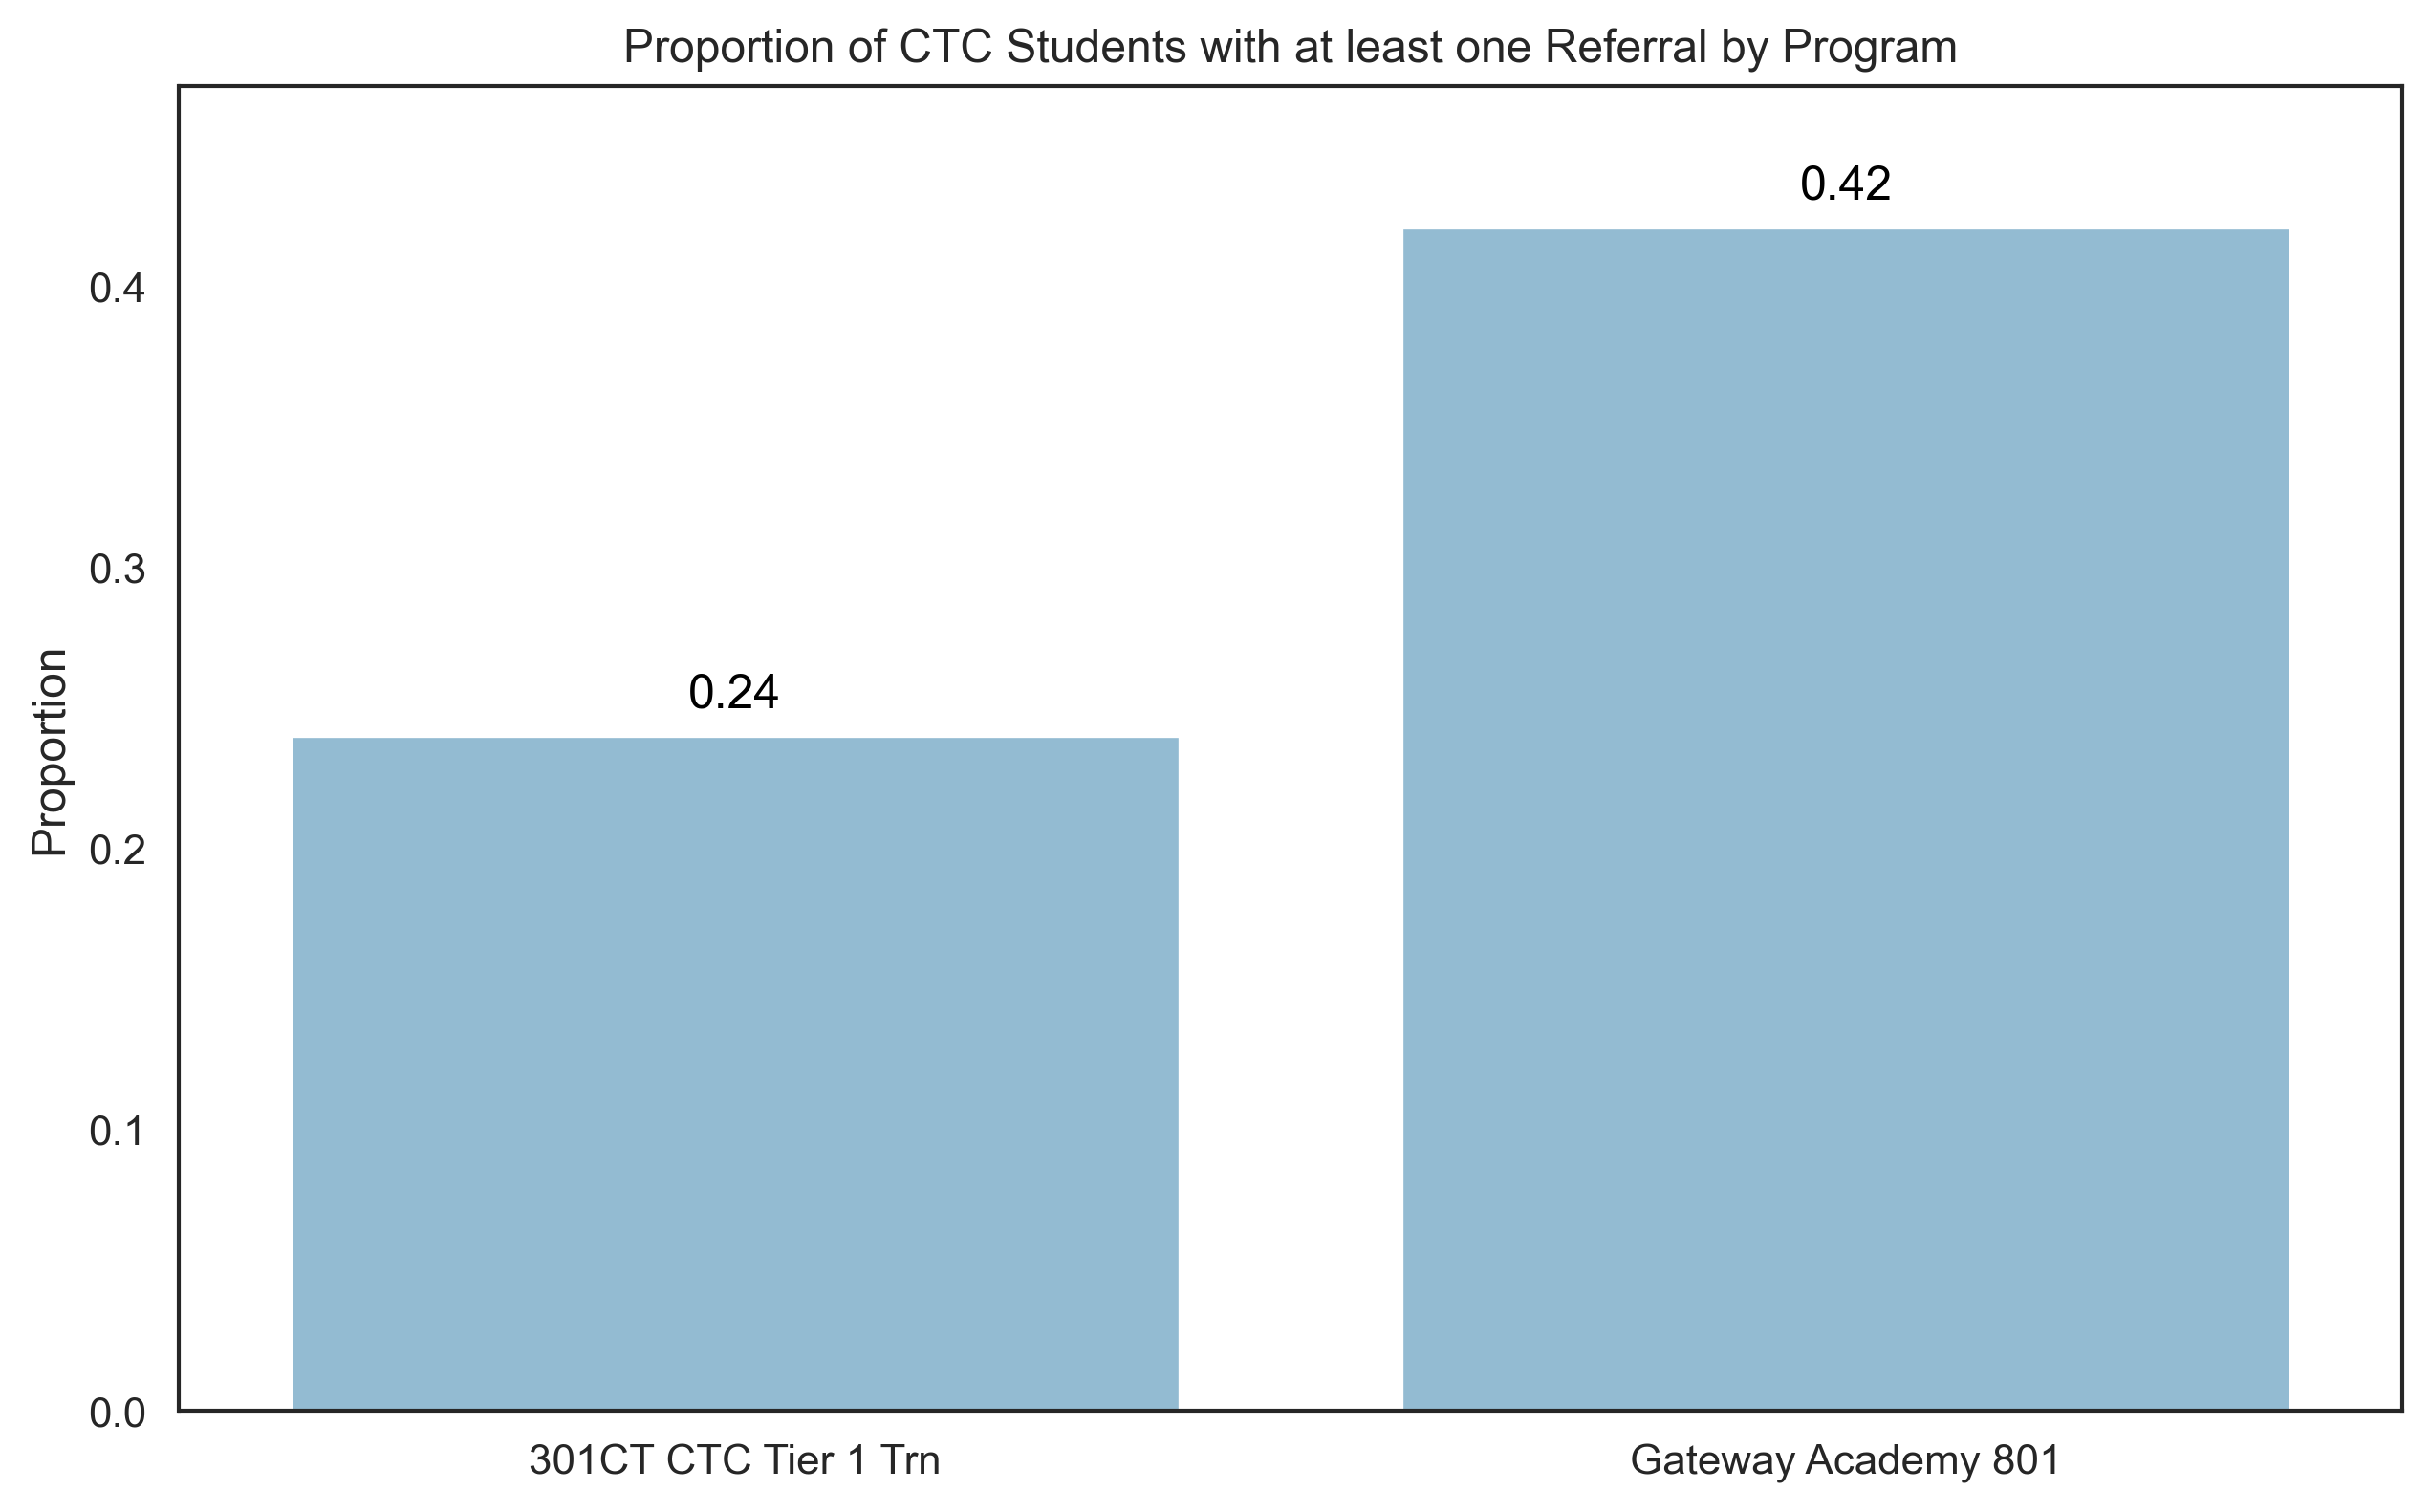

In [117]:
fig = plt.figure(figsize=(10,6))

df_to_plot=ctc_referrals_by_program

ax = sns.barplot(x='Site/Program',
              y='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False,
            )

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + .01, f'{height:.2f}', 
             ha='center', va='baseline', fontsize=12, color='black')
    
plt.title(f"Proportion of CTC Students with at least one Referral by Program")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.ylim(0, df_to_plot['Proportion'].max()+.05)
plt.gca().set(xlabel=None)


plt.savefig('Outputs/ctc_referrals_by_program', bbox_inches='tight')
plt.show()

In [118]:
# Count of students with Referrals by race
ctc_referrals_by_race=ctc_df.groupby('Student Race')['Referral'].value_counts(normalize=True).to_frame().reset_index()
ctc_referrals_by_race=ctc_referrals_by_race[ctc_referrals_by_race['Referral']=='Yes'].rename(columns={'proportion':'Proportion'})
ctc_referrals_by_race

,Student Race,Referral,Proportion
1,Black or African American,Yes,0.558824
4,Hispanic,Yes,0.473684
6,Two or More,Yes,0.111111
8,White,Yes,0.347826


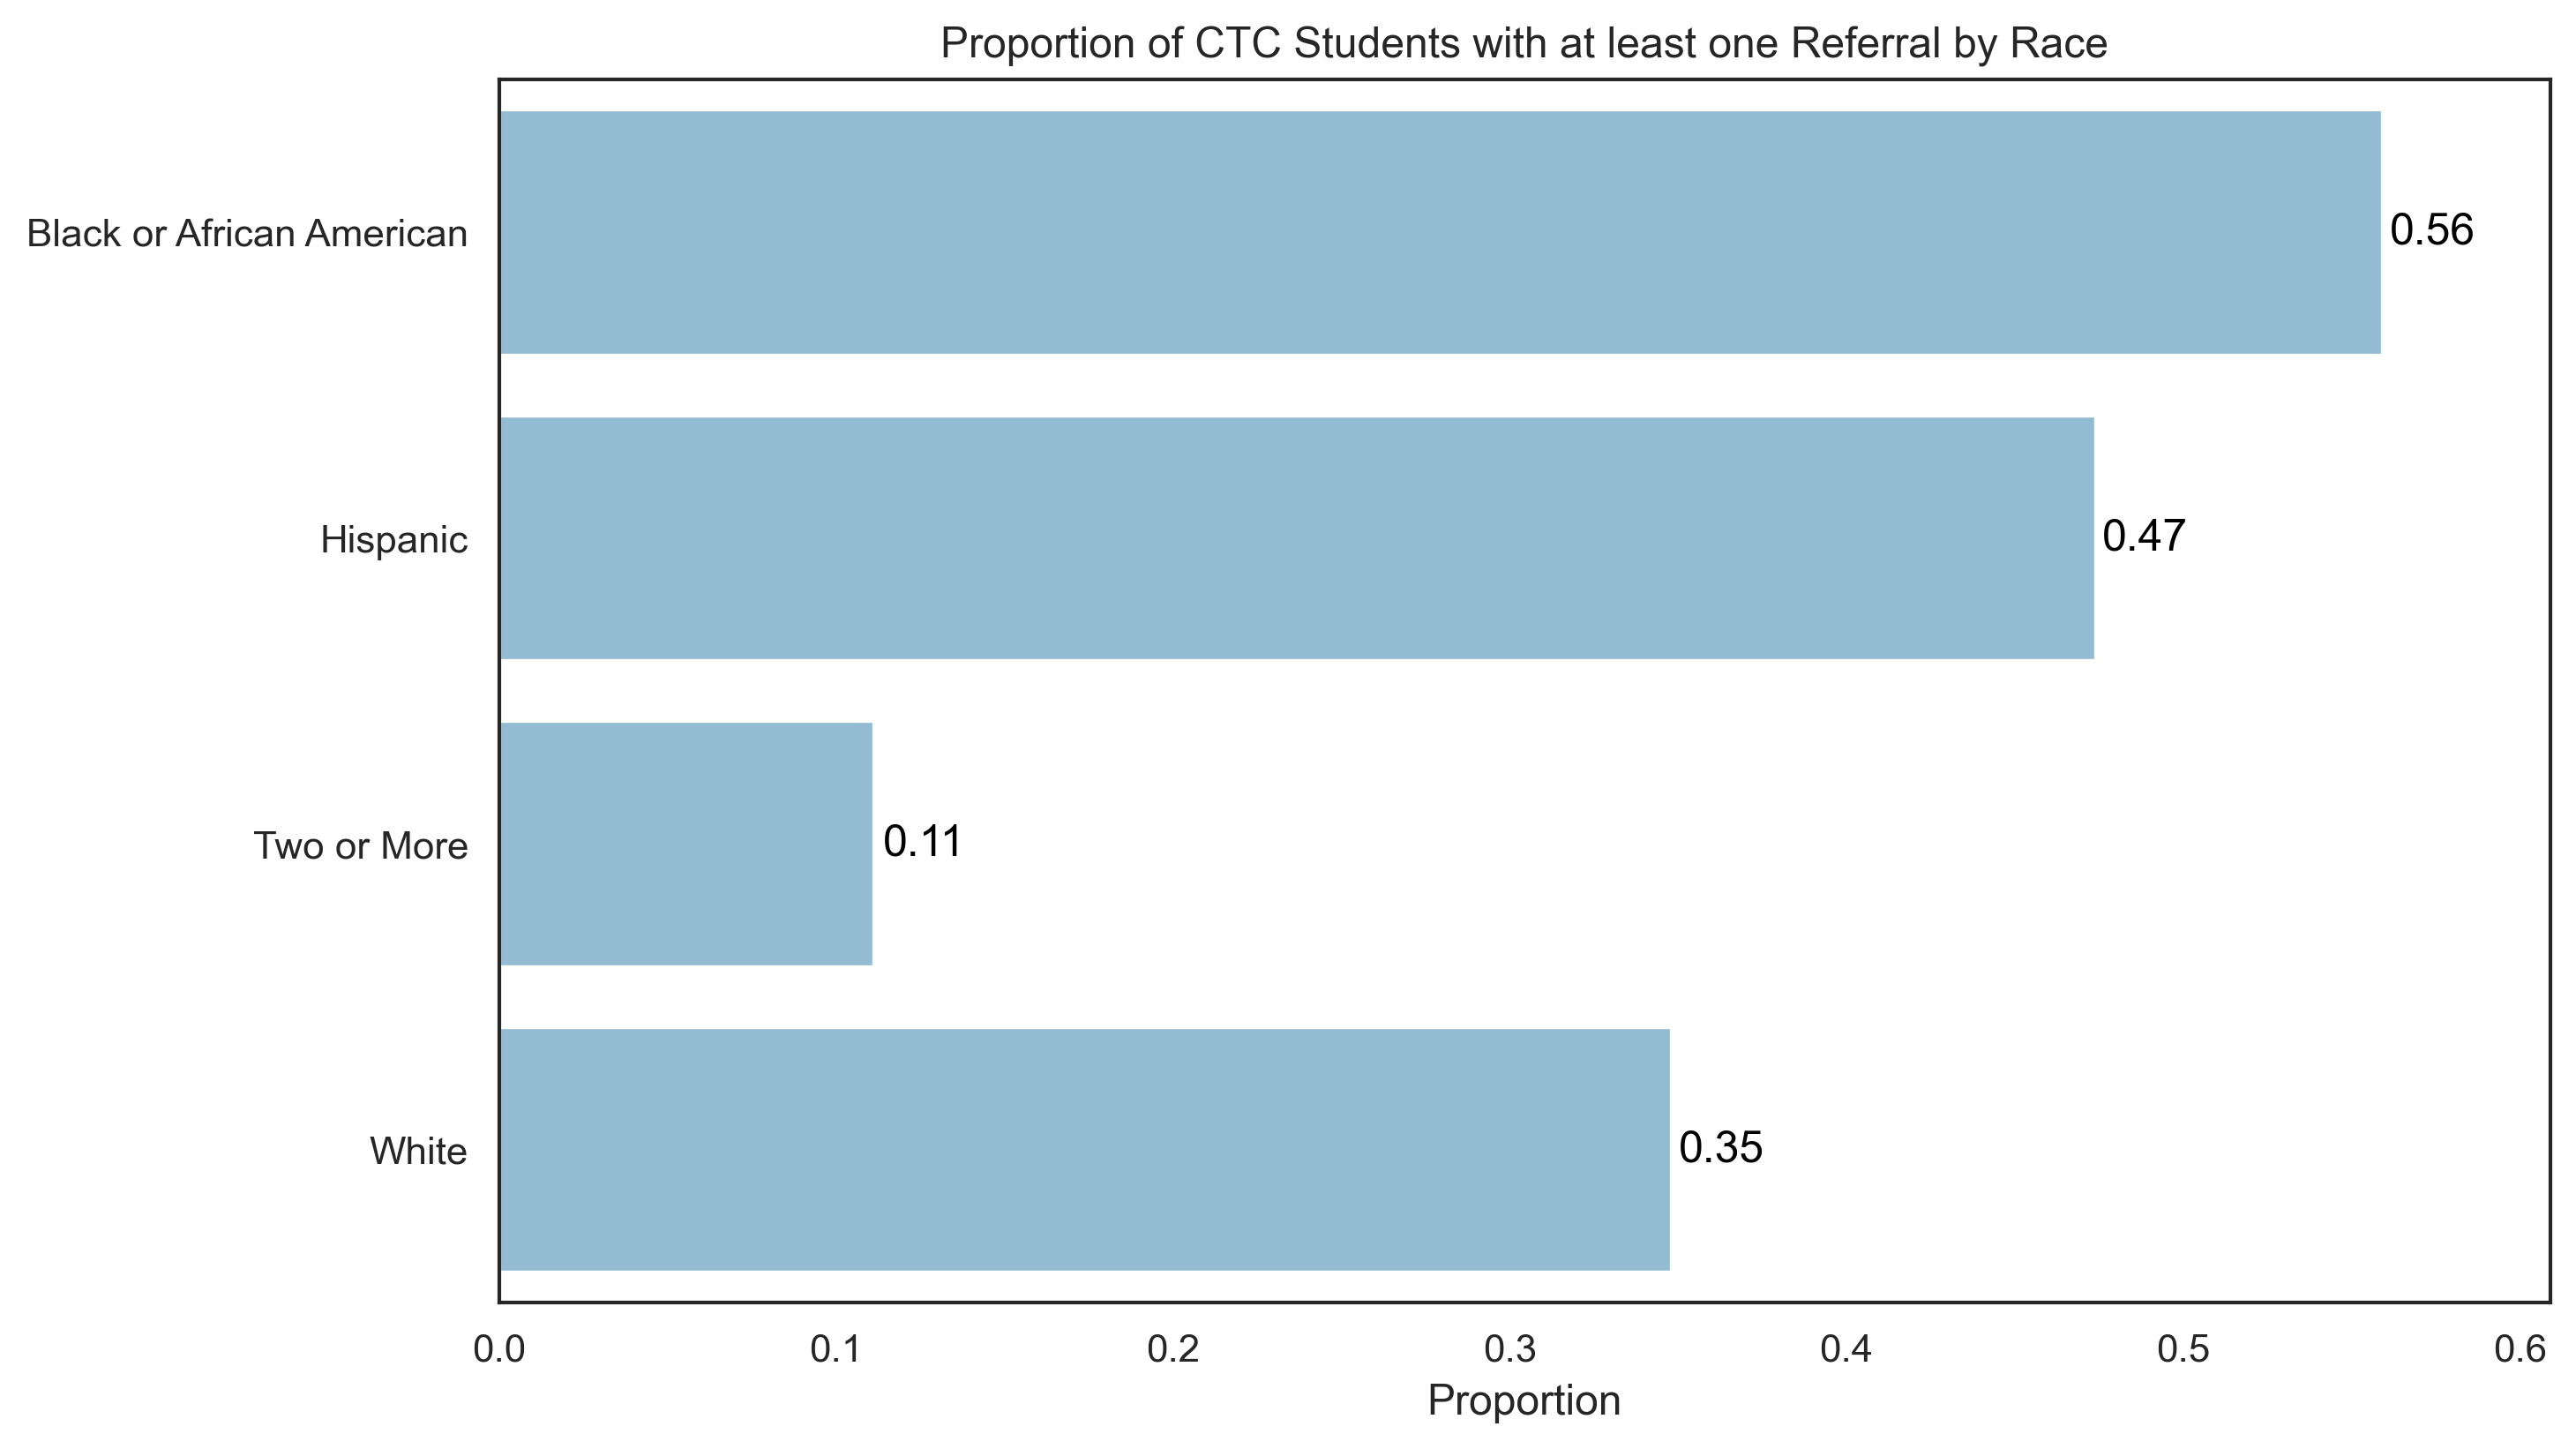

In [119]:
fig = plt.figure(figsize=(10,6))

df_to_plot=ctc_referrals_by_race

ax = sns.barplot(y='Student Race',
              x='Proportion',
                 data=df_to_plot,
              color='#89bedc', 
              legend=False
            )

for p in ax.patches:
    width = p.get_width()
    plt.text(width + .015 , p.get_y() + p.get_height() / 2., f'{width:.2f}', 
             ha='center', va='center', fontsize=12, color='black')
    
plt.title(f"Proportion of CTC Students with at least one Referral by Race")

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca().set(ylabel=None)
plt.xlim(0, df_to_plot['Proportion'].max()+.05)

plt.savefig('Outputs/ctc_referrals_by_race', bbox_inches='tight')
plt.show()

In [120]:
ctc_race=ctc_df['Student Race'].value_counts().sort_index().to_frame()
ctc_race

,count
Student Race,
Asian,3
Black or African American,34
Hispanic,19
Two or More,18
White,46


In [121]:
ctc_race.to_clipboard()